# Análisis descriptivo, predictivo y prescriptivo en una base de datos de características y precios de ventas de casas.

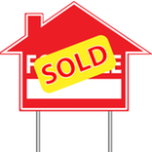

## Importar librerías

In [3]:
library(descr)
library(magrittr)
library(dplyr)
library(gplots)
library(ggplot2)
library(GGally)
library(Metrics)
library(party)
library(caTools)
library(randomForest)
library(xgboost)
library(useful)
library(pracma)
options(warn=-1)
library(plotly)
#library(tidyverse)
library(fastDummies)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



Attaching package: ‘gplots’


The following object is masked from ‘package:stats’:

    lowess


Registered S3 method overwritten by 'GGally':
  method from   
  +.gg   ggplot2

Loading required package: grid

Loading required package: mvtnorm

Loading required package: modeltools

Loading required package: stats4

Loading required package: strucchange

Loading required package: zoo


Attaching package: ‘zoo’


The following objects are masked from ‘package:base’:

    as.Date, as.Date.numeric


Loading required package: sandwich

randomForest 4.7-1.1

Type rfNews() to see new features/changes/bug fixes.


Attaching package: ‘randomForest’


The following object is masked from ‘package:ggplot2’:

    margin


The following object is masked from ‘package:dplyr’:

    combine



Attaching 

## Lectura y descripción de los datos

EL segundo paso es leer los datos y guardarlos en un dataframe. Para ejecutar por ti mismo este código deberás descargar las bases de datos "train.csv" y "test.csv" de los adjuntos y guardarlas en una carpeta llamada "data" dentro de la carpeta donde tienes este código. Debes asegurarte de escribir el directorio dentro de las funciones read.csv tal como está en tu computadora. 

In [4]:
df_train = read.csv('./data/train.csv')
df_test = read.csv('./data/test.csv') # Si esta línea te da error, asegúrate de colocar el directorio correcto dentro de la función read_csv.

Veamos más de cerca estas bases de datos. 
Observemos que "train" tiene 81 columnas, ya que contiene los precios de venta, mientras que "test" no tiene esta variable, la cual será construida cuando seamos capaces de predecirla.


In [5]:
head(df_train)

Id MSSubClass MSZoning LotFrontage LotArea Street Alley LotShape LandContour
1 1  60         RL       65           8450   Pave   NA    Reg      Lvl        
2 2  20         RL       80           9600   Pave   NA    Reg      Lvl        
3 3  60         RL       68          11250   Pave   NA    IR1      Lvl        
4 4  70         RL       60           9550   Pave   NA    IR1      Lvl        
5 5  60         RL       84          14260   Pave   NA    IR1      Lvl        
6 6  50         RL       85          14115   Pave   NA    IR1      Lvl        
  Utilities ⋯ PoolArea PoolQC Fence MiscFeature MiscVal MoSold YrSold SaleType
1 AllPub    ⋯ 0        NA     NA    NA            0      2     2008   WD      
2 AllPub    ⋯ 0        NA     NA    NA            0      5     2007   WD      
3 AllPub    ⋯ 0        NA     NA    NA            0      9     2008   WD      
4 AllPub    ⋯ 0        NA     NA    NA            0      2     2006   WD      
5 AllPub    ⋯ 0        NA     NA    NA            0     12     2008   WD      
6 AllPub    ⋯ 0        NA     MnPrv Shed        700     10     2009   WD      
  SaleCondition SalePrice
1 Normal        208500   
2 Normal        181500   
3 Normal        223500   
4 Abnorml       140000   
5 Normal        250000   
6 Normal        143000

In [6]:
head(df_test)

Id   MSSubClass MSZoning LotFrontage LotArea Street Alley LotShape
1 1461  20        RH       80          11622   Pave   NA    Reg     
2 1462  20        RL       81          14267   Pave   NA    IR1     
3 1463  60        RL       74          13830   Pave   NA    IR1     
4 1464  60        RL       78           9978   Pave   NA    IR1     
5 1465 120        RL       43           5005   Pave   NA    IR1     
6 1466  60        RL       75          10000   Pave   NA    IR1     
  LandContour Utilities ⋯ ScreenPorch PoolArea PoolQC Fence MiscFeature MiscVal
1 Lvl         AllPub    ⋯ 120         0        NA     MnPrv NA              0  
2 Lvl         AllPub    ⋯   0         0        NA     NA    Gar2        12500  
3 Lvl         AllPub    ⋯   0         0        NA     MnPrv NA              0  
4 Lvl         AllPub    ⋯   0         0        NA     NA    NA              0  
5 HLS         AllPub    ⋯ 144         0        NA     NA    NA              0  
6 Lvl         AllPub    ⋯   0         0        NA     NA    NA              0  
  MoSold YrSold SaleType SaleCondition
1 6      2010   WD       Normal       
2 6      2010   WD       Normal       
3 3      2010   WD       Normal       
4 6      2010   WD       Normal       
5 1      2010   WD       Normal       
6 4      2010   WD       Normal

Definimos nuestra variable objetivo y usar la función shape para mostrar la cantidad de filas y columnas.

In [7]:
target = 'SalePrice'

In [8]:
print(dim(df_train))
print(dim(df_test))

[1] 1460   81
[1] 1459   80


En "train" tenemos 1460 filas, y en "test" 1459. Veamos las variables de cada una y comprobemos que son iguales.

In [9]:
colnames(df_train)

[1] "Id"            "MSSubClass"    "MSZoning"      "LotFrontage"  
 [5] "LotArea"       "Street"        "Alley"         "LotShape"     
 [9] "LandContour"   "Utilities"     "LotConfig"     "LandSlope"    
[13] "Neighborhood"  "Condition1"    "Condition2"    "BldgType"     
[17] "HouseStyle"    "OverallQual"   "OverallCond"   "YearBuilt"    
[21] "YearRemodAdd"  "RoofStyle"     "RoofMatl"      "Exterior1st"  
[25] "Exterior2nd"   "MasVnrType"    "MasVnrArea"    "ExterQual"    
[29] "ExterCond"     "Foundation"    "BsmtQual"      "BsmtCond"     
[33] "BsmtExposure"  "BsmtFinType1"  "BsmtFinSF1"    "BsmtFinType2" 
[37] "BsmtFinSF2"    "BsmtUnfSF"     "TotalBsmtSF"   "Heating"      
[41] "HeatingQC"     "CentralAir"    "Electrical"    "X1stFlrSF"    
[45] "X2ndFlrSF"     "LowQualFinSF"  "GrLivArea"     "BsmtFullBath" 
[49] "BsmtHalfBath"  "FullBath"      "HalfBath"      "BedroomAbvGr" 
[53] "KitchenAbvGr"  "KitchenQual"   "TotRmsAbvGrd"  "Functional"   
[57] "Fireplaces"    "FireplaceQu"   "GarageType"    "GarageYrBlt"  
[61] "GarageFinish"  "GarageCars"    "GarageArea"    "GarageQual"   
[65] "GarageCond"    "PavedDrive"    "WoodDeckSF"    "OpenPorchSF"  
[69] "EnclosedPorch" "X3SsnPorch"    "ScreenPorch"   "PoolArea"     
[73] "PoolQC"        "Fence"         "MiscFeature"   "MiscVal"      
[77] "MoSold"        "YrSold"        "SaleType"      "SaleCondition"
[81] "SalePrice"

In [10]:
colnames(df_test)

[1] "Id"            "MSSubClass"    "MSZoning"      "LotFrontage"  
 [5] "LotArea"       "Street"        "Alley"         "LotShape"     
 [9] "LandContour"   "Utilities"     "LotConfig"     "LandSlope"    
[13] "Neighborhood"  "Condition1"    "Condition2"    "BldgType"     
[17] "HouseStyle"    "OverallQual"   "OverallCond"   "YearBuilt"    
[21] "YearRemodAdd"  "RoofStyle"     "RoofMatl"      "Exterior1st"  
[25] "Exterior2nd"   "MasVnrType"    "MasVnrArea"    "ExterQual"    
[29] "ExterCond"     "Foundation"    "BsmtQual"      "BsmtCond"     
[33] "BsmtExposure"  "BsmtFinType1"  "BsmtFinSF1"    "BsmtFinType2" 
[37] "BsmtFinSF2"    "BsmtUnfSF"     "TotalBsmtSF"   "Heating"      
[41] "HeatingQC"     "CentralAir"    "Electrical"    "X1stFlrSF"    
[45] "X2ndFlrSF"     "LowQualFinSF"  "GrLivArea"     "BsmtFullBath" 
[49] "BsmtHalfBath"  "FullBath"      "HalfBath"      "BedroomAbvGr" 
[53] "KitchenAbvGr"  "KitchenQual"   "TotRmsAbvGrd"  "Functional"   
[57] "Fireplaces"    "FireplaceQu"   "GarageType"    "GarageYrBlt"  
[61] "GarageFinish"  "GarageCars"    "GarageArea"    "GarageQual"   
[65] "GarageCond"    "PavedDrive"    "WoodDeckSF"    "OpenPorchSF"  
[69] "EnclosedPorch" "X3SsnPorch"    "ScreenPorch"   "PoolArea"     
[73] "PoolQC"        "Fence"         "MiscFeature"   "MiscVal"      
[77] "MoSold"        "YrSold"        "SaleType"      "SaleCondition"

In [11]:
colnames(df_train)[-length(colnames(df_train))] == colnames(df_test)

[1] TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE
[16] TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE
[31] TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE
[46] TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE
[61] TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE
[76] TRUE TRUE TRUE TRUE TRUE

## Preprocesamiento

Aquí veremos la limpieza de la base de datos para su posterior uso en un modelo de ML. Comencemos por eliminar columnas que no aporta información. 

In [12]:
df_train <- subset(df_train, select = -Id)
df_test <- subset(df_test, select = -Id)

### Datos faltantes

Busquemos las columnas que tienen un alto porcentaje de datos faltantes y procedamos a eliminarlas. 

In [13]:
nullcolumns <- function(df) {
    df <- df[,colSums(is.na(df))<nrow(df)]
    df <- Filter(function(df) mean(is.na(df)) < 0.6, df)    
    }
df_train = nullcolumns(df_train)
df_test = nullcolumns(df_test)

cat('Cantidad de columnas restantes en train',ncol(df_train),'\n')
cat('Cantidad de columnas restantes en test',ncol(df_test))                

Cantidad de columnas restantes en train 76 
Cantidad de columnas restantes en test 75

### Duplicados 

Comprobemos si hay datos duplicados. 

In [14]:
duplicados <- function(df) {
 df <- distinct(df) # Código para eliminar duplicados
}

df_train = duplicados(df_train)
df_test = duplicados(df_test)    

cat('Cantidad de filas restantes en train',nrow(df_train),'\n')
cat('Cantidad de filas restantes en test',nrow(df_test))

Cantidad de filas restantes en train 1460 
Cantidad de filas restantes en test 1459

### Tipo de variable

En esta sección seleccionaremos el tipo de variable, esta es importante para saber el tipo de descripción, análisis y transformaciones.

In [15]:
categoricas <- function(df) {
    df_cat <- df[,colnames(df)[grepl('factor|logical|character',sapply(df,class))]]
    }
numericas <- function(df) {
    df_cat <- df[,colnames(df)[grepl('num|double|int',sapply(df,class))]]
    }
df_train_cat <- categoricas(df_train)
df_train_num <- numericas(df_train)

df_test_cat <- categoricas(df_test)
df_test_num <- numericas(df_test)
#df_test_cat,df_test_num = tipovariable(df_test)  

cat('Cantidad respectiva de variables categóricas y numéricas',ncol(df_train_cat),ncol(df_train_num))


Cantidad respectiva de variables categóricas y numéricas 39 37

### Imputación de datos faltantes
Aunque eliminamos las columnas que tienen una gran cantidad de datos nulos, algunas contienen aún NaN. Esto provoca errores en los modelos por tanto deben ser transformados. Usaremos para ello la técnica de imputación simple. Para las columnas numéricas usaremos la estrategia de cambiar las entradas nulas por la media, y para las columnas categóricas la estrategia de cambiar las entradas nulas por el valor con mayor frecuencia absoluta. Al final, comprobamos si en efecto no quedan valores nulos en los dataframes.    

In [16]:
impute_nullvalues_numerical <- function(df){ 
    df = simple.impute(df,mean)
}

impute_nullvalues_categorical <- function(df){ 
    df = simple.impute(df,mode)
}

df_train_cat = impute_nullvalues_categorical(df_train_cat)
df_train_num = impute_nullvalues_numerical(df_train_num)
    
df_test_cat = impute_nullvalues_categorical(df_test_cat)
df_test_num = impute_nullvalues_numerical(df_test_num)

is.null(df_train_cat)
is.null(df_train_num)
df_train_cat$BsmtFinSF2

`.cols` has been renamed and is deprecated, please use `.vars`
`.cols` has been renamed and is deprecated, please use `.vars`
`.cols` has been renamed and is deprecated, please use `.vars`
`.cols` has been renamed and is deprecated, please use `.vars`


[1] FALSE

[1] FALSE

NULL

# Clase 9

### Outliers o valores atípicos (variables numéricas)
En el caso de las variables numéricas, usaremos el rango intercuartílico para detectar y tratar los outliers. 
Contruimos una tabla que contiene la información del primer y tercer cuartil, el rango intercuartílico, y la cantidad de outliers superiores e inferiores, que los consideraremos como los valores que están a distancia mayor que 1.5 veces el rango intercuartílico del tercer cuartil y primer cuartil respectivamente. 

Tenemos varias opciones con estos valores extremos, una es eliminarlos, sin embargo, al hacer esto nos quedan sólo la tercera parte de los datos, aproximadamente. Estos son muy pocos datos, y de hecho nuestra base no es muy grande de inicio, así que aplicaremos otra técnica: sustituiremos los valores atípicos por los números "limite superior = tercer cuartil+1.5\*iqr" y "limite inferior = primer cuartil-1.5\*iqr" según corresponda.

*Nota: Como ejercicio descomenta la parte del código que elimina los outliers e imprime la cantidad de filas que quedan en la base de datos. Cuando avances a los modelos de Machine Learning puedes comparar los resultados eliminando los outliers vs los resultados aplicando la técnica propuesta.*  

In [17]:
detectar_outliers_num <- function(df){
    
dfcolumns <- colnames(df)
tabla <- as.data.frame(matrix(nrow=ncol(df),ncol=5))
colnames(tabla) <- c('Primer cuartil','Tercer cuartil', 'IQR','Outliers_Sup','Outliers_Inf')
rownames(tabla) <- dfcolumns
for(i in 1:ncol(df)) { 
    col = dfcolumns[i]
    tabla[col,'Primer cuartil'] <- quantile(df[,col], probs=0.25)
    tabla[col,'Tercer cuartil'] <- quantile(df[,col], probs=0.75)
    tabla[col,'IQR'] <- IQR(df[,col])
    lim_sup = tabla[col,'Tercer cuartil']+tabla[col,'IQR']*1.5
    lim_inf = tabla[col,'Primer cuartil']-tabla[col,'IQR']*1.5
    tabla[col,'Outliers_Sup'] <- sum(df[,col]>lim_sup, na.rm=TRUE)
    tabla[col,'Outliers_Inf'] <- sum(df[,col]<lim_inf, na.rm=TRUE)   
#     df <- filter(df,df[,col]<=lim_sup)
#     df <- filter(df,df[,col]>=lim_inf)
for(j in 1:nrow(df)){
    if (df[j,col] > lim_sup) {
                df[j,col] = lim_sup }
            else if (df[j,col] < lim_inf) {
                  df[j,col] = lim_inf      }  
}
}
    
   print('La información sobre la cantidad de outliers la podemos ver en la tabla:')
   print(tabla) 
df 
    
    }
df_train_num = detectar_outliers_num(df_train_num)   
df_test_num = detectar_outliers_num(df_test_num) 

# print('La cantidad de filas que quedaron en el dataframe:','\n','\n',df_train_num.shape[0])

[1] "La información sobre la cantidad de outliers la podemos ver en la tabla:"
              Primer cuartil Tercer cuartil      IQR Outliers_Sup Outliers_Inf
MSSubClass             20.00          70.00    50.00          103            0
LotFrontage            60.00          79.00    19.00           58           48
LotArea              7553.50       11601.50  4048.00           67            2
OverallQual             5.00           7.00     2.00            0            2
OverallCond             5.00           6.00     1.00           94           31
YearBuilt            1954.00        2000.00    46.00            0            7
YearRemodAdd         1967.00        2004.00    37.00            0            0
MasVnrArea              0.00         164.25   164.25           98            0
BsmtFinSF1              0.00         712.25   712.25            7            0
BsmtFinSF2              0.00           0.00     0.00          167            0
BsmtUnfSF             223.00         808.00   585.00

### Valores atípicos para variables categóricas
Los valores atípicos también pueden aparecer en las variables categóricas. Por ejemplo en los valores que son únicos dentro de una columna. Veamos las entradas de cada columna y cuántas veces se repiten. A continuación, reemplazaremos los valores que se repiten menos de 5 veces por la moda en cada columna. 

In [18]:
detectar_outliers_cat <- function(df){
 dfcolumns <- colnames(df)
 for(i in 1:ncol(df)) { 
    col = dfcolumns[i]
        indices = rownames(table(df_test_cat[,col])[table(df_test_cat[,col])<5])
        moda = mode(df_train_cat[col])
        for(i in 1:nrow(df_train_cat)){
            if(df_train_cat[i,col] %in% indices){
                df_train_cat[i,col] = moda
            }
               }
     }
    df
}

df_train_cat = detectar_outliers_cat(df_train_cat)        
df_test_cat = detectar_outliers_cat(df_test_cat) 

## Descripción y visualizaciones      

Con la función "descr" podemos hallar las estadísticas descriptivas de los dataframes. 

In [19]:
descr(df_train_cat)


MSZoning
   Length     Class      Mode 
     1460 character character 

Street
   Length     Class      Mode 
     1460 character character 

LotShape
   Length     Class      Mode 
     1460 character character 

LandContour
   Length     Class      Mode 
     1460 character character 

Utilities
   Length     Class      Mode 
     1460 character character 

LotConfig
   Length     Class      Mode 
     1460 character character 

LandSlope
   Length     Class      Mode 
     1460 character character 

Neighborhood
   Length     Class      Mode 
     1460 character character 

Condition1
   Length     Class      Mode 
     1460 character character 

Condition2
   Length     Class      Mode 
     1460 character character 

BldgType
   Length     Class      Mode 
     1460 character character 

HouseStyle
   Length     Class      Mode 
     1460 character character 

RoofStyle
   Length     Class      Mode 
     1460 character character 

RoofMatl
   Length     Class      Mode 
     146

In [20]:
descr(df_train_num)


MSSubClass
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  20.00   20.00   50.00   55.09   70.00  145.00 

LotFrontage
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  31.50   60.00   70.05   69.28   79.00  107.50 

LotArea
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   1482    7554    9478    9647   11602   17674 

OverallQual
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  2.000   5.000   6.000   6.101   7.000  10.000 

OverallCond
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  3.500   5.000   5.000   5.543   6.000   7.500 

YearBuilt
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   1885    1954    1973    1971    2000    2010 

YearRemodAdd
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   1950    1967    1994    1985    2004    2010 

MasVnrArea
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   0.00    0.00    0.00   89.97  164.25  410.62 

BsmtFinSF1
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
    0.0     0.0   383.5   440.0   712.2  1780.6 

BsmtFinS

Para las visualizaciones eliminemos la variable "target":  

In [21]:
df_train_num <- subset(df_train_num, select = -SalePrice) 

Primero, utilizaremos la función **ggpairs**, la cual dibuja una matriz de gráficas, en la diagonal se muetran los histogramas, o gráficas de densidad de las columnas, mientras que en el resto de posiciones hay gráficas de dispersión de las columnas dos a dos. Por el tamaño de nuestra base utilizaremos varios gráficos.

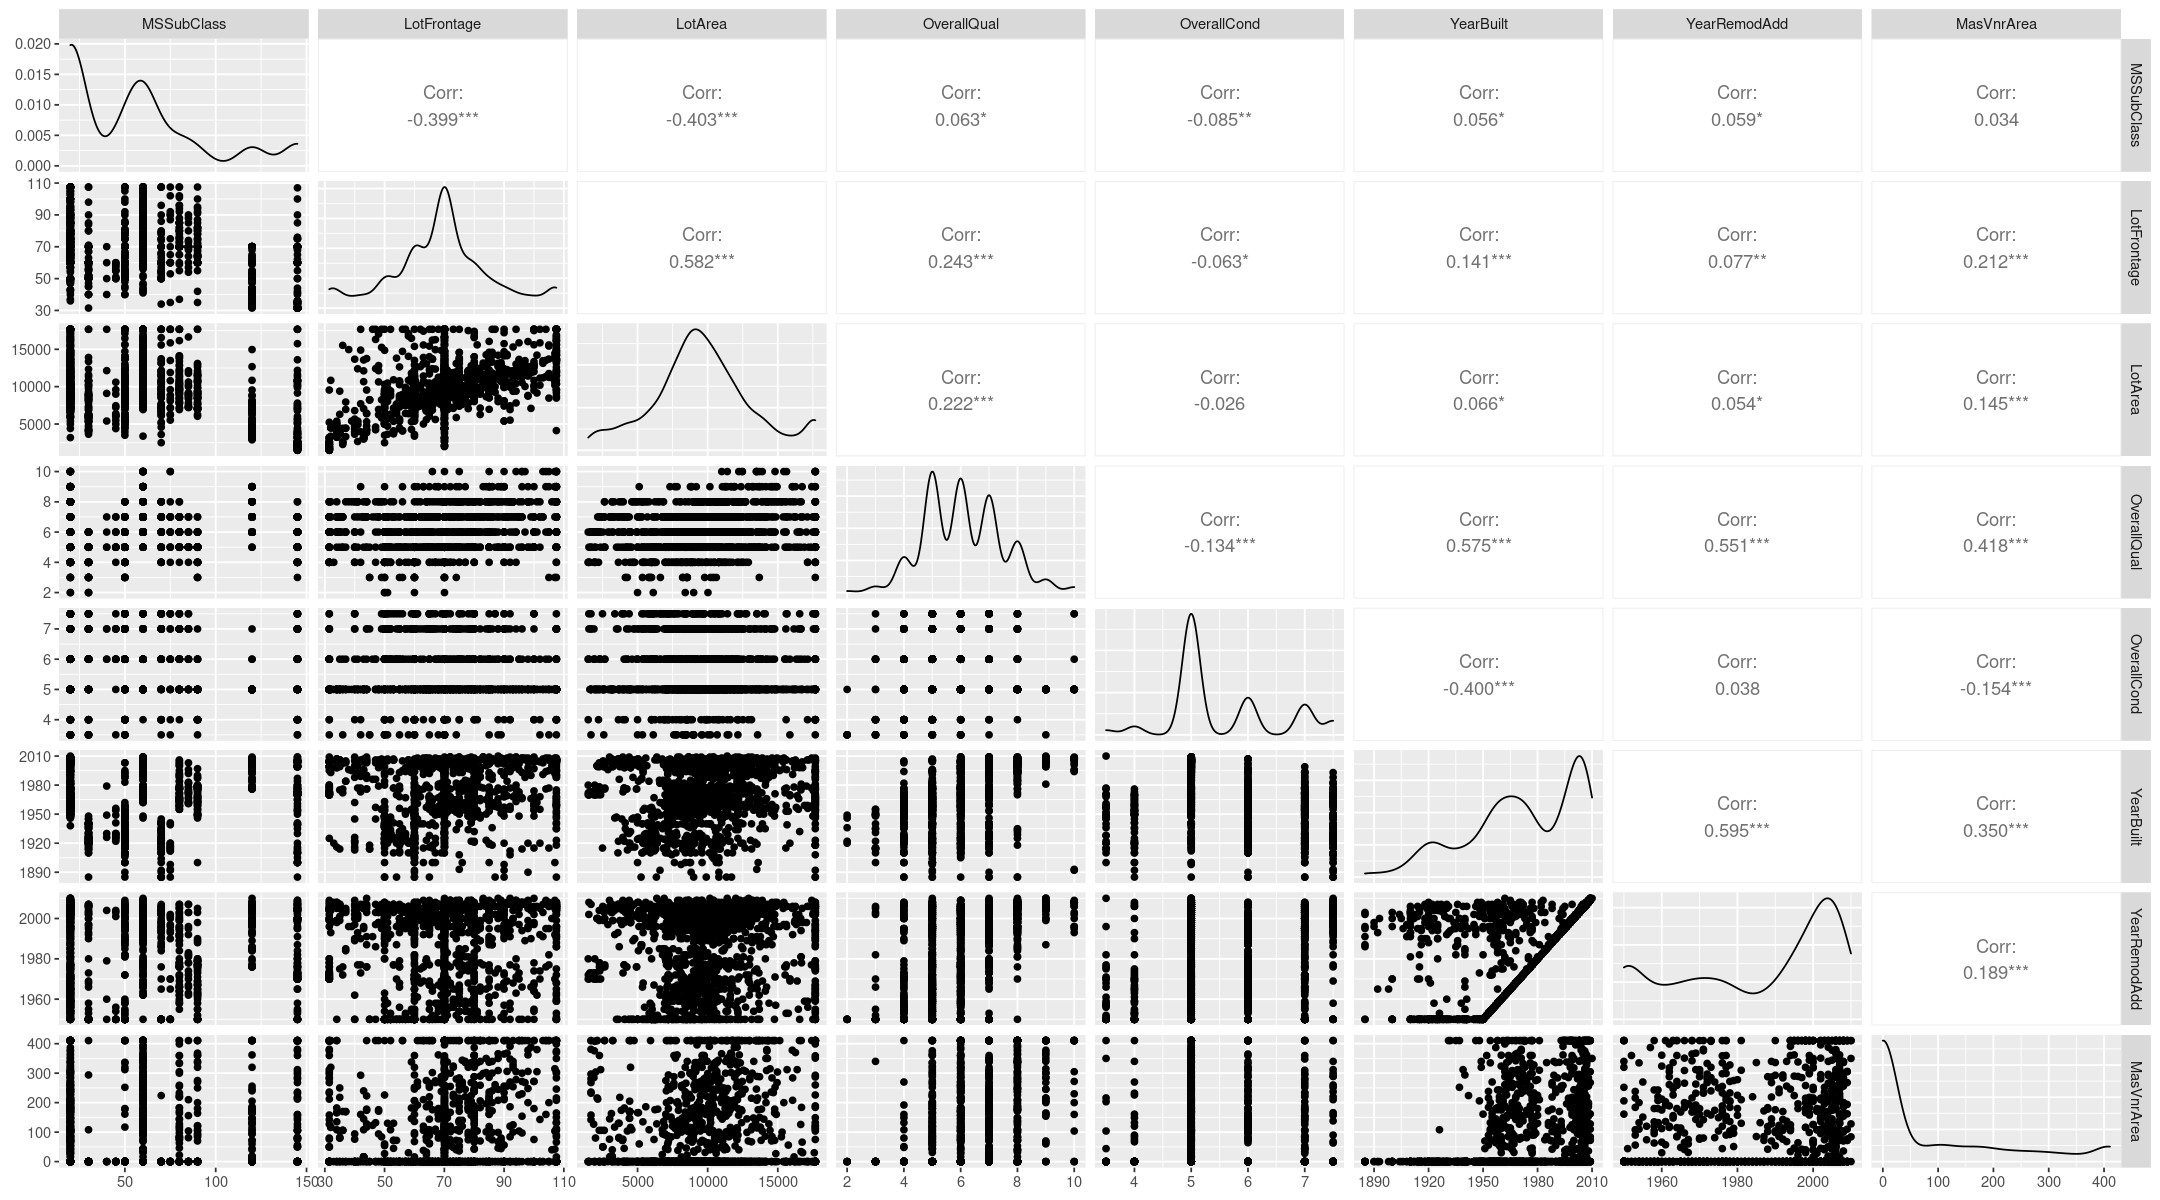

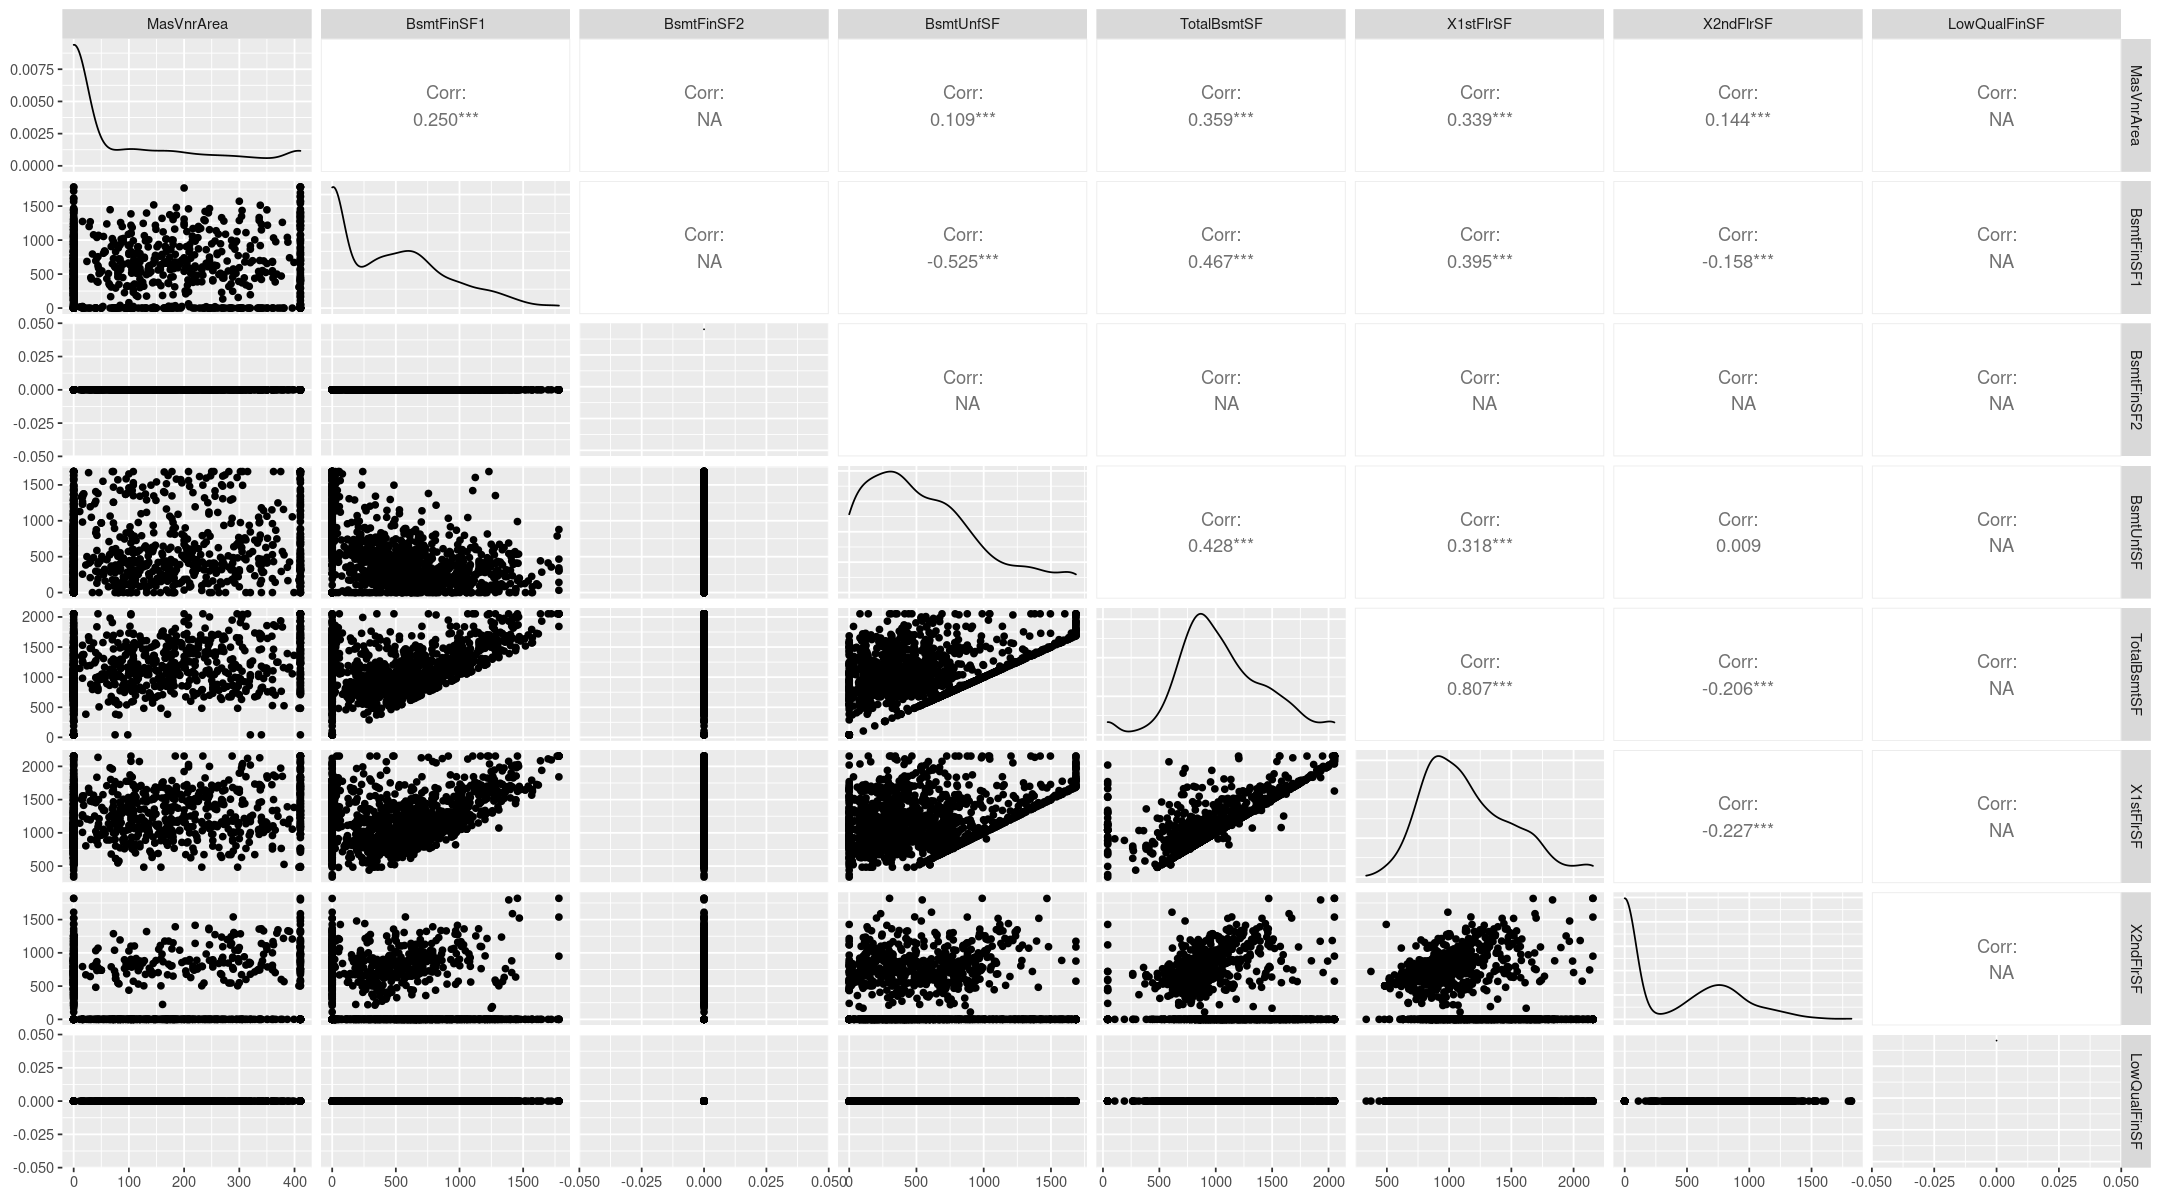

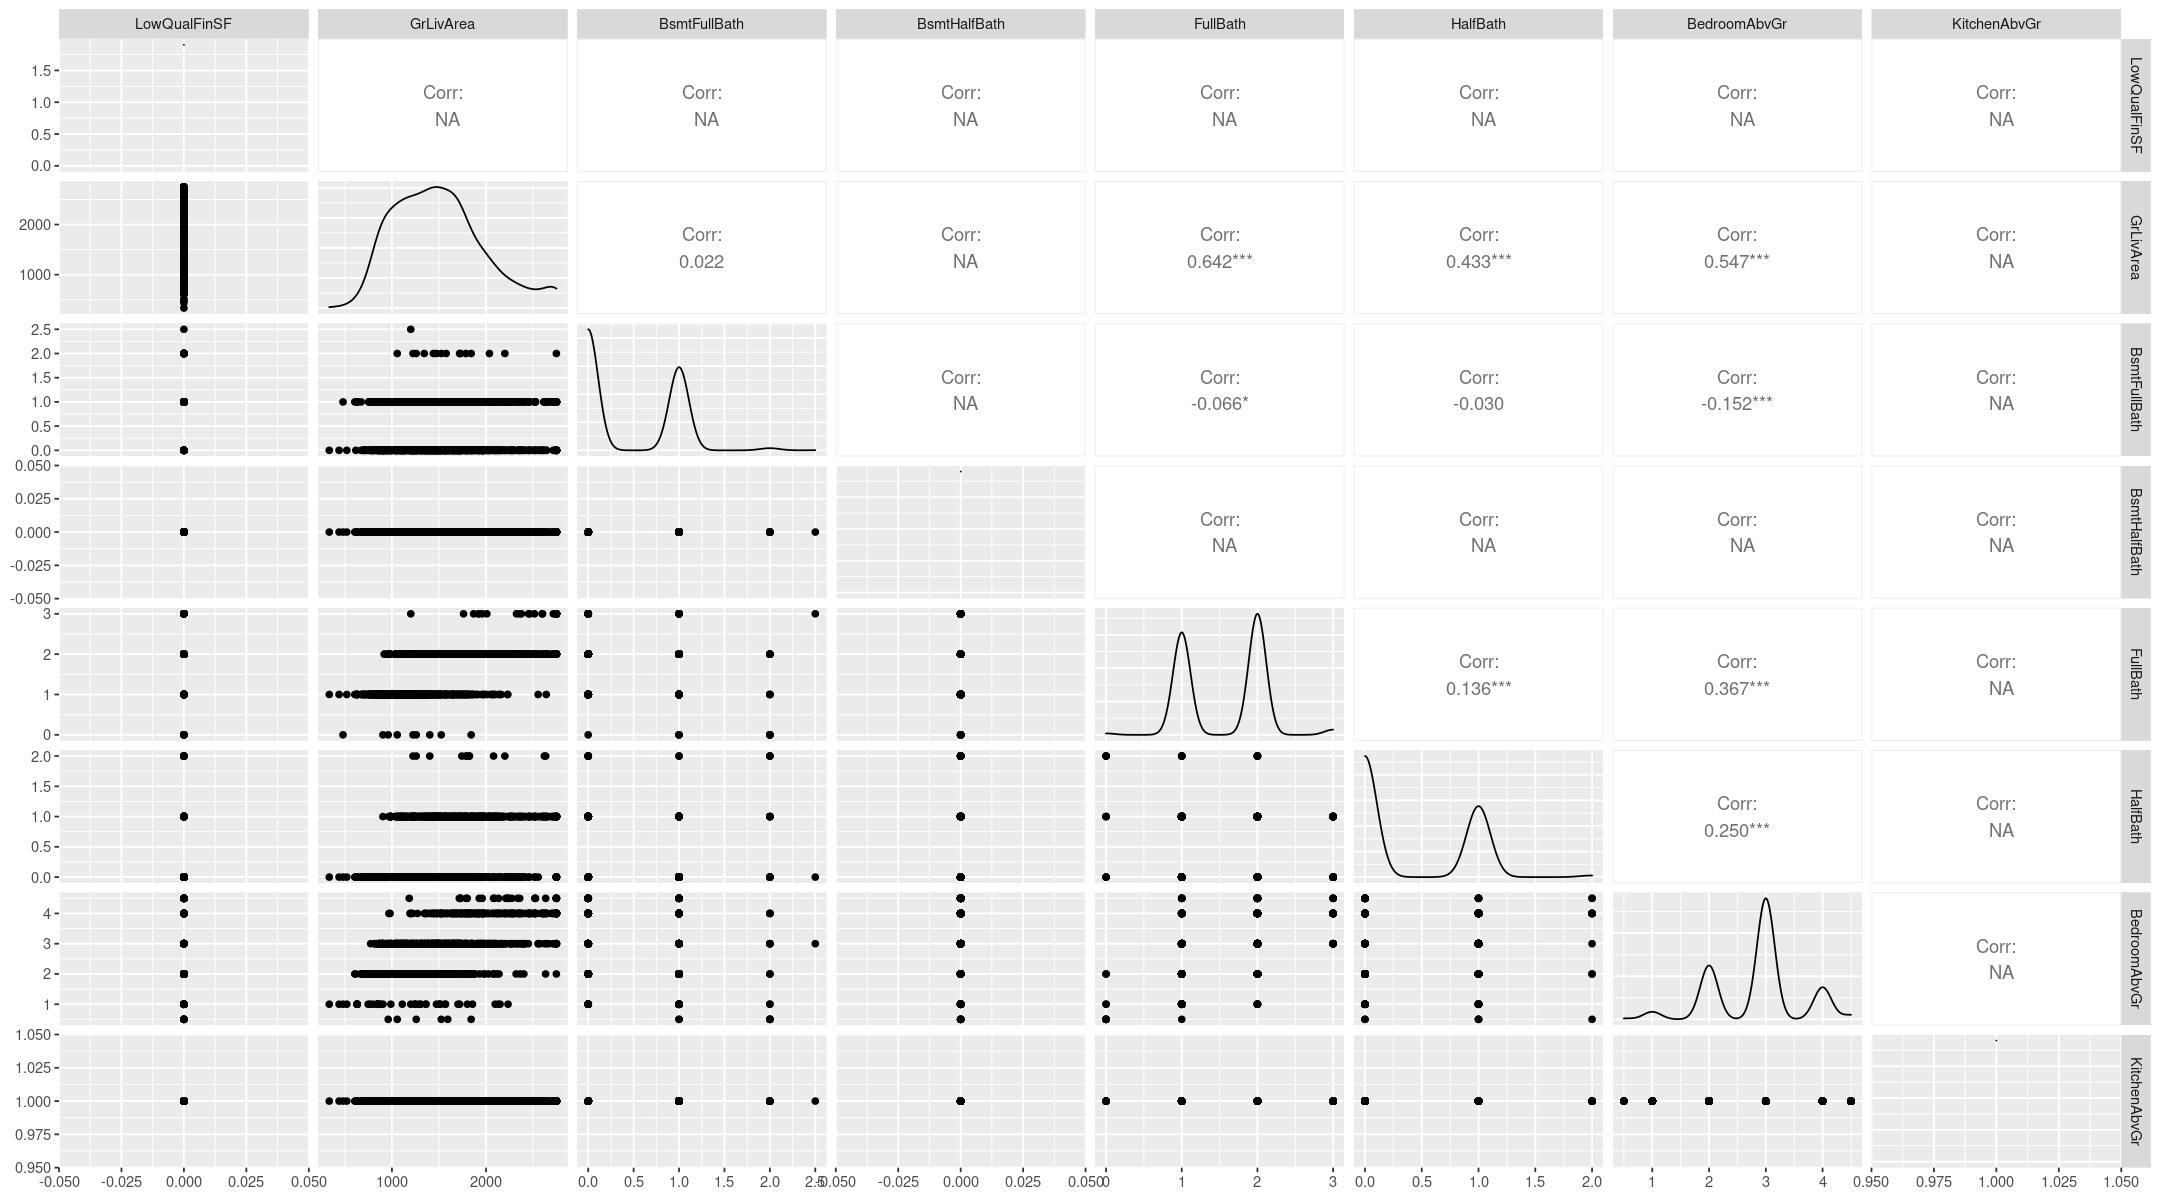

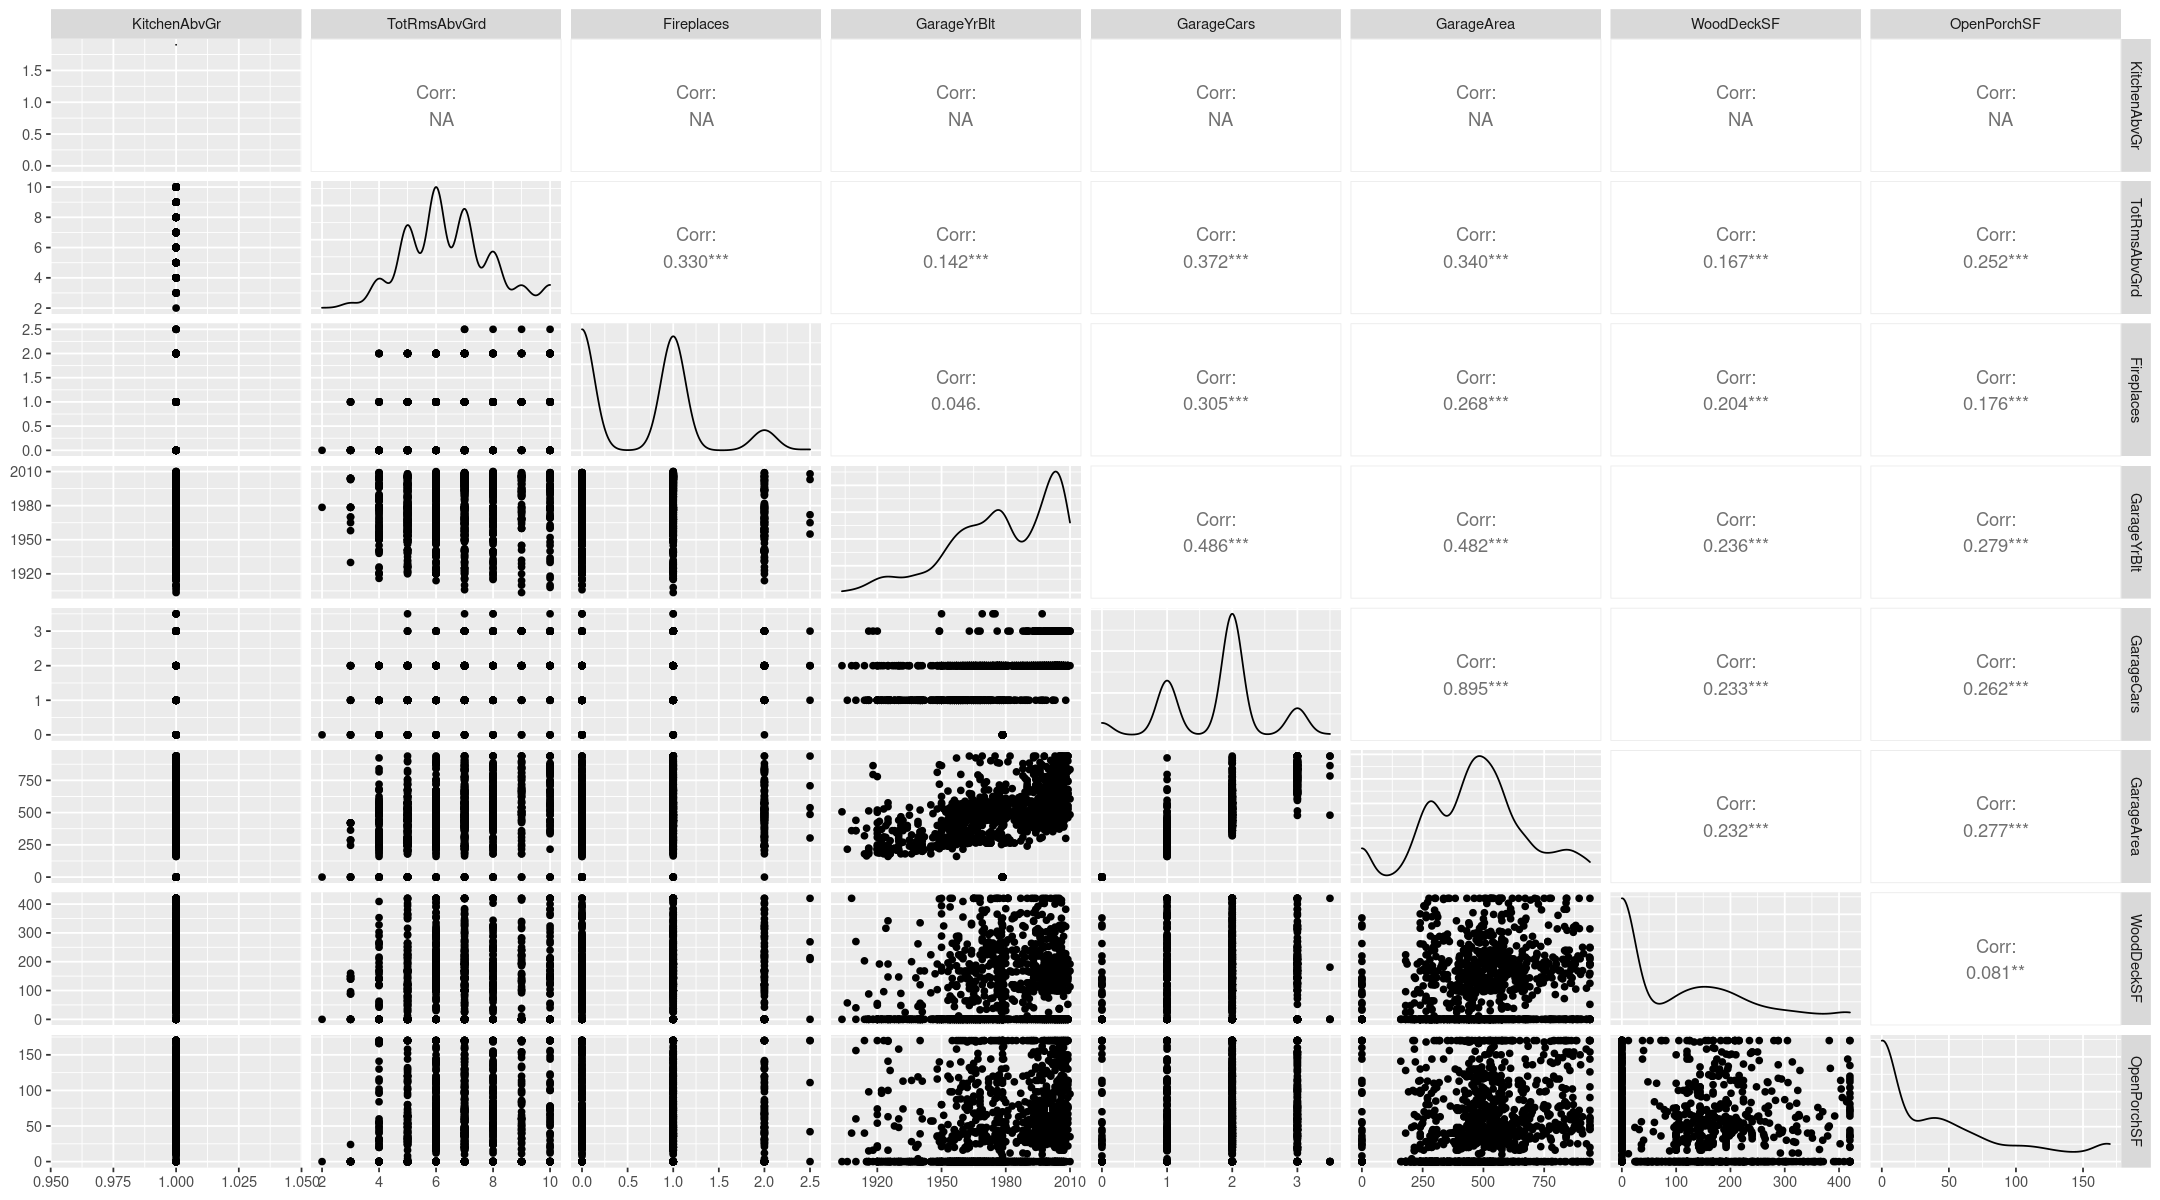

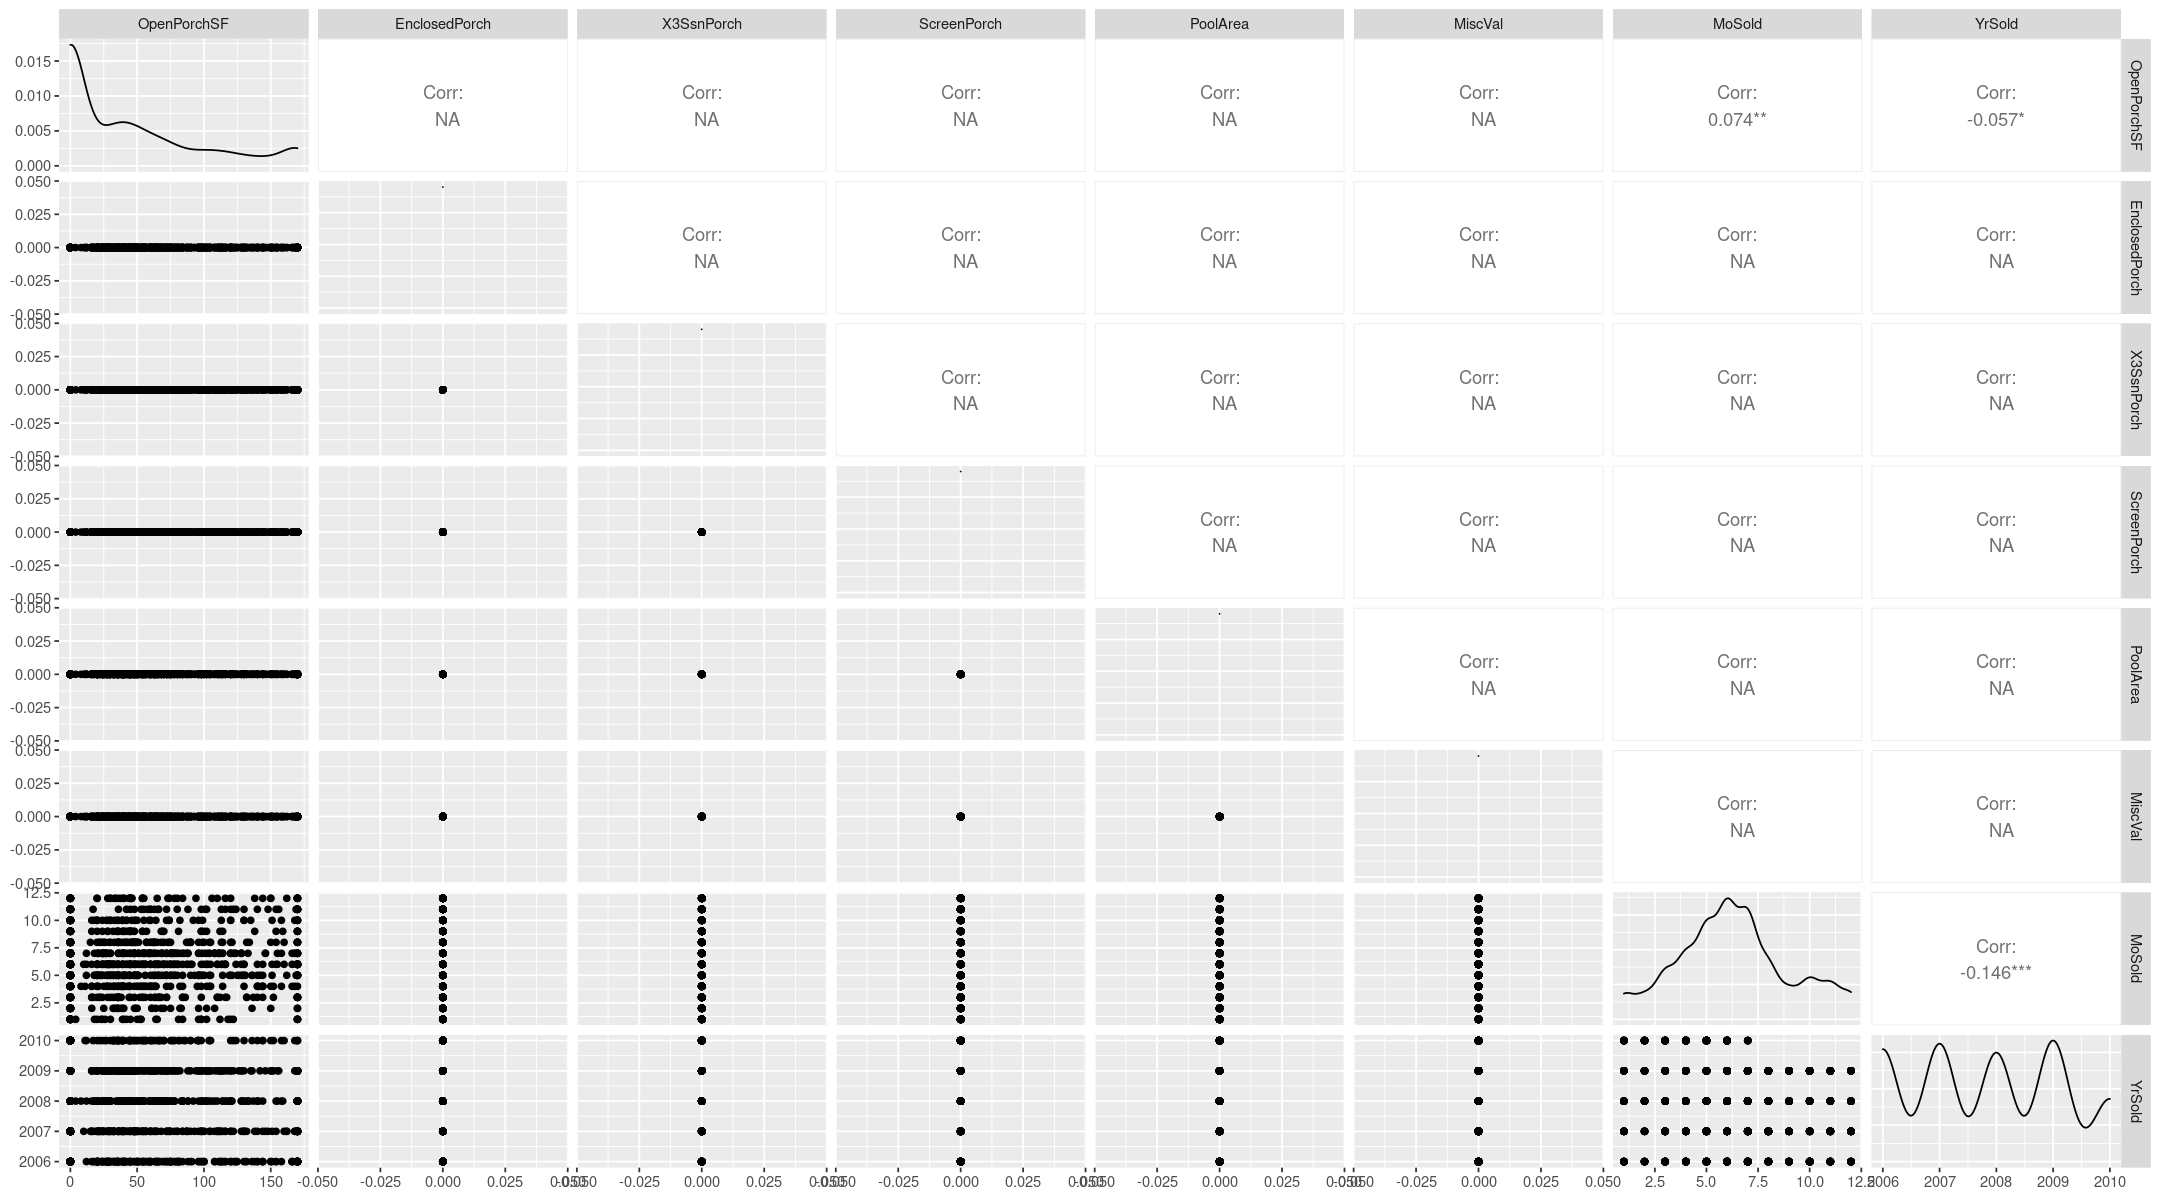

In [22]:
options(repr.plot.width=18, repr.plot.height=10)
lin = linspace(1,ncol(df_train_num),floor(ncol(df_train_num))/6)
for(i in 1:(length(lin)-1)){
    columns = colnames(df_train_num)[floor(lin[i]):floor(lin[i+1])]
    print(ggpairs(df_train_num[columns]))
   }


Para ilustrar mejor el comportamiento de las variables veamos los gráficos de densidad de cada una. 

In [23]:
options(repr.plot.width=10, repr.plot.height=5)

NULL


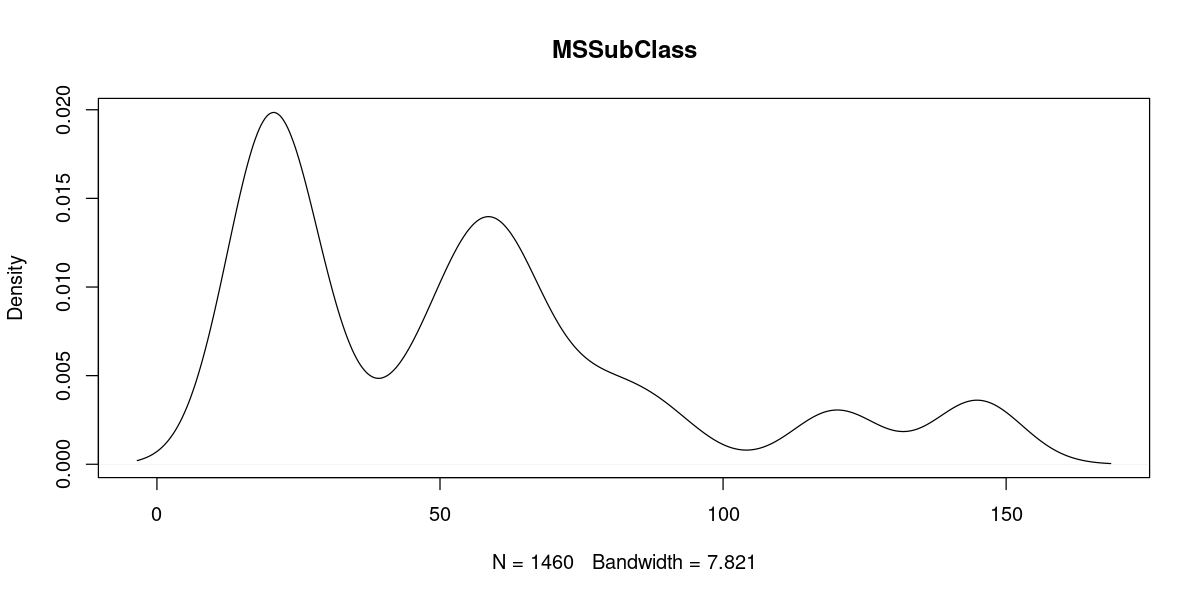

NULL


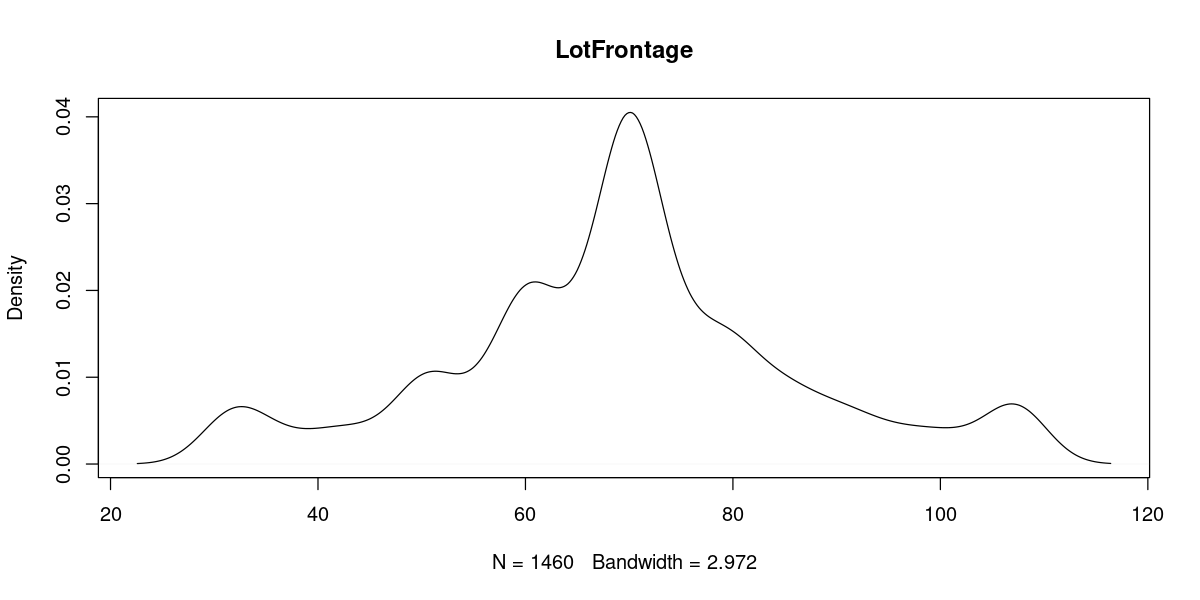

NULL


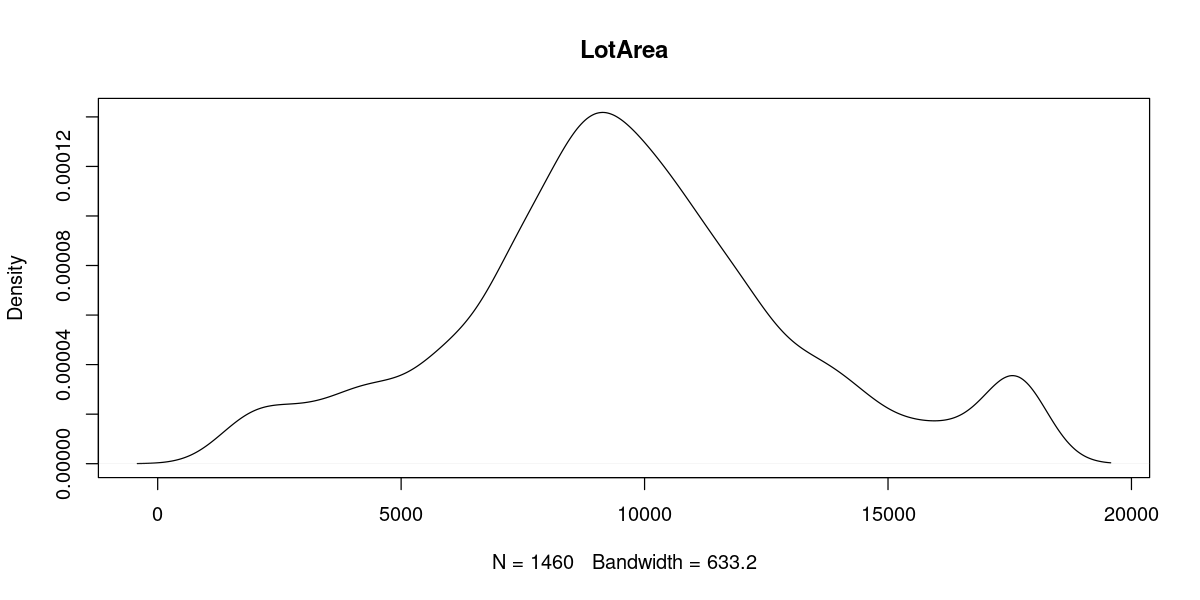

NULL


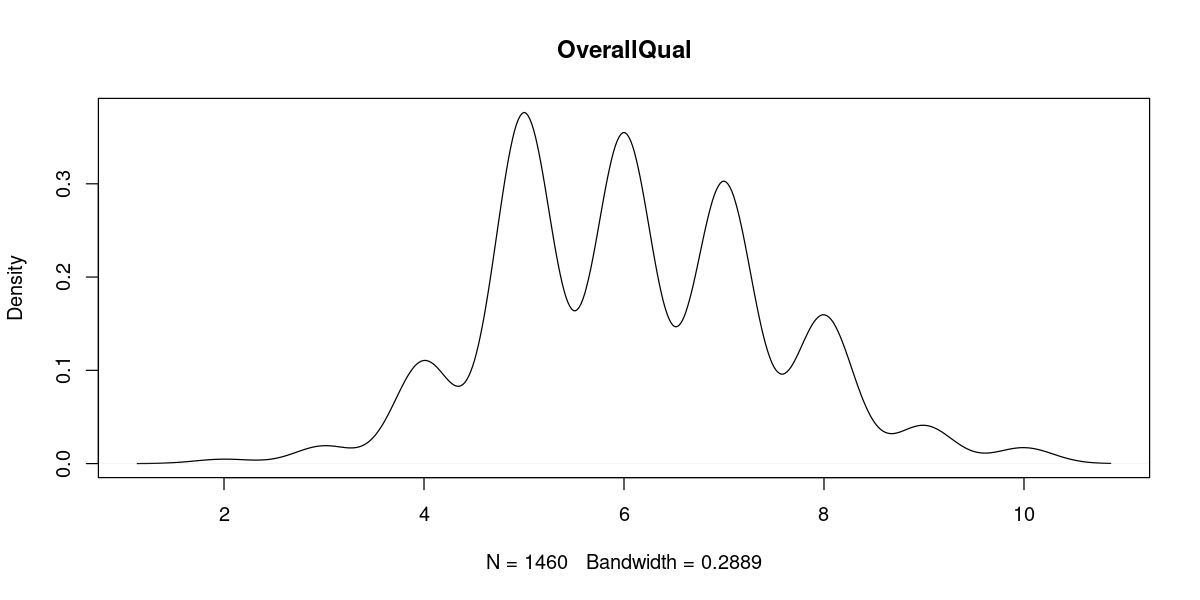

NULL


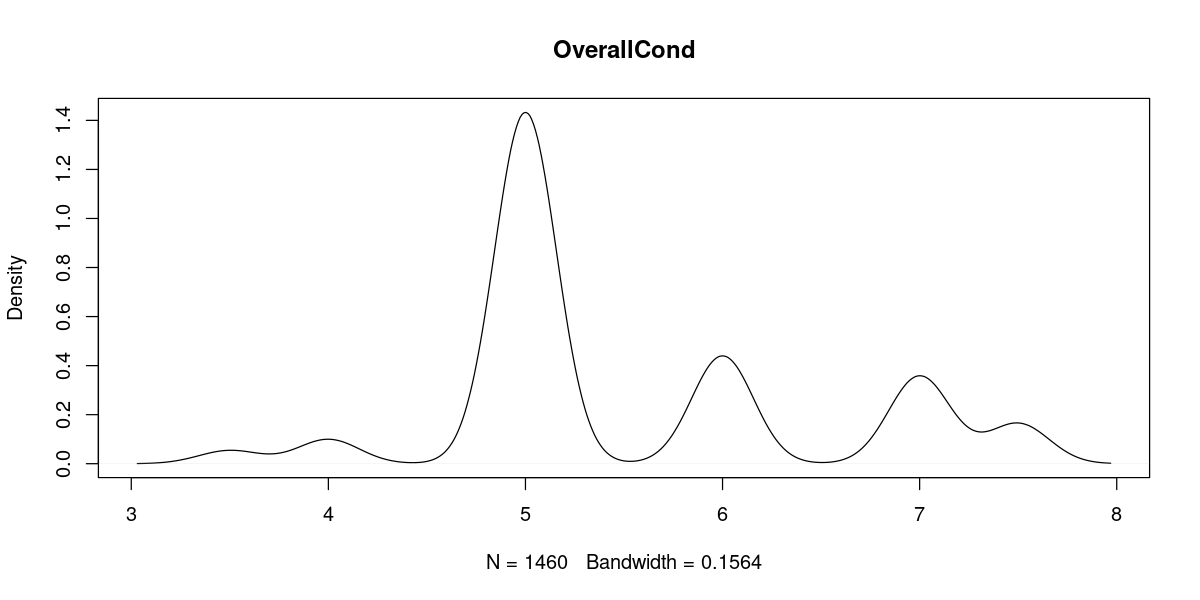

NULL


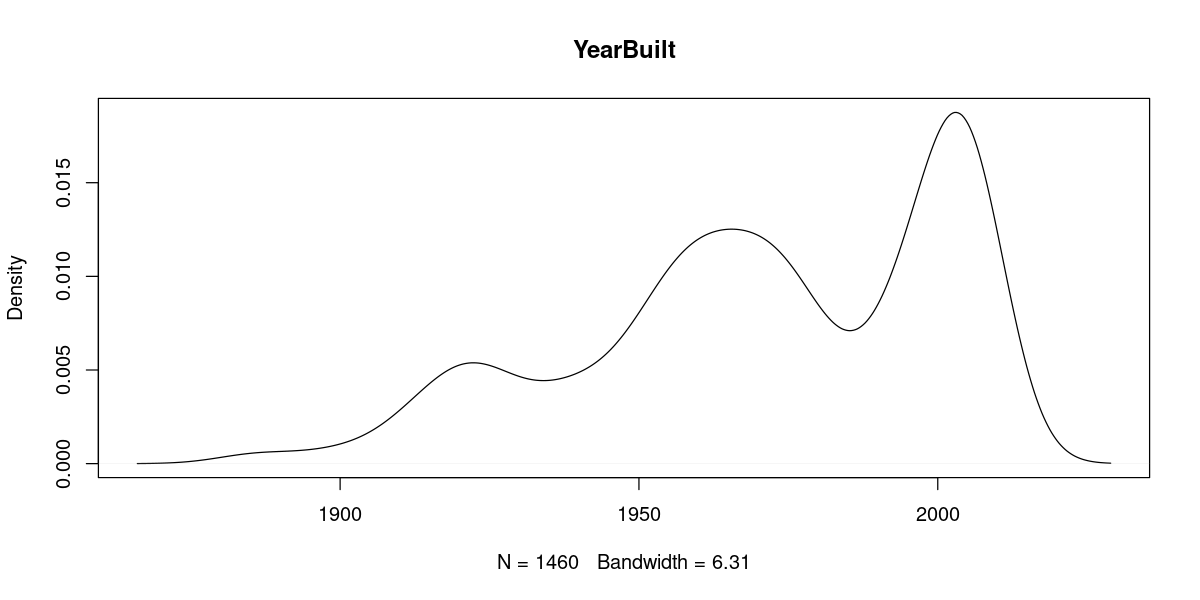

NULL


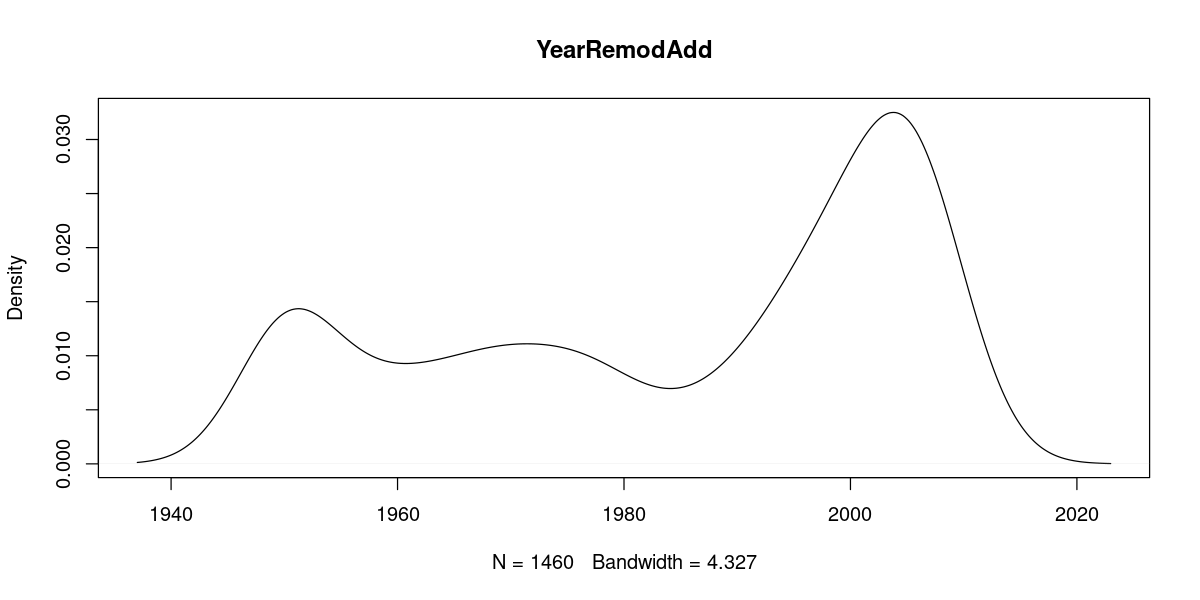

NULL


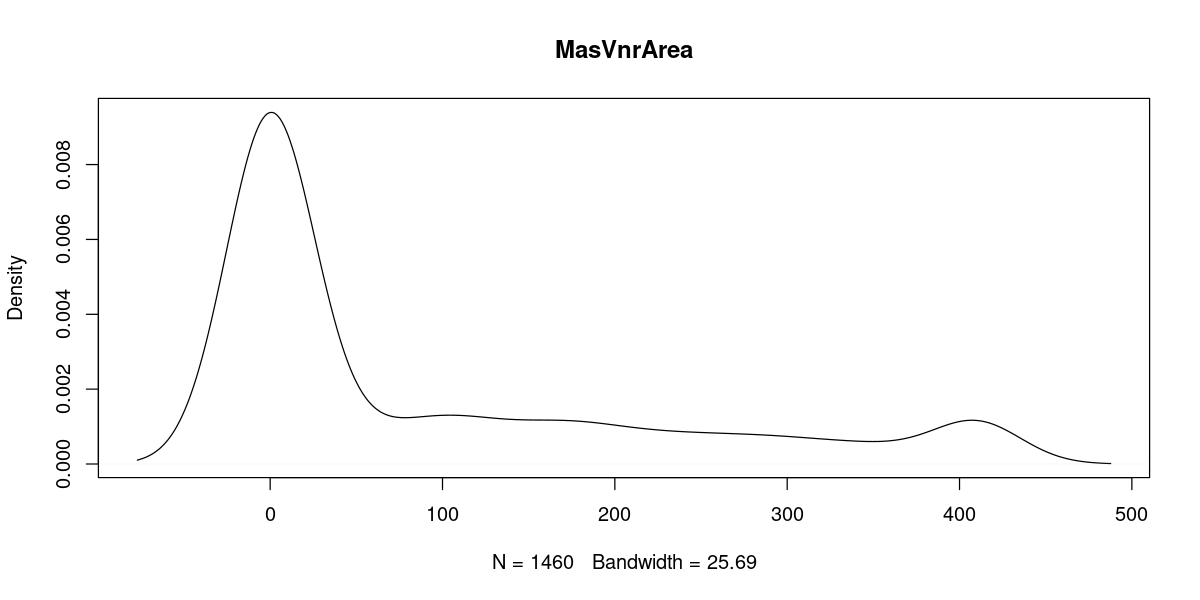

NULL


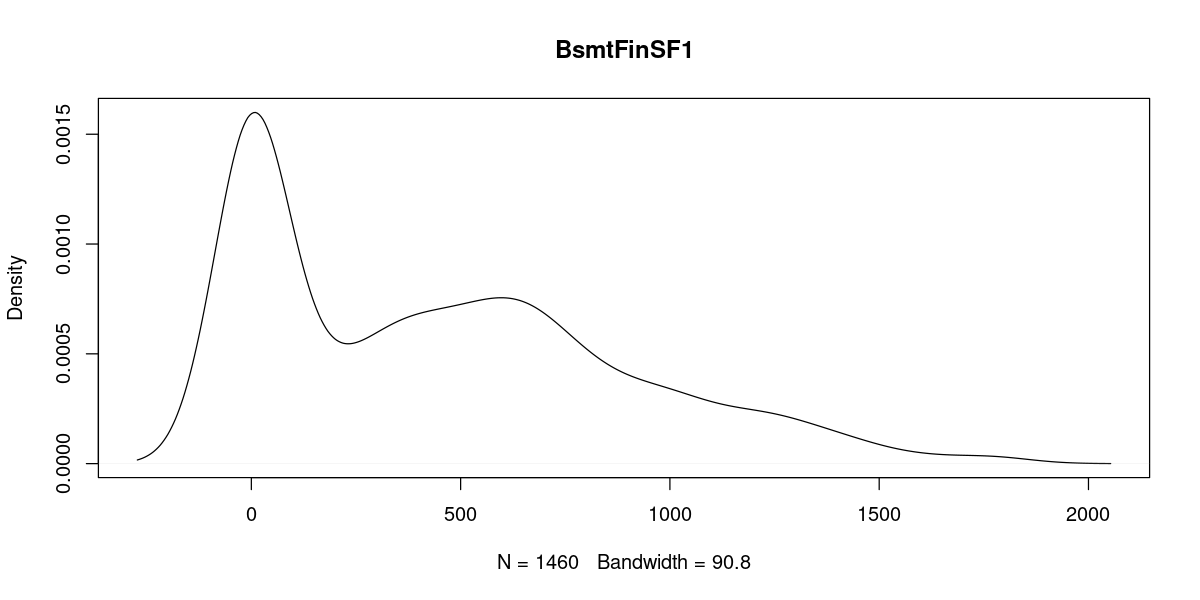

NULL


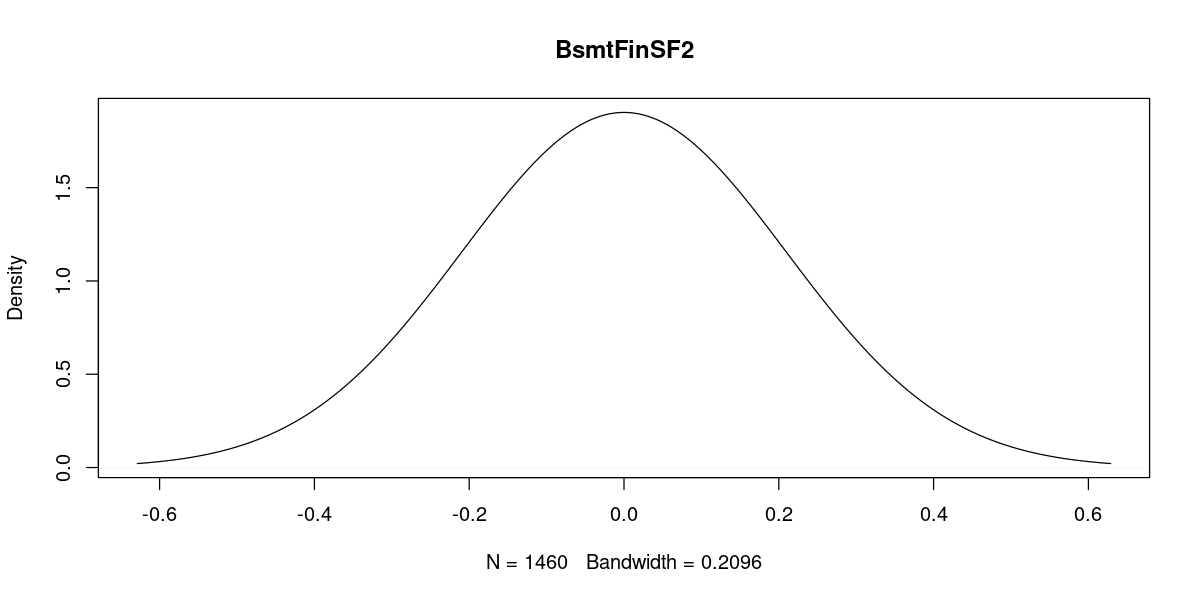

NULL


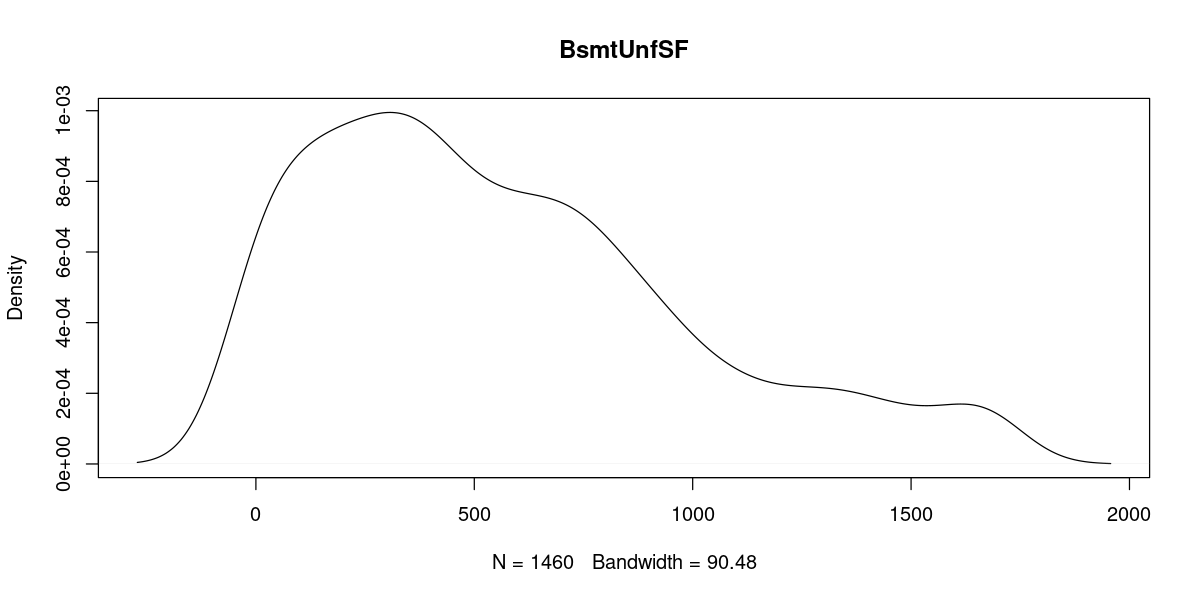

NULL


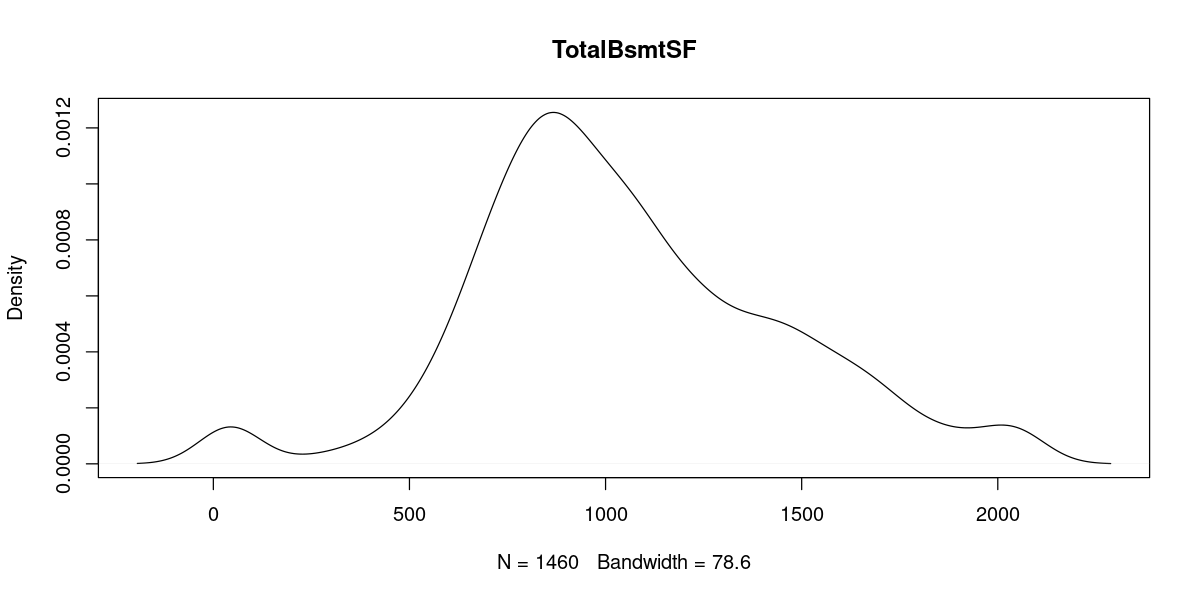

NULL


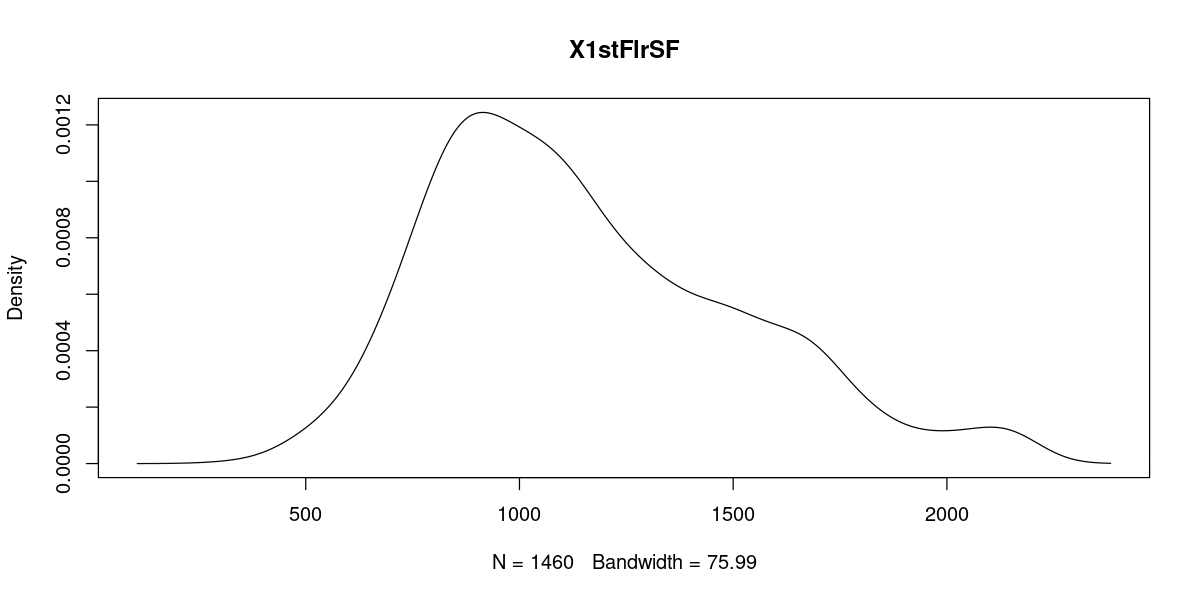

NULL


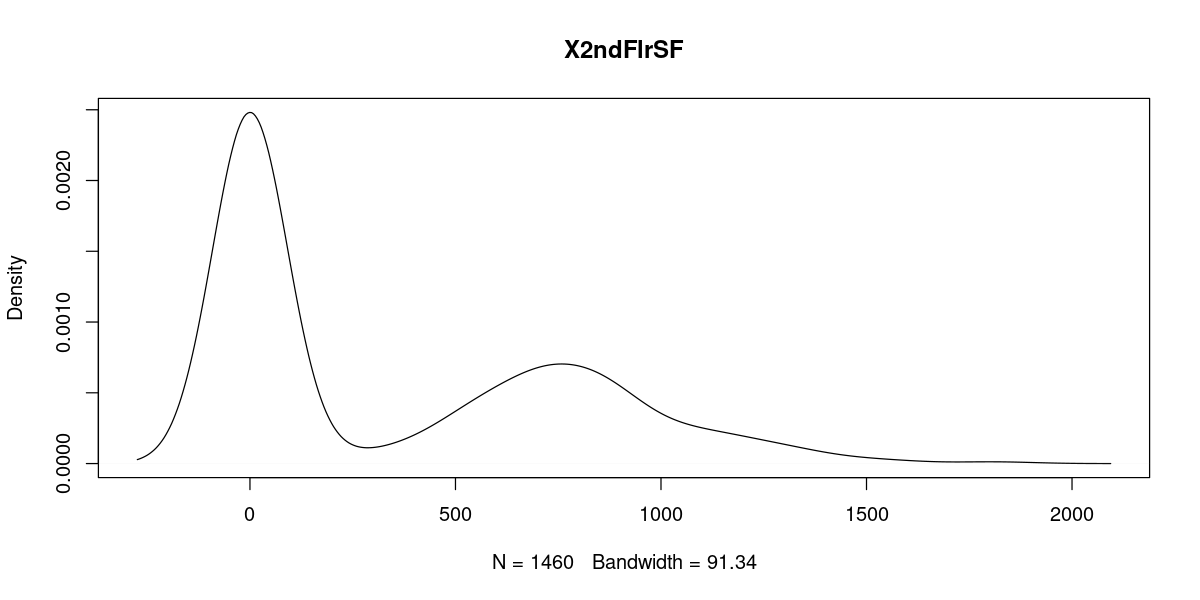

NULL


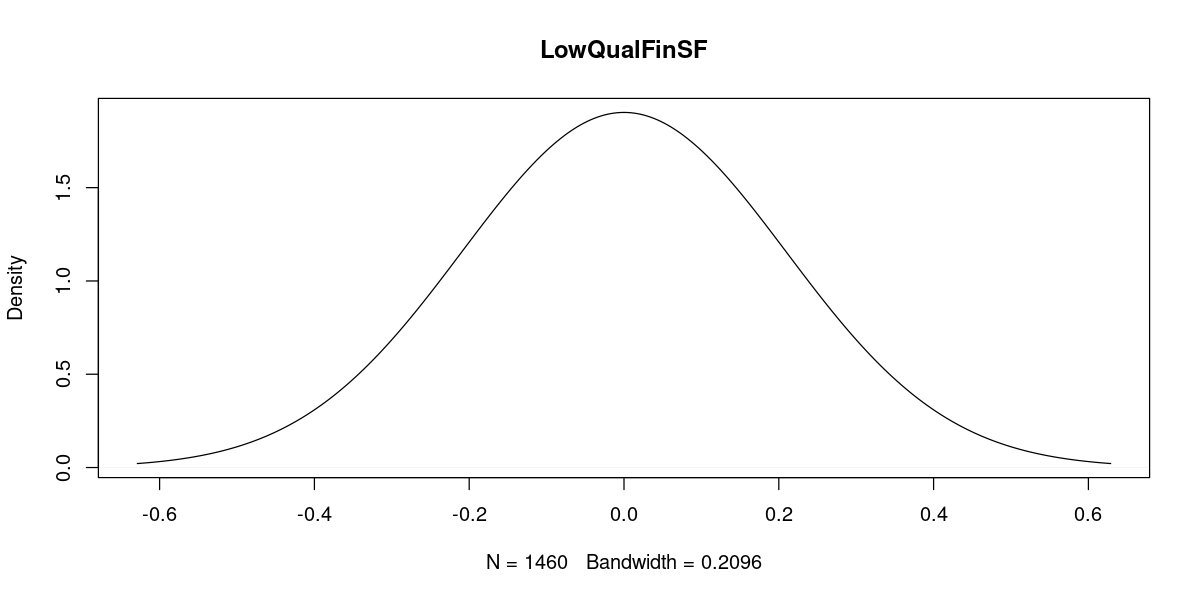

NULL


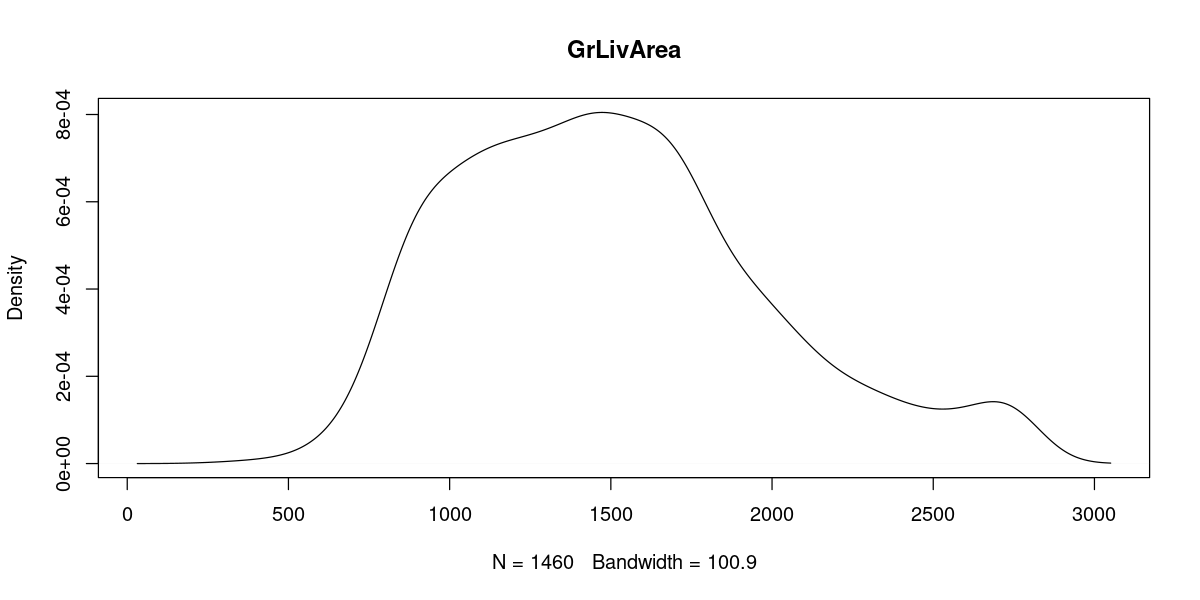

NULL


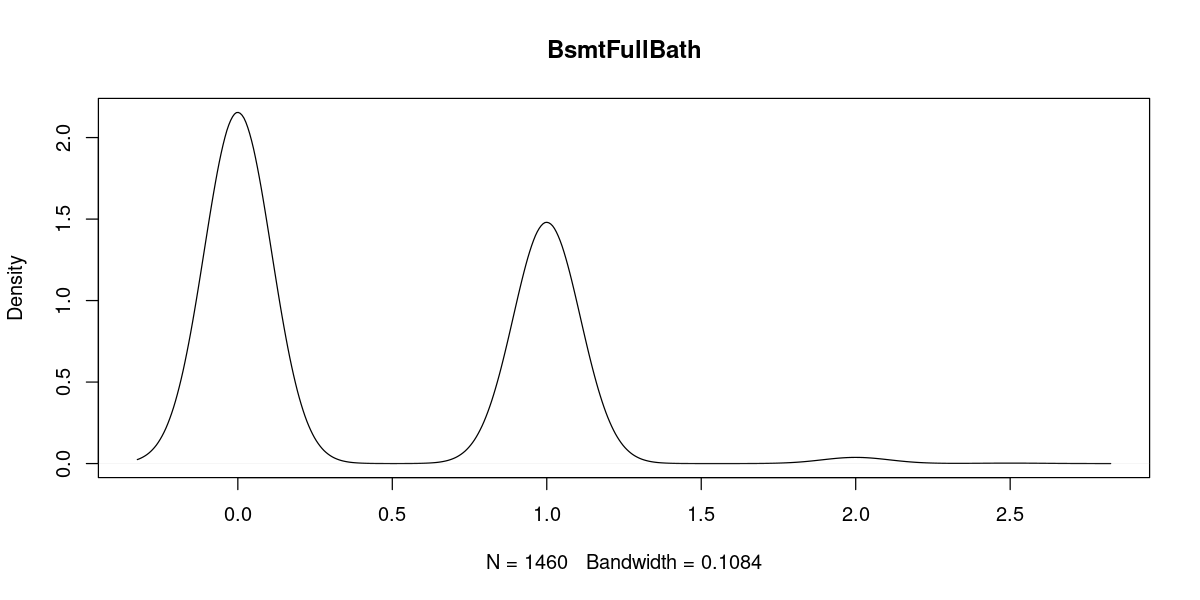

NULL


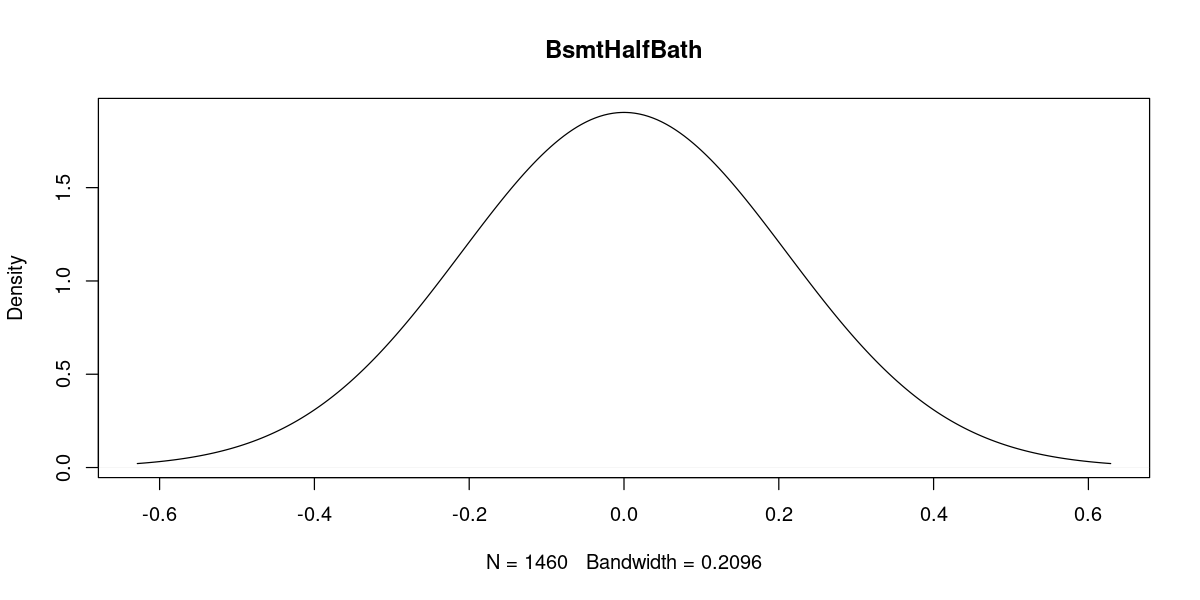

NULL


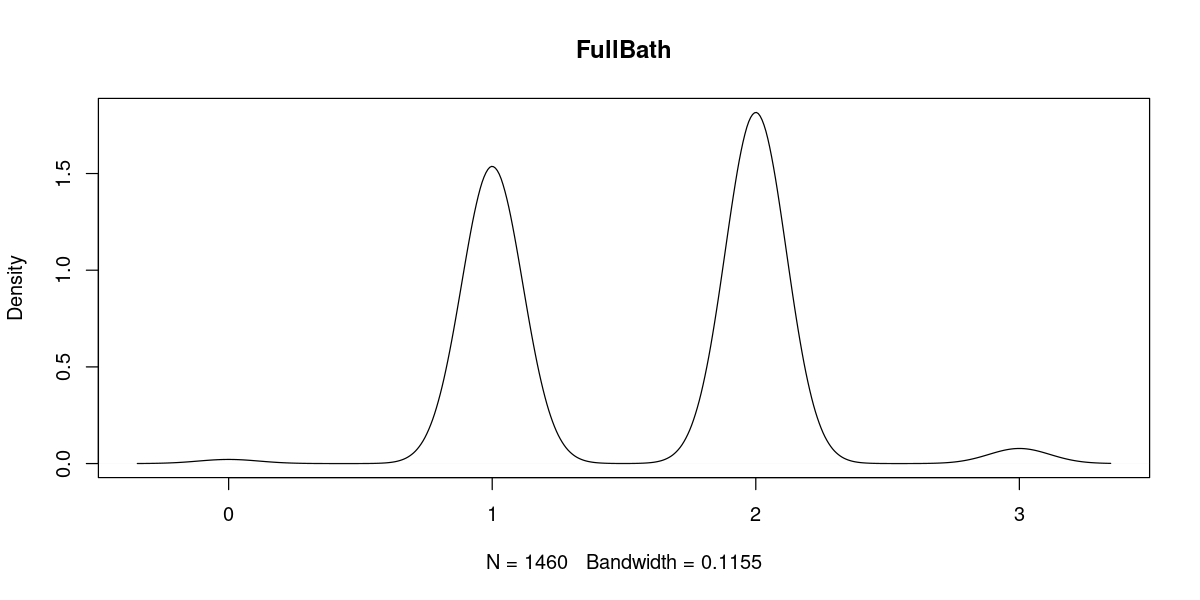

NULL


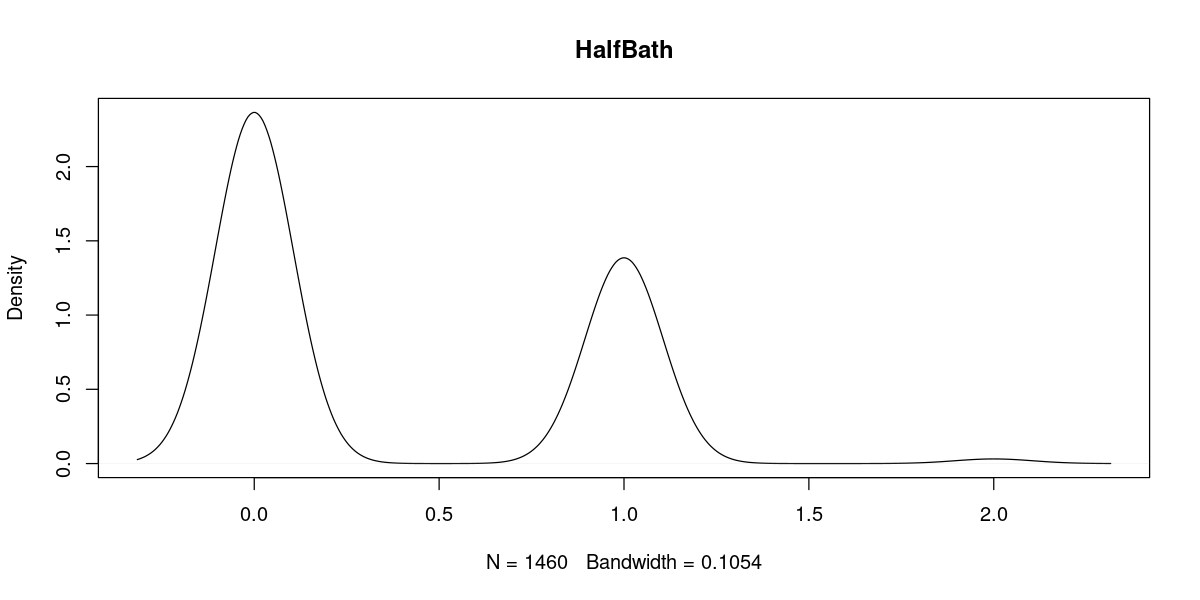

NULL


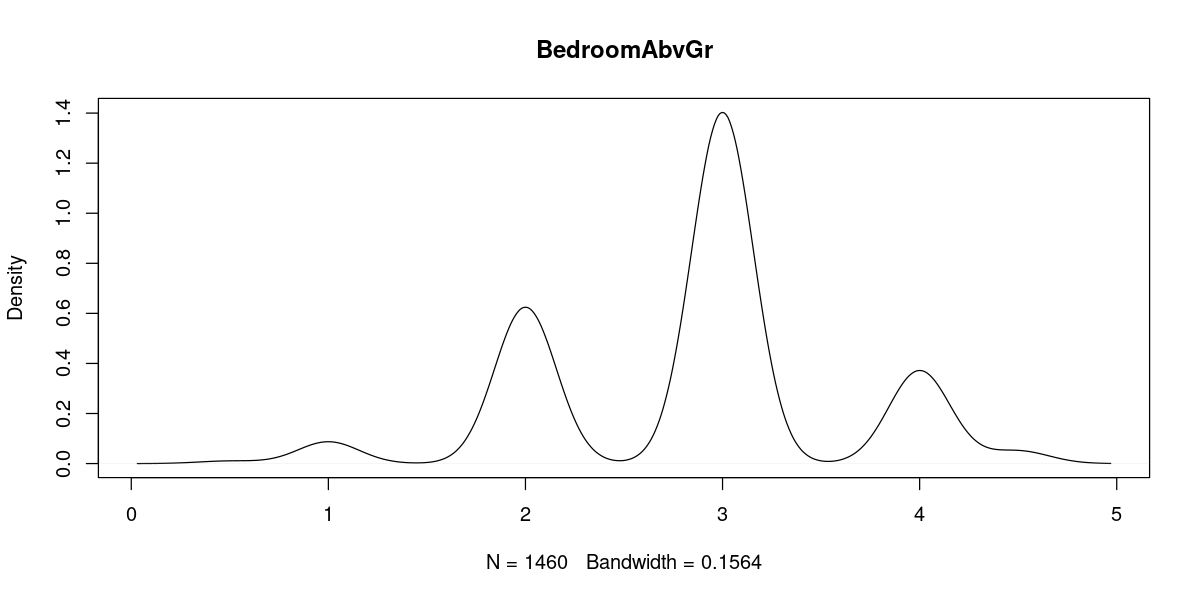

NULL


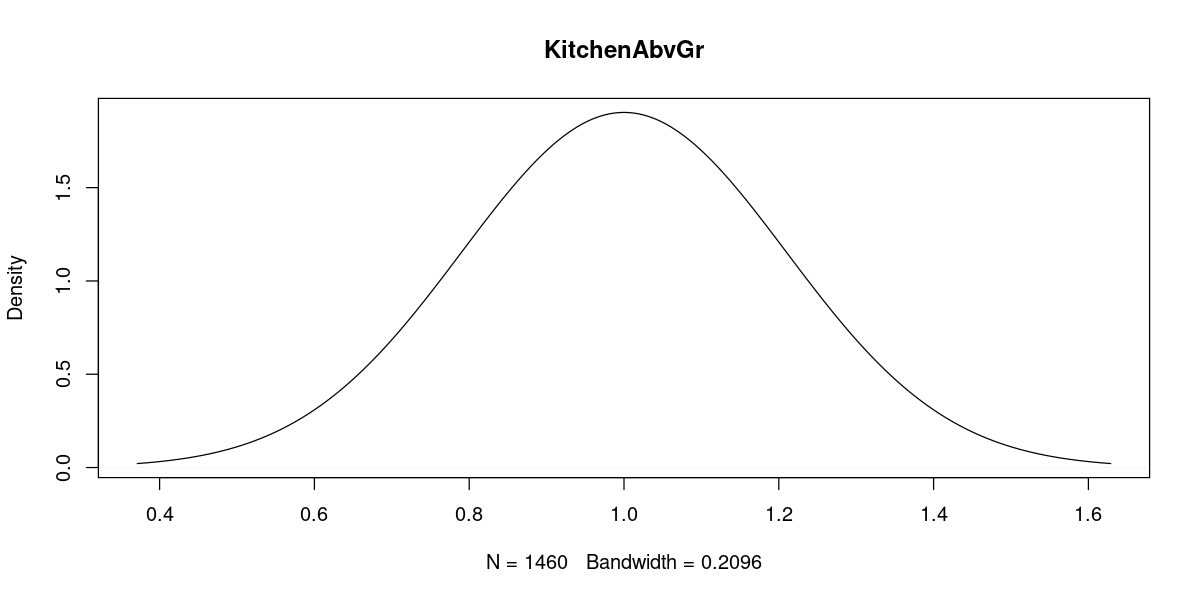

NULL


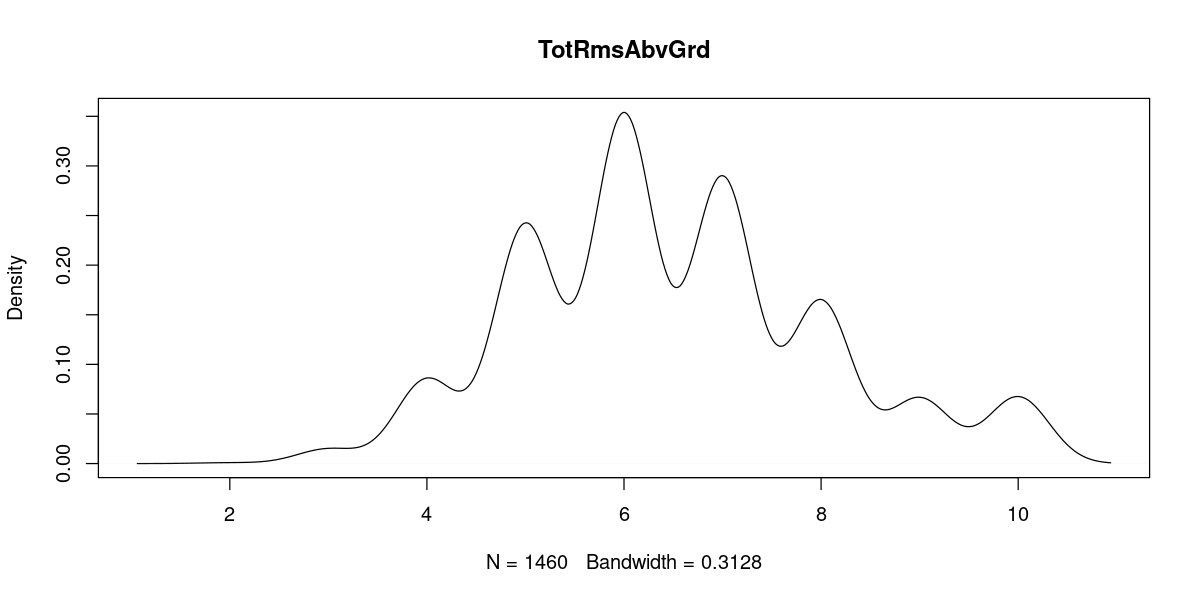

NULL


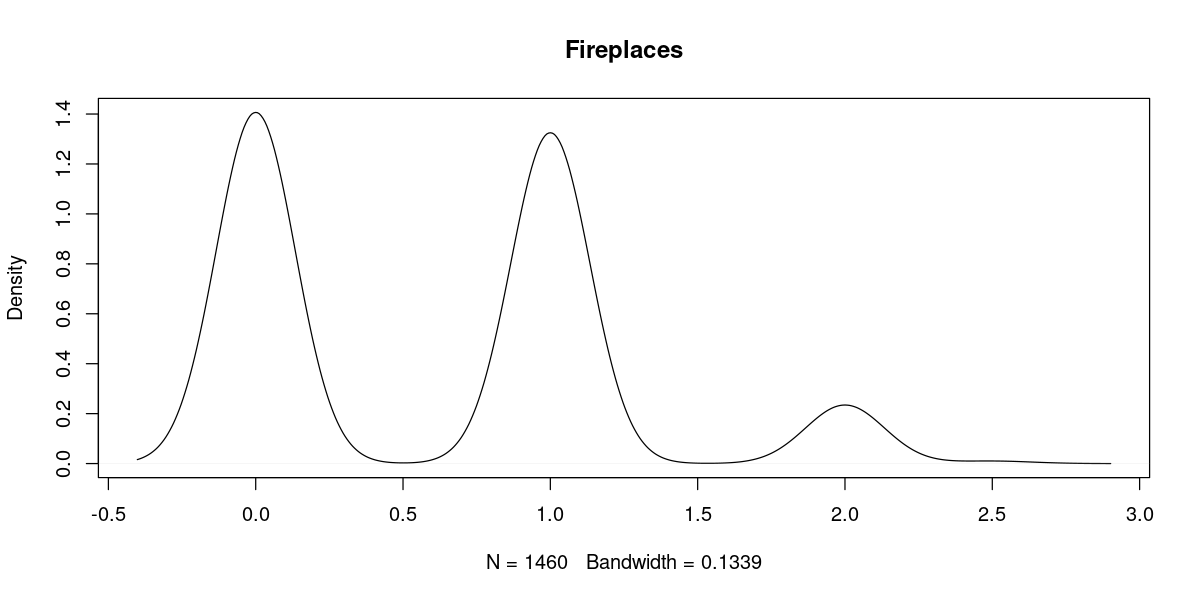

NULL


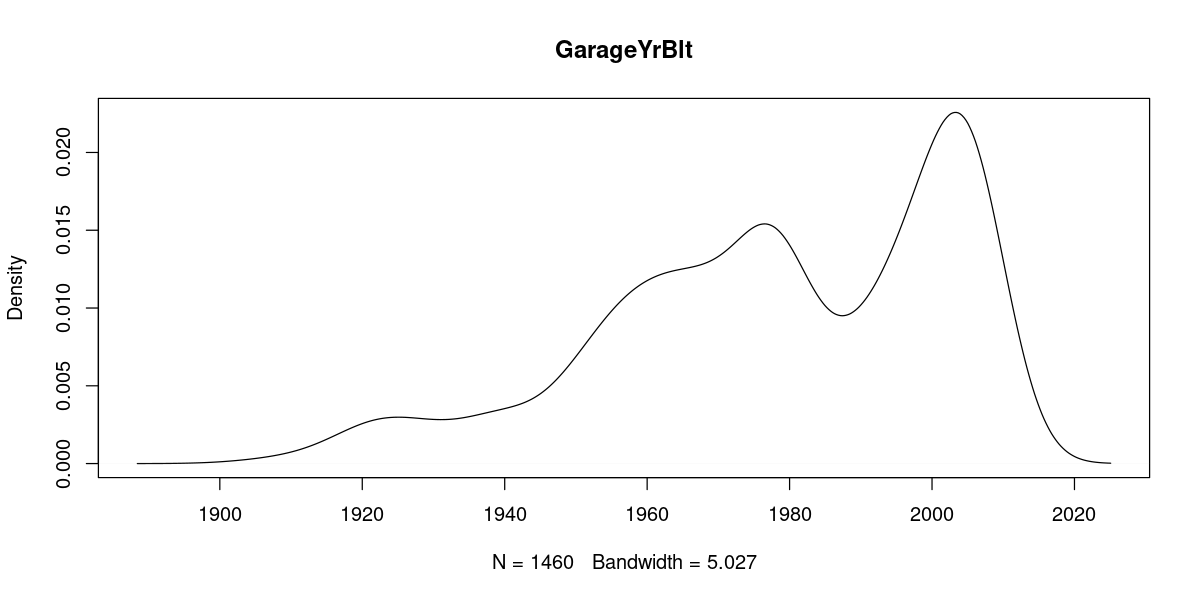

NULL


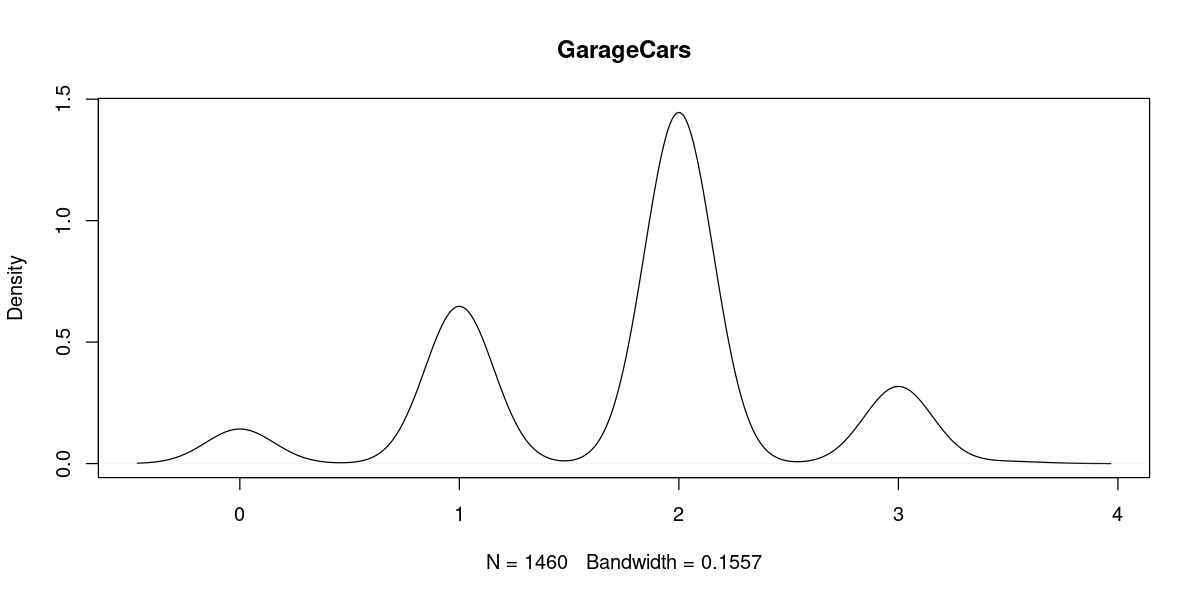

NULL


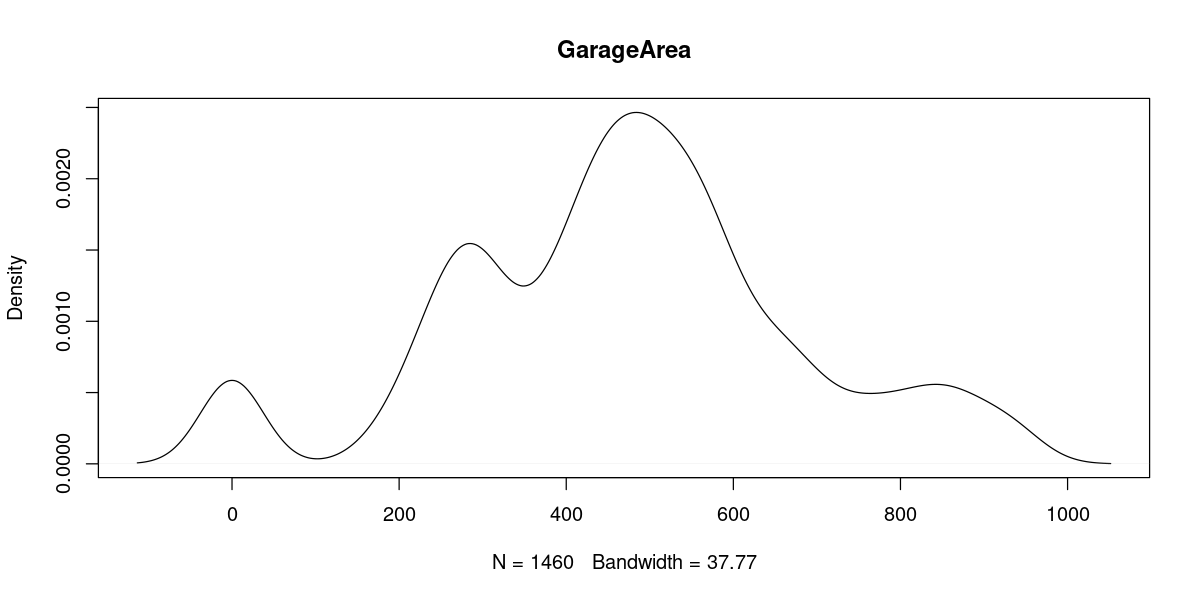

NULL


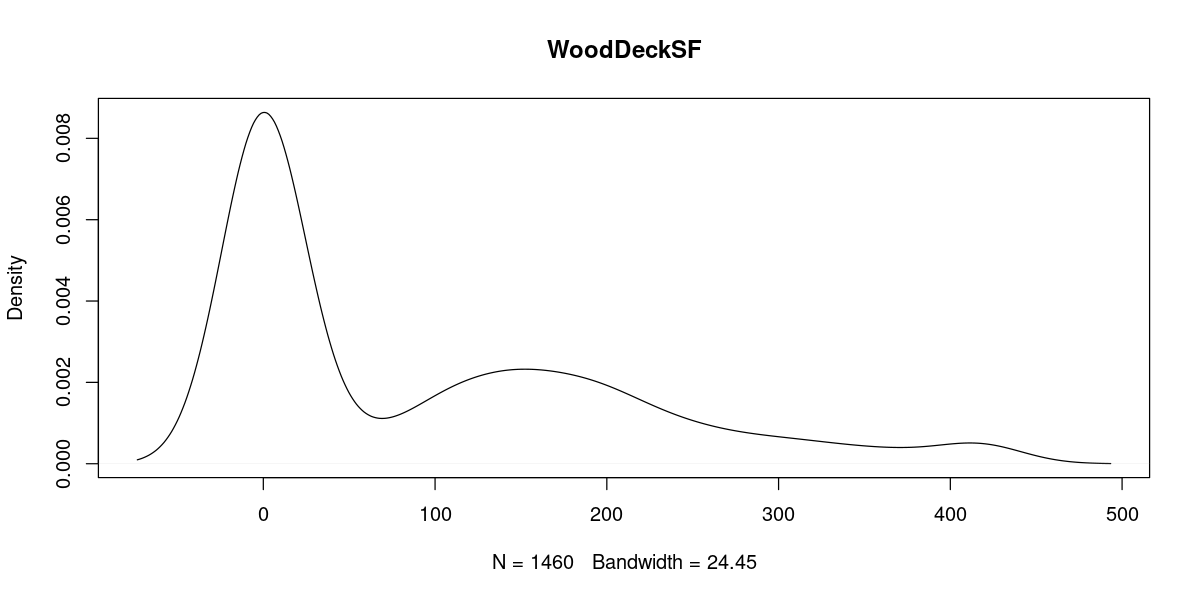

NULL


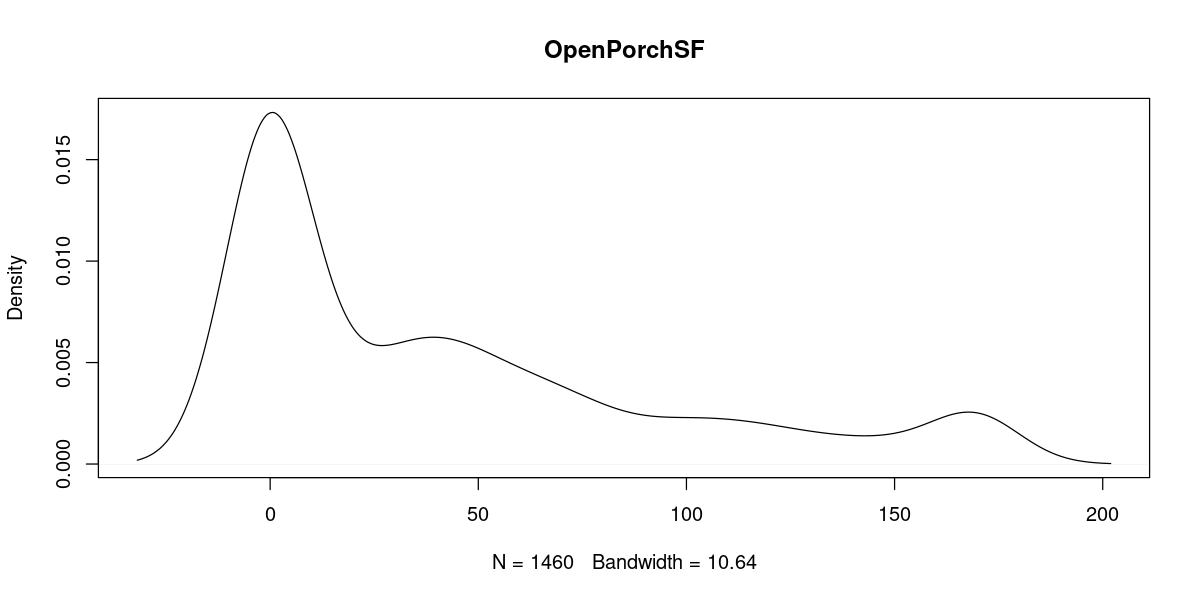

NULL


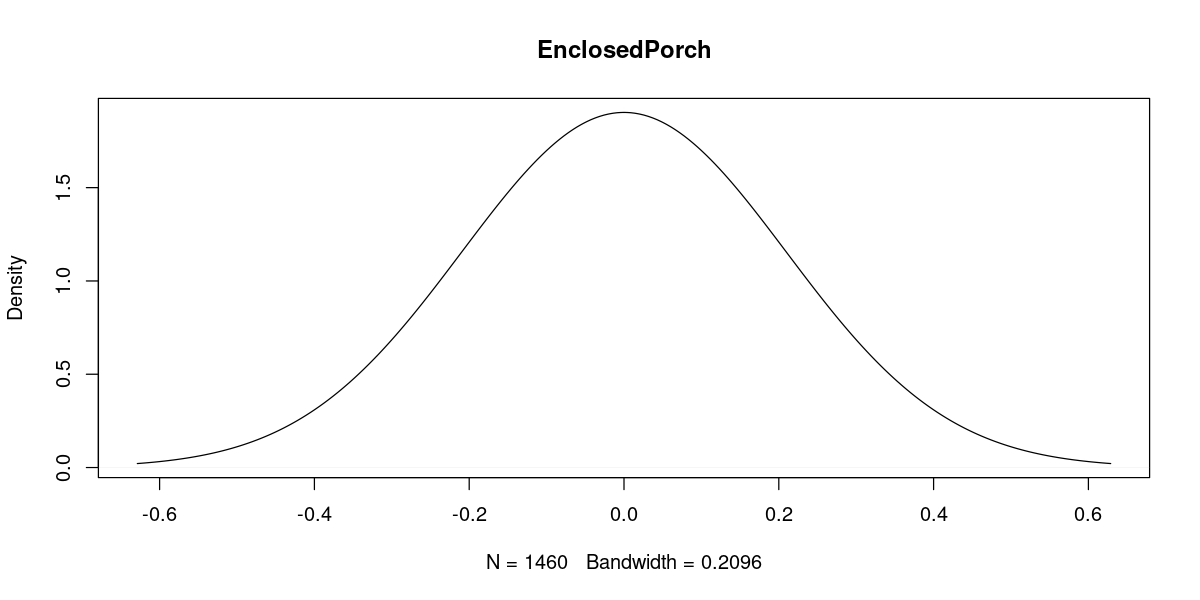

NULL


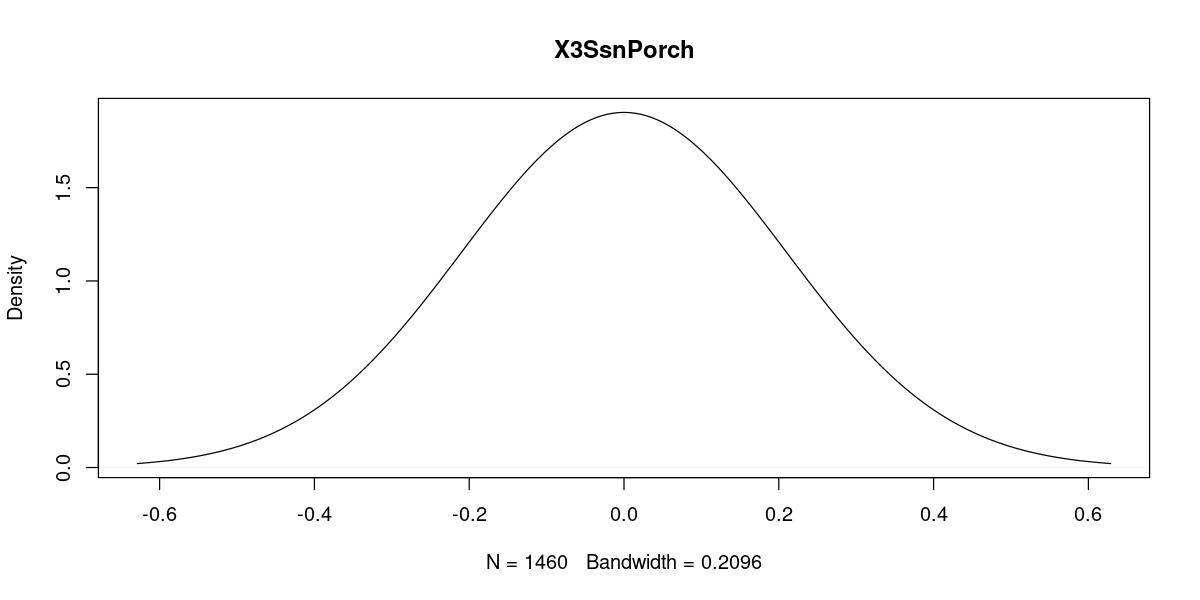

NULL


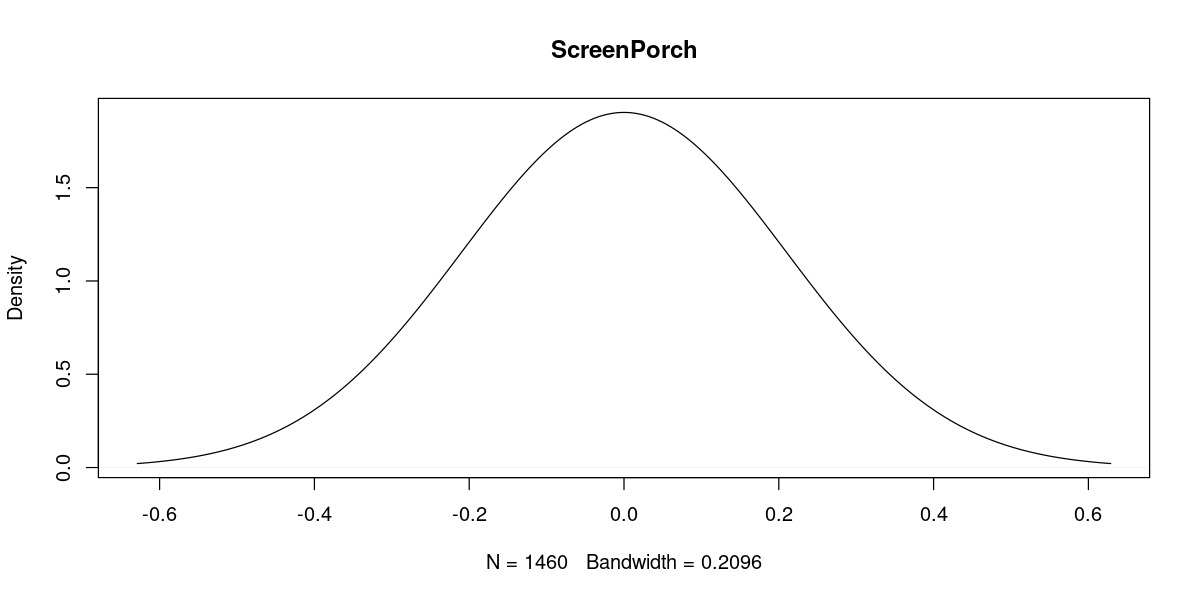

NULL


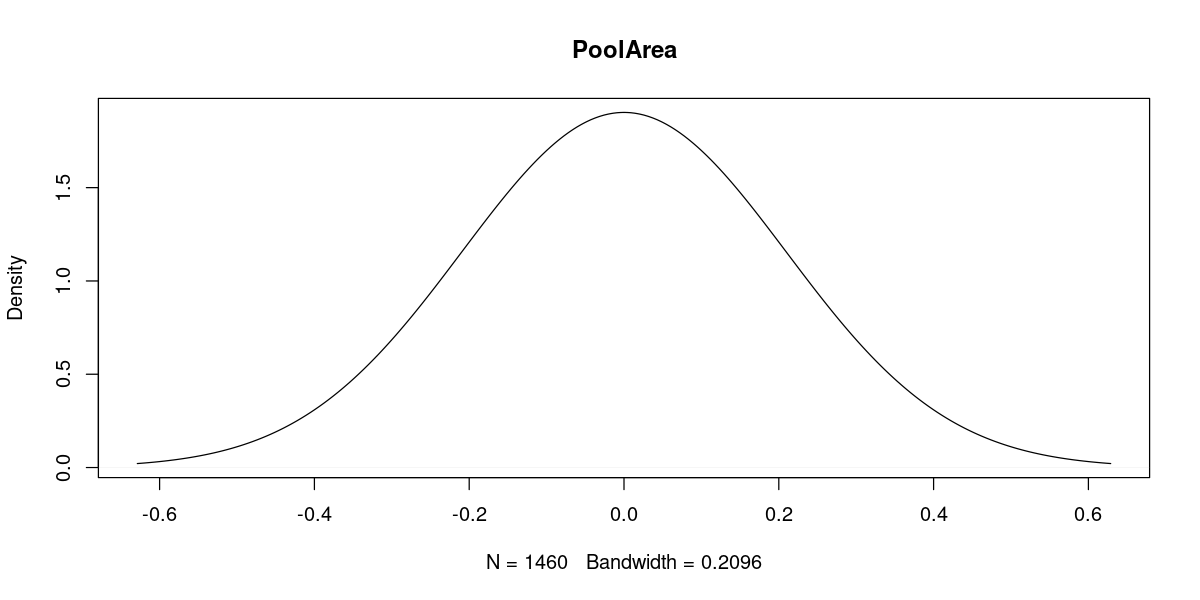

NULL


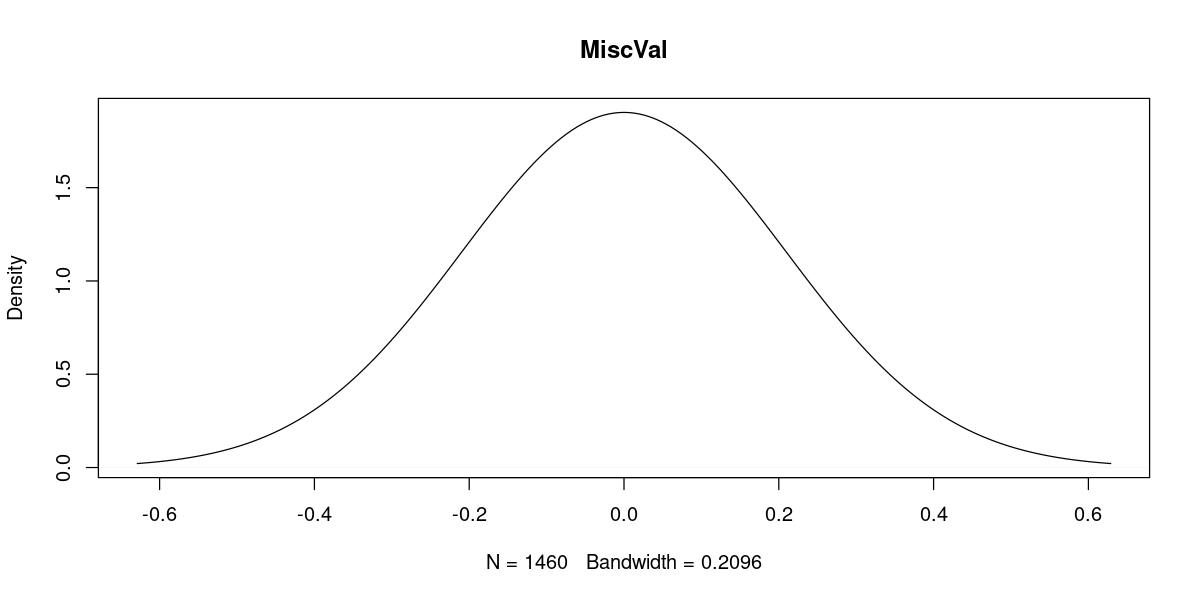

NULL


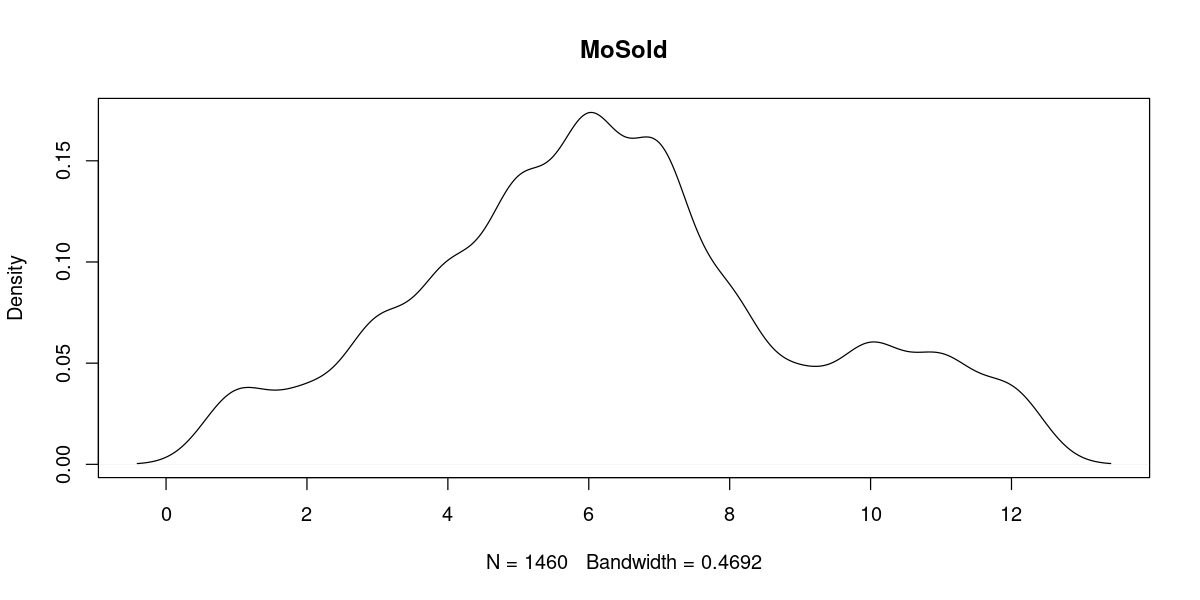

NULL


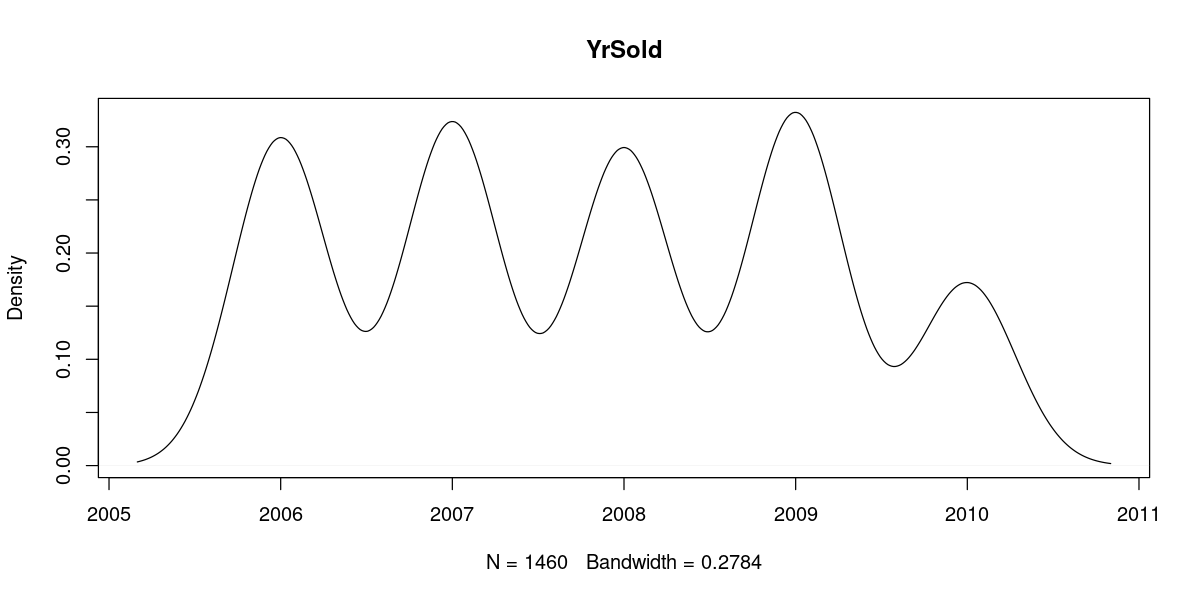

In [24]:
dfcolumns <- colnames(df_train_num)
for(i in 1:ncol(df_train_num)){
    col <- dfcolumns[i] 
    plots <- plot(density(df_train_num[[col]]),main=col)
    print(plots)
                  }


Algo equivalente, pero con gráficas de barras, ilustra el comportamiento de las variables categóricas. 

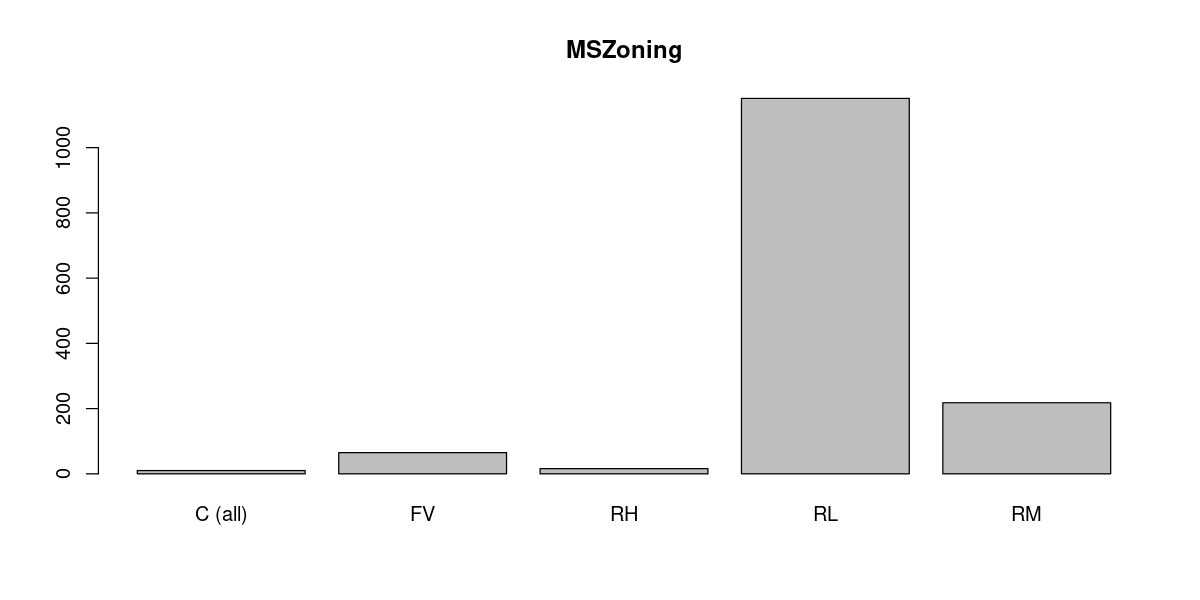

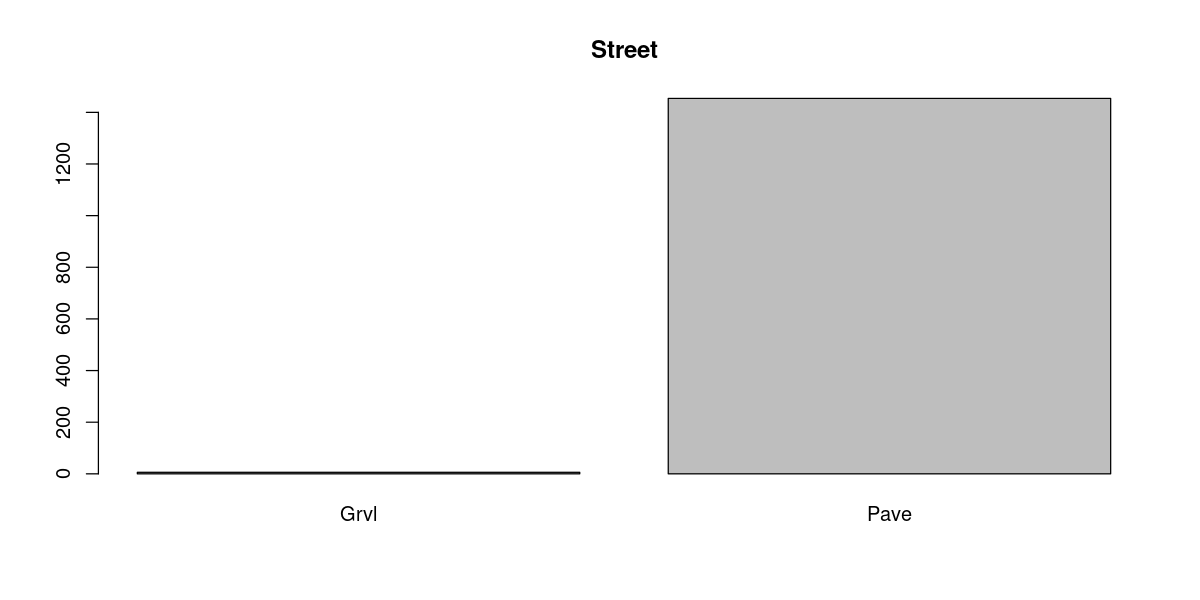

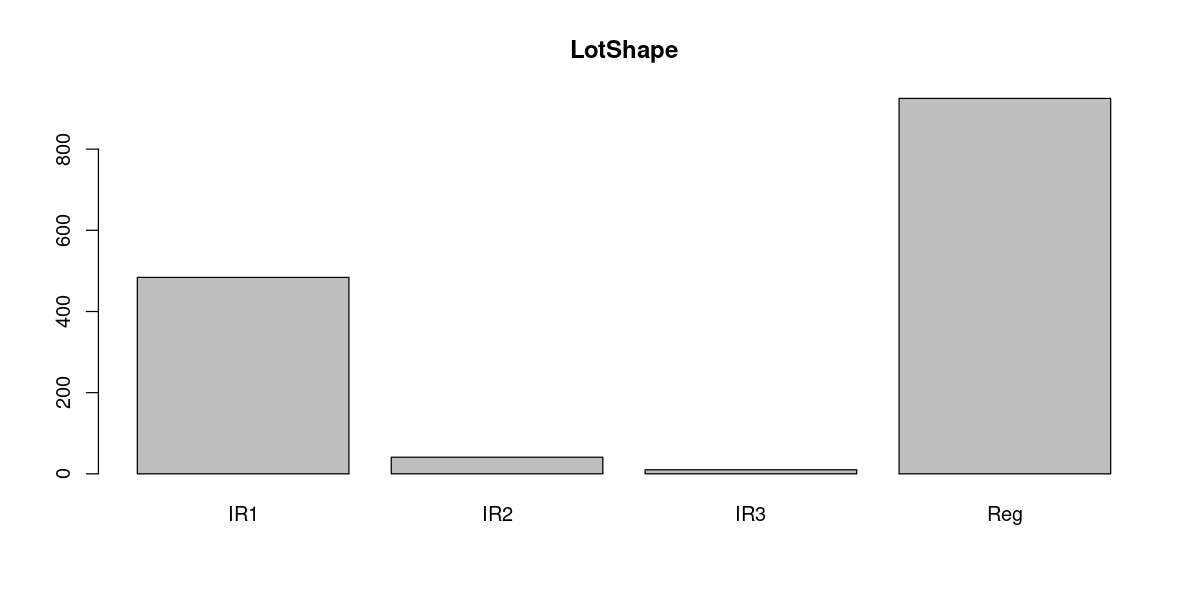

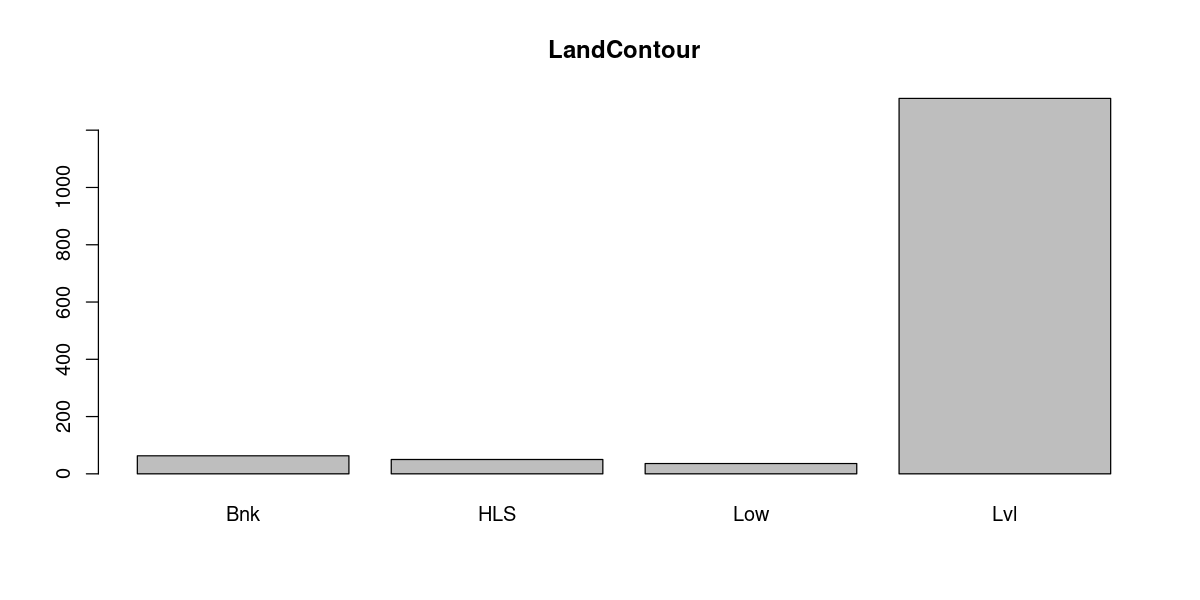

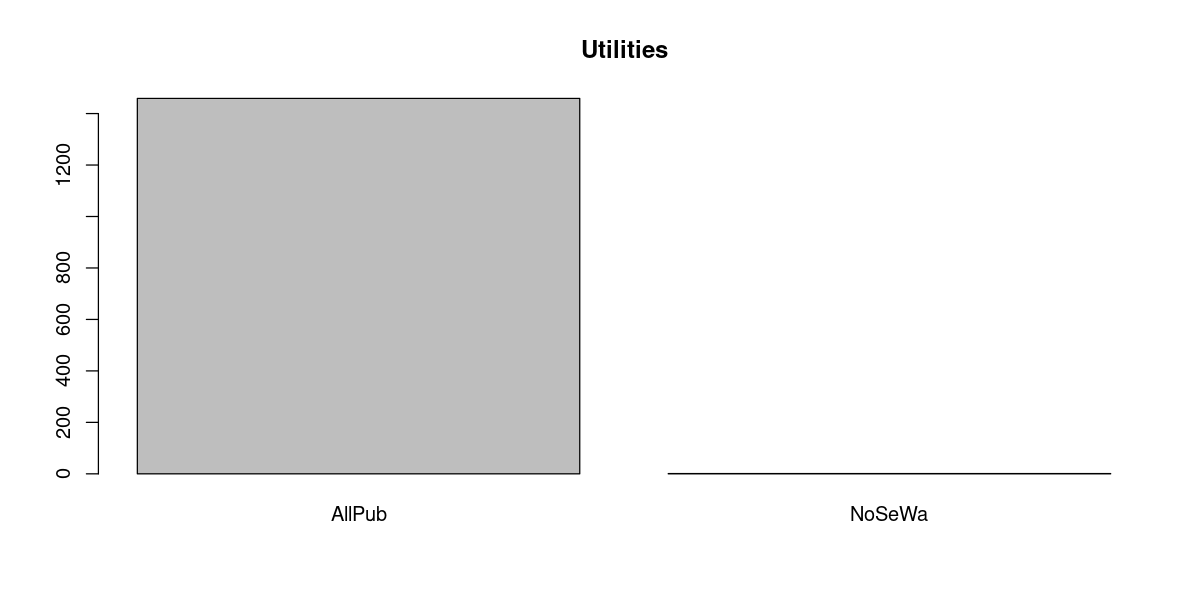

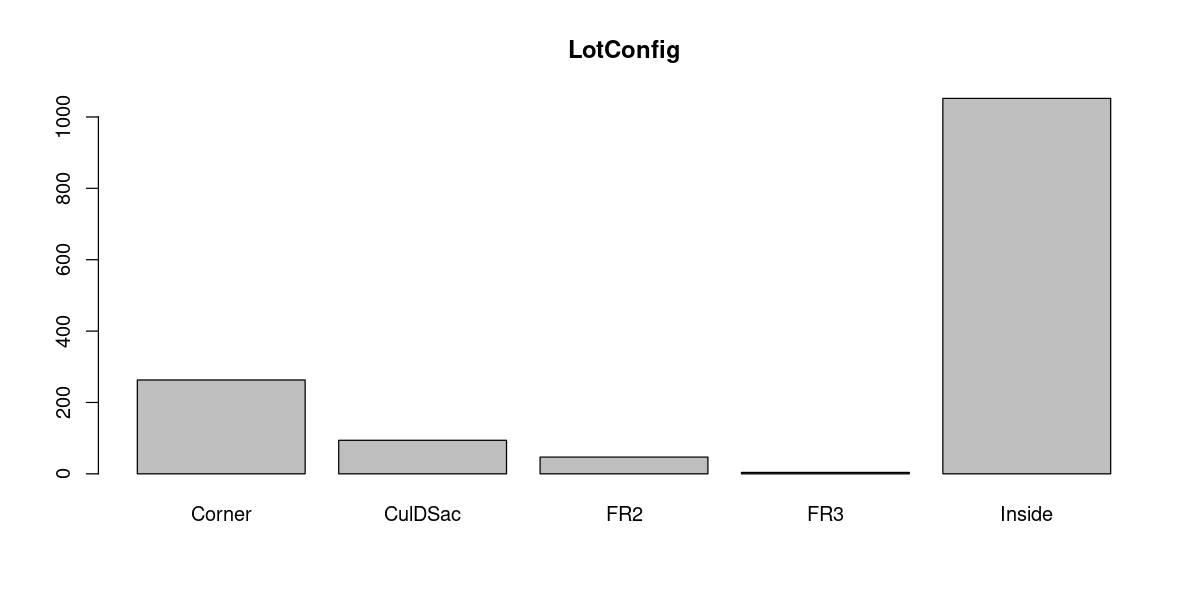

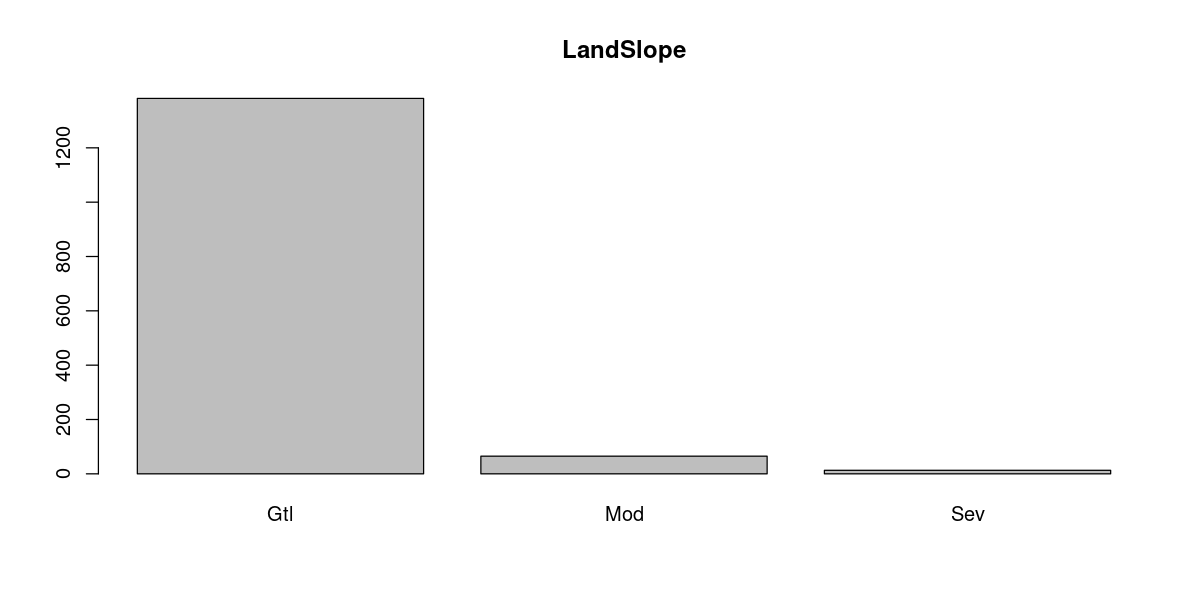

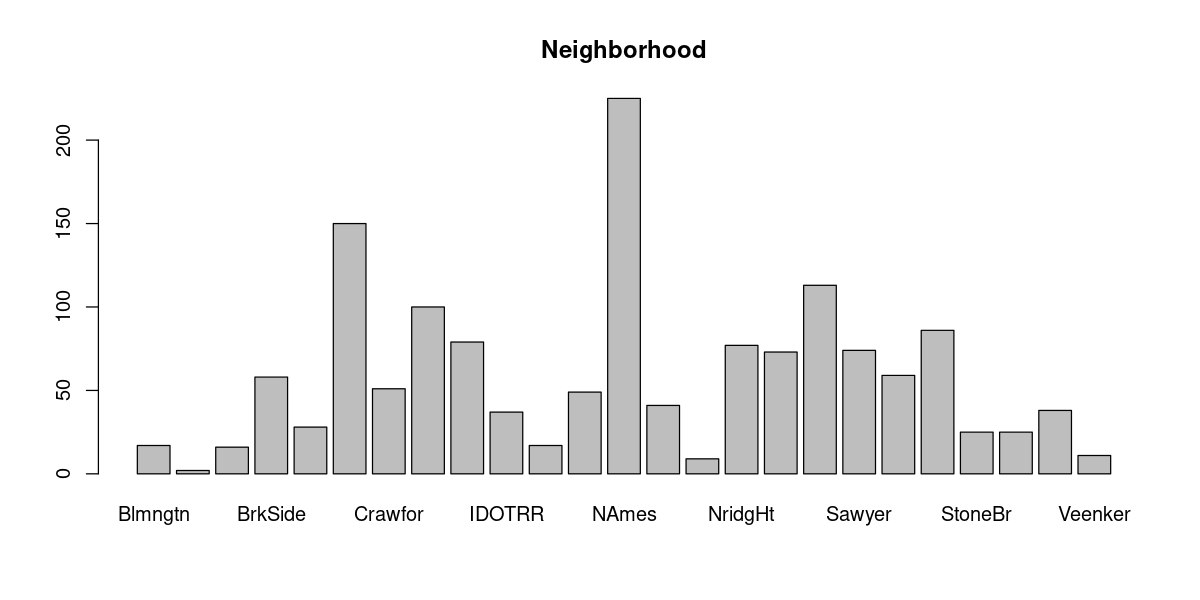

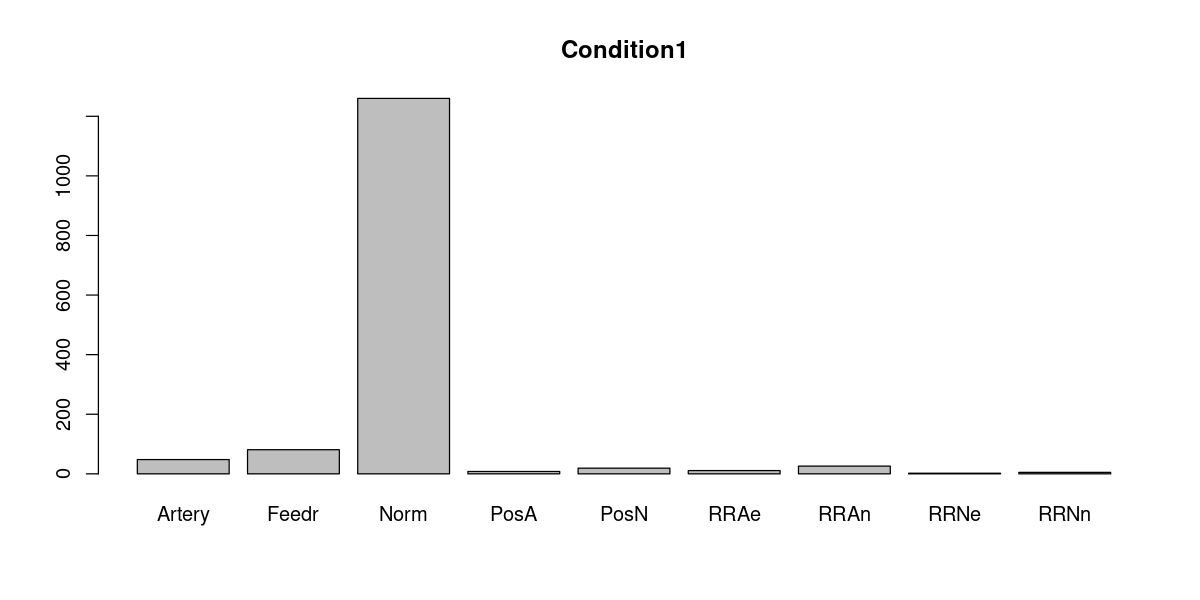

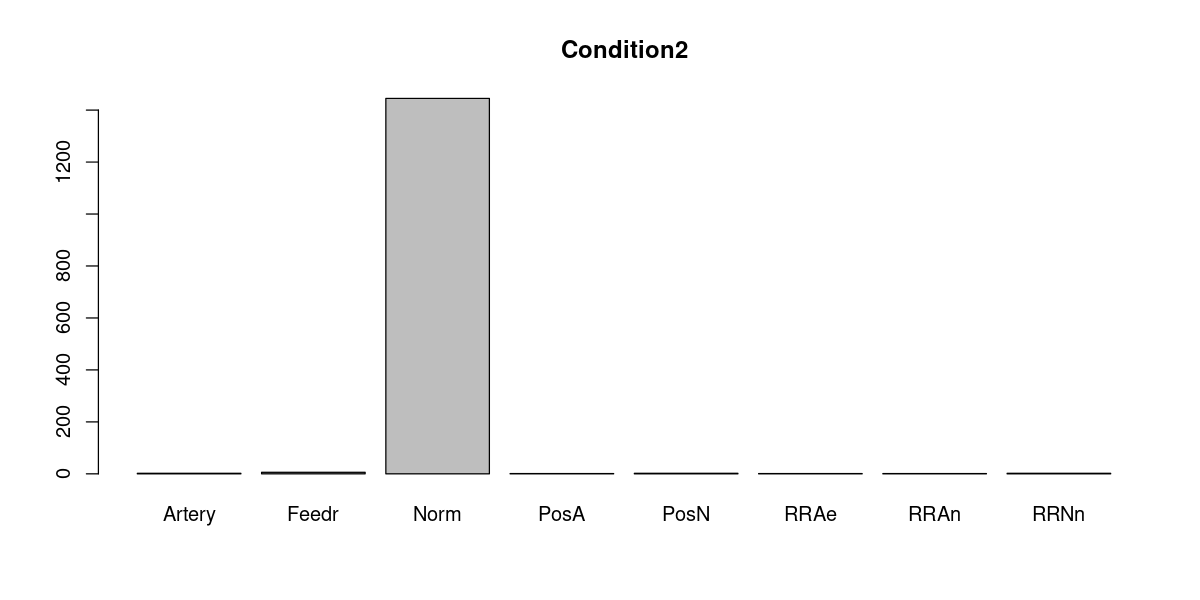

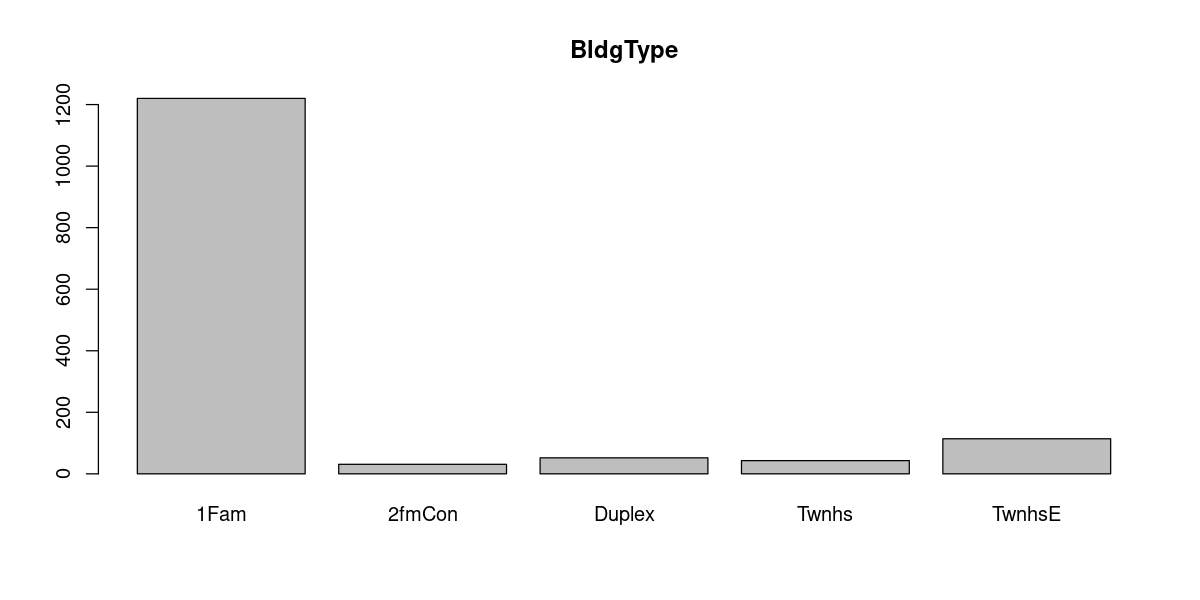

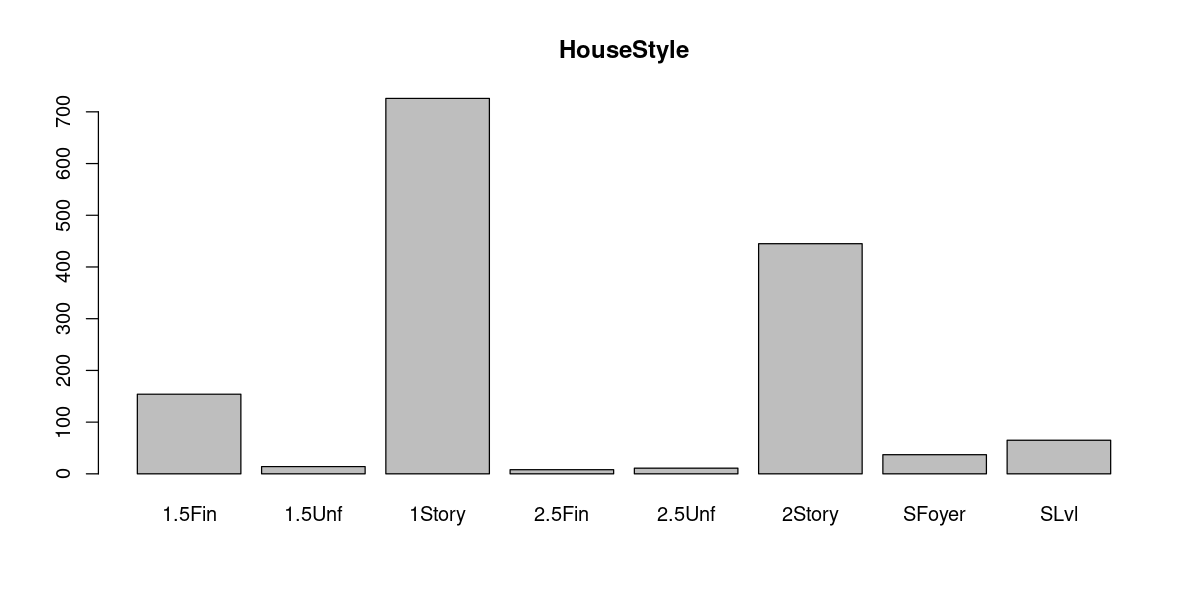

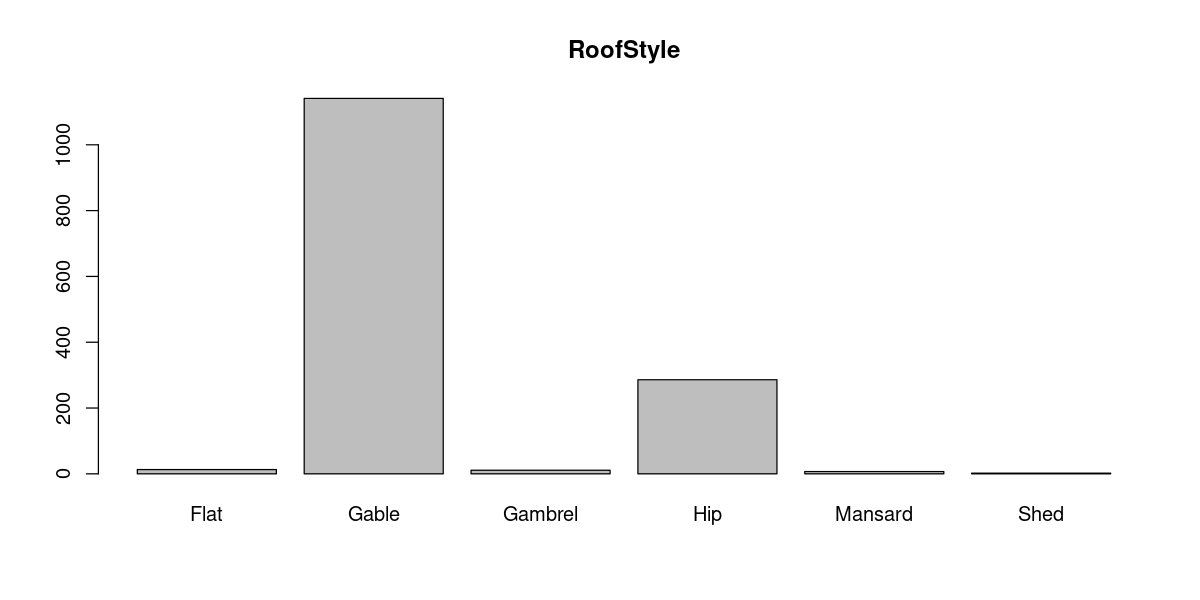

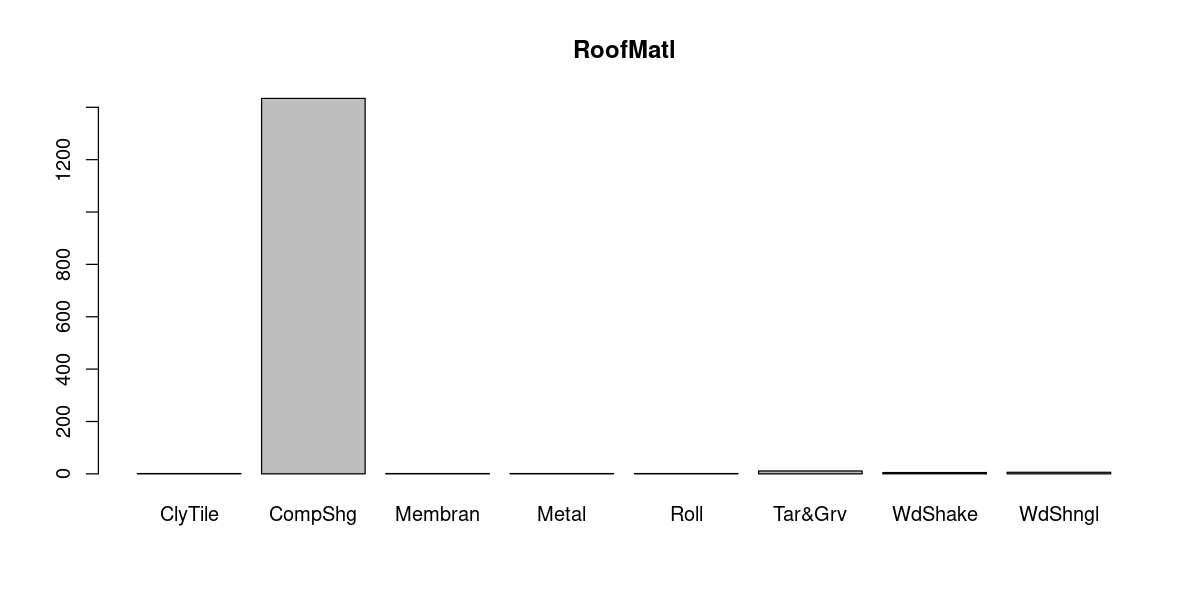

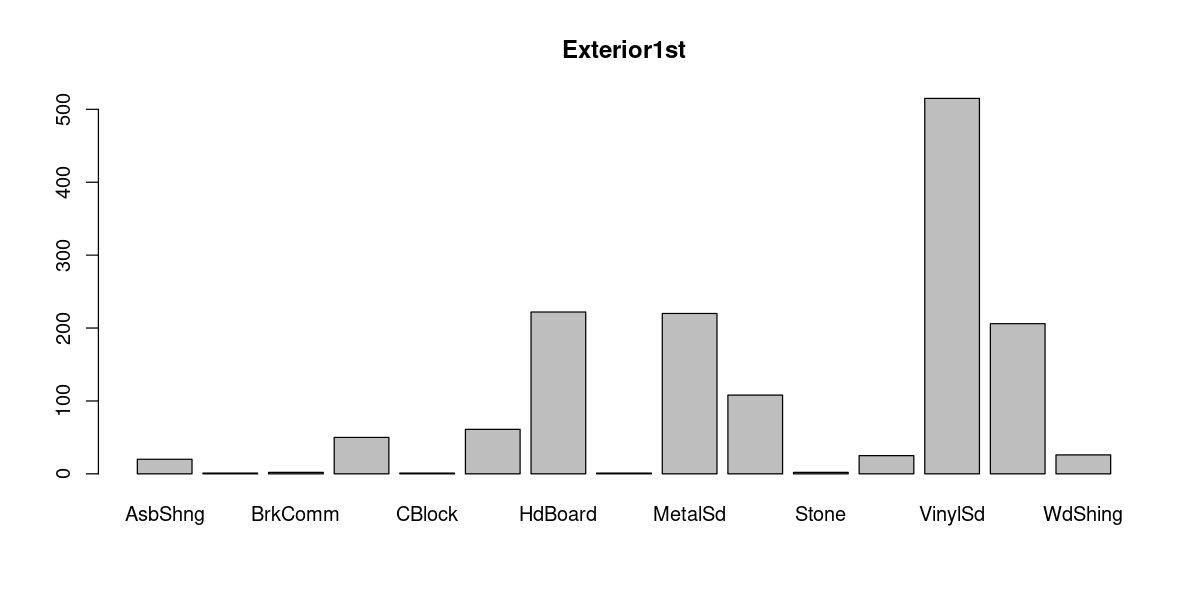

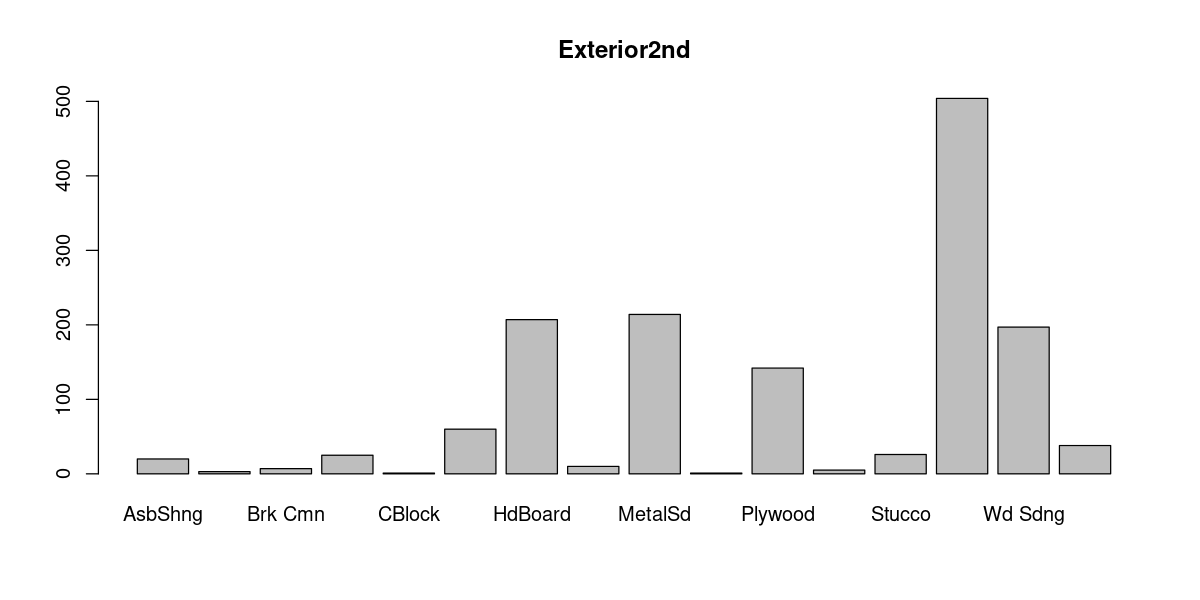

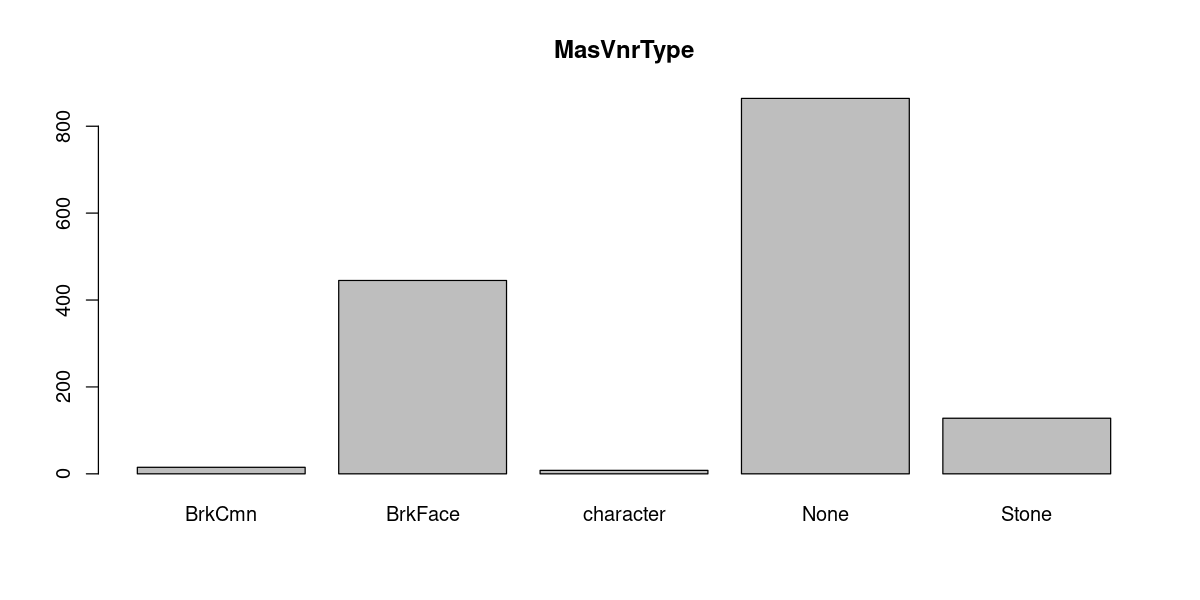

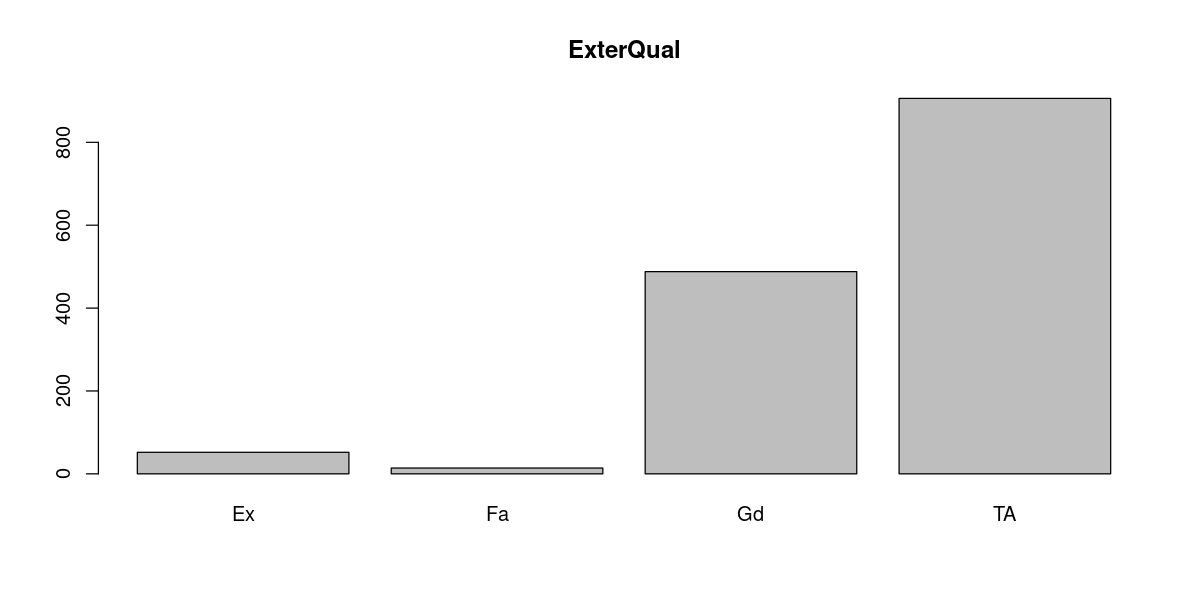

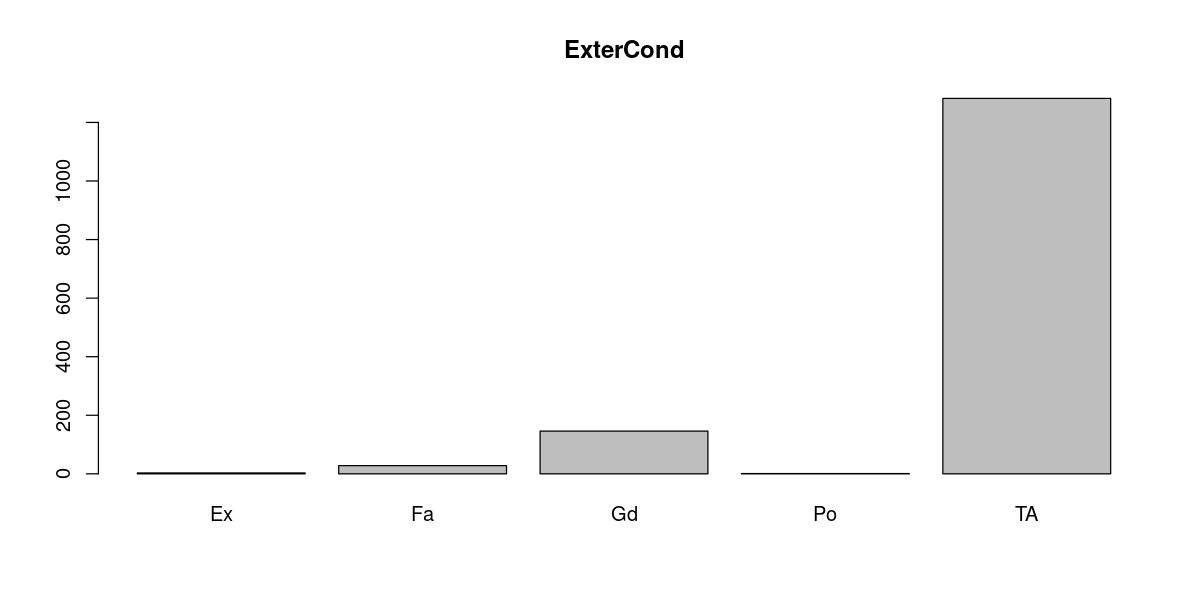

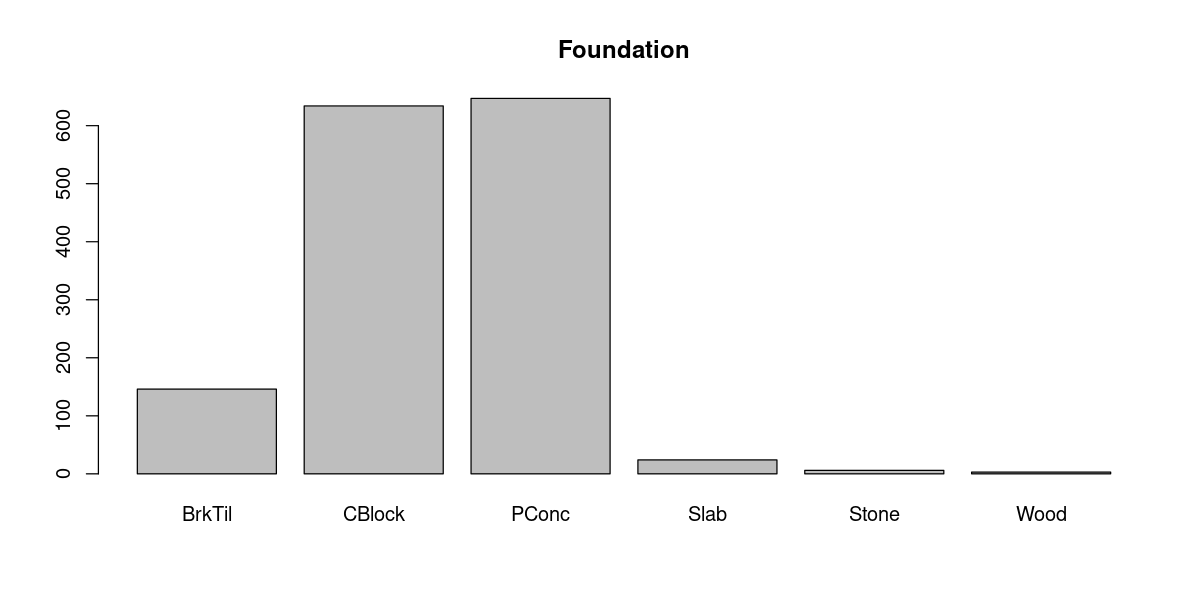

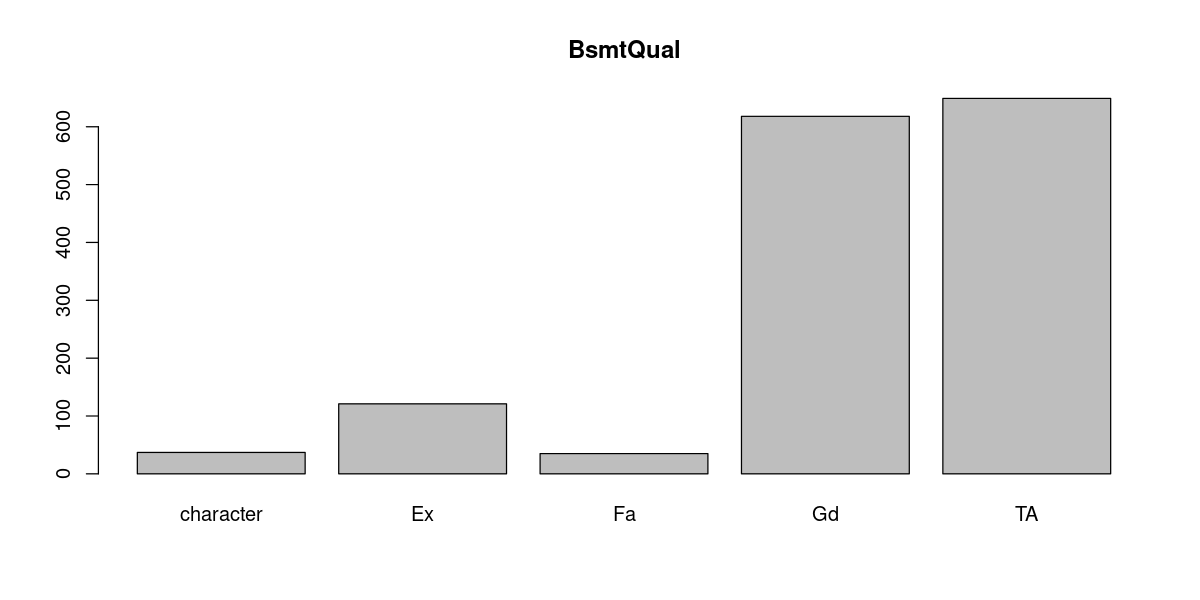

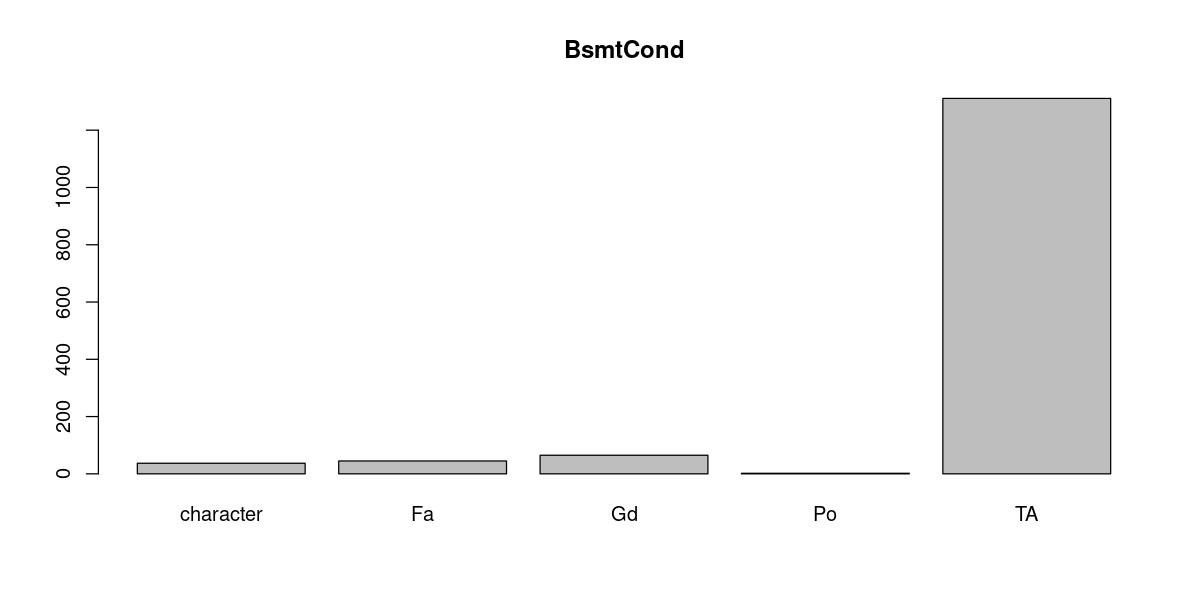

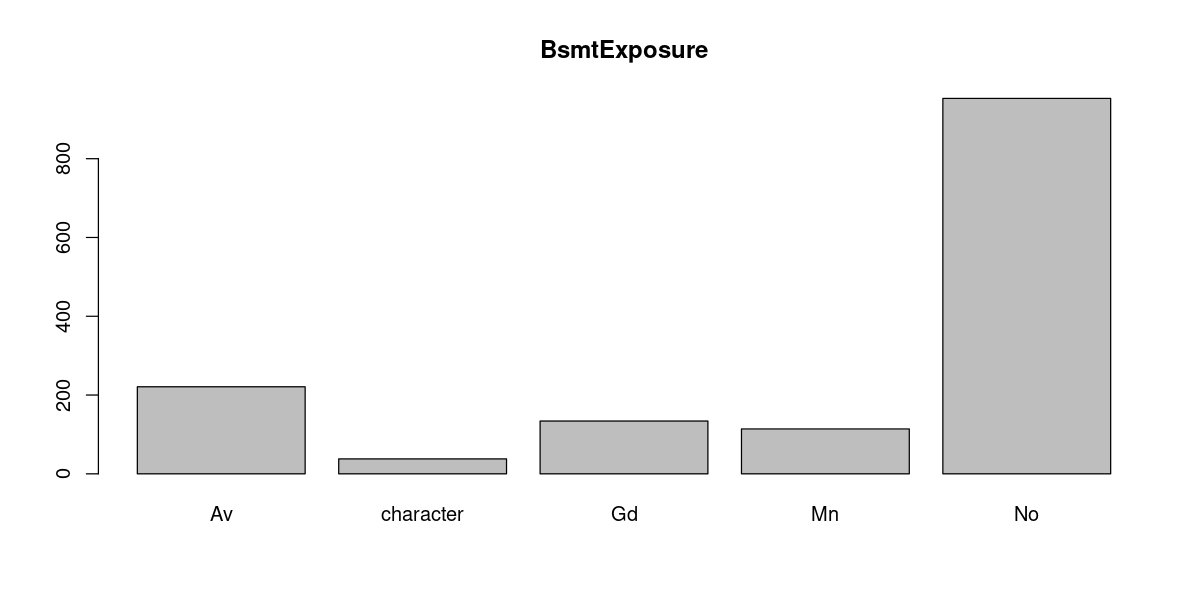

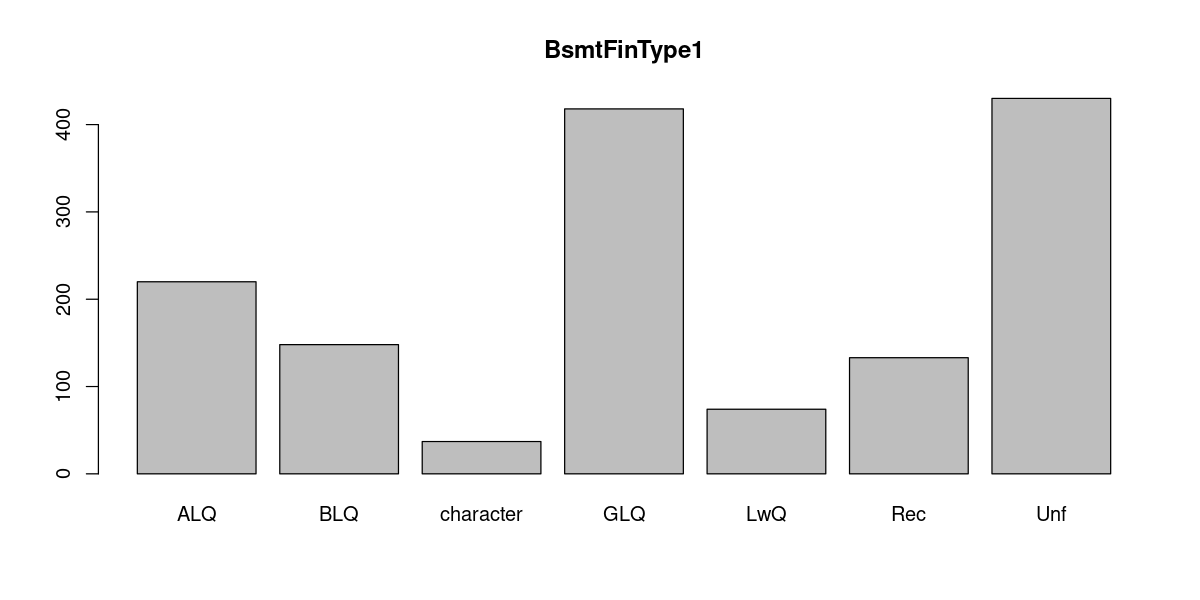

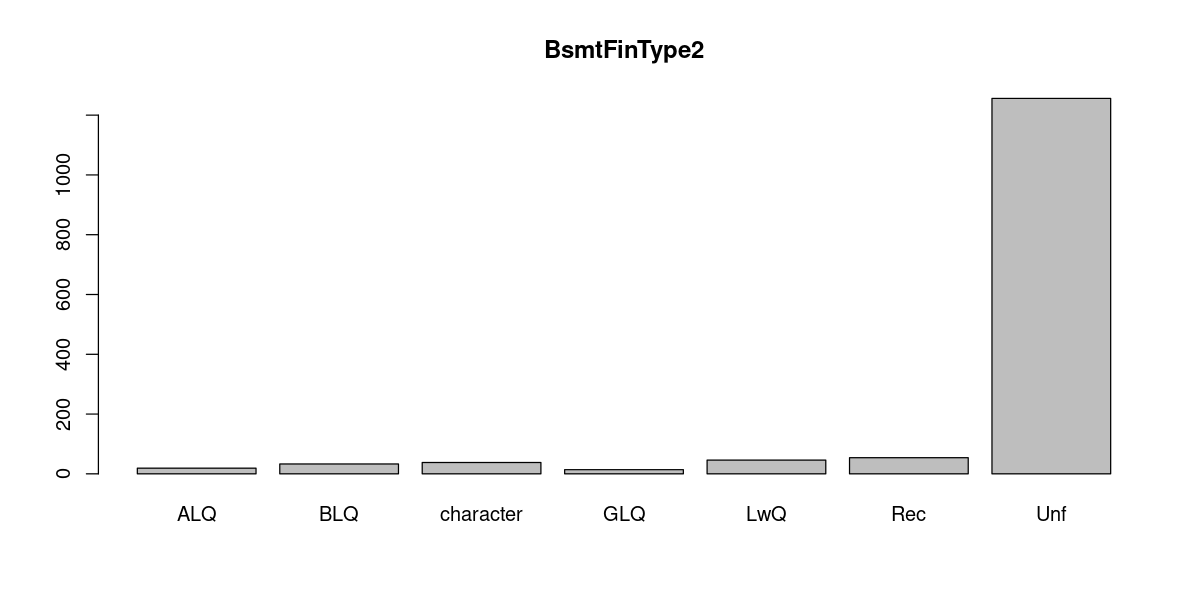

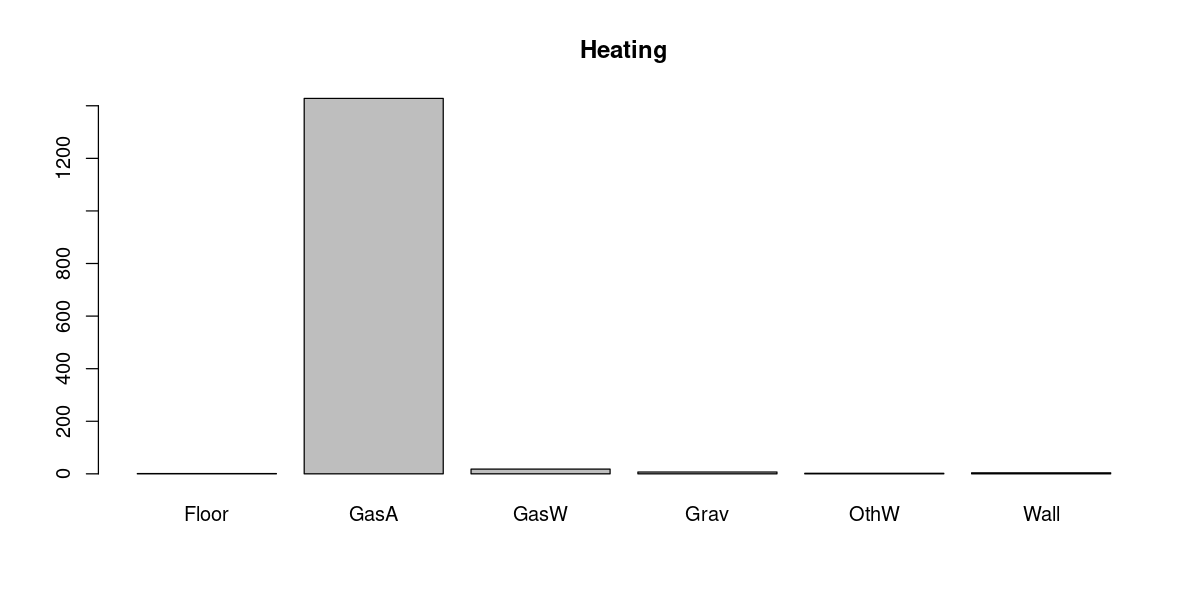

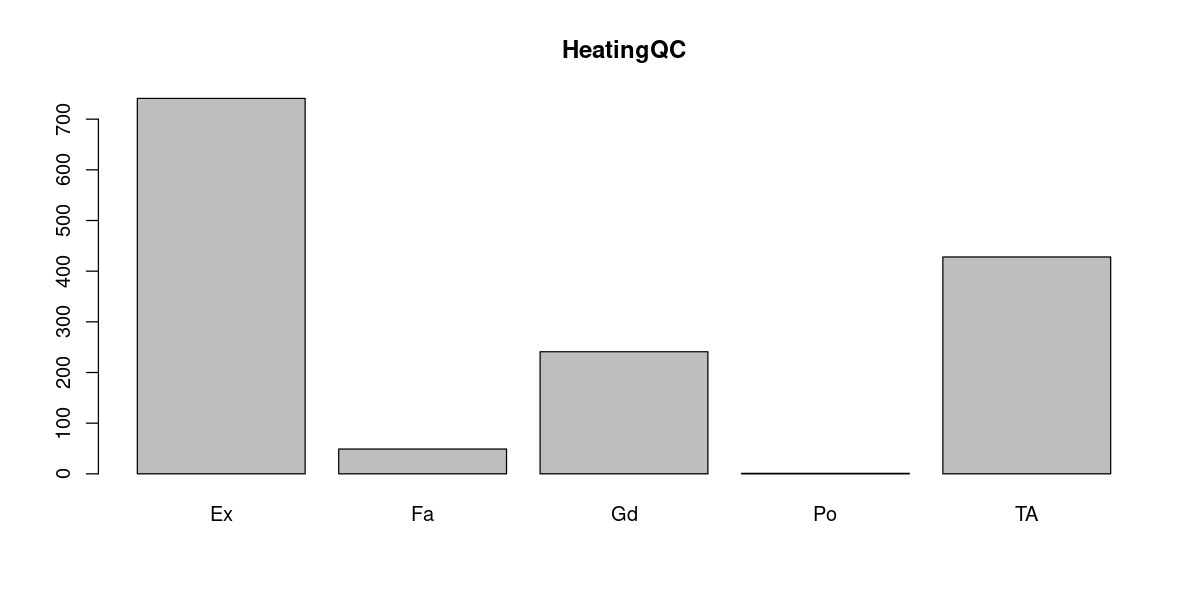

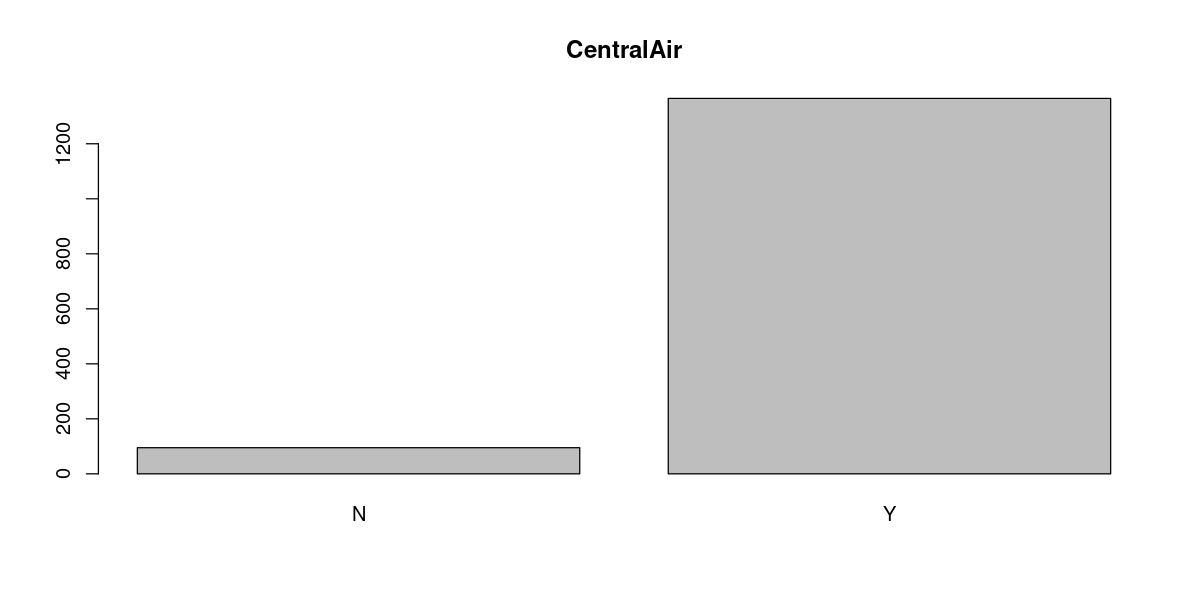

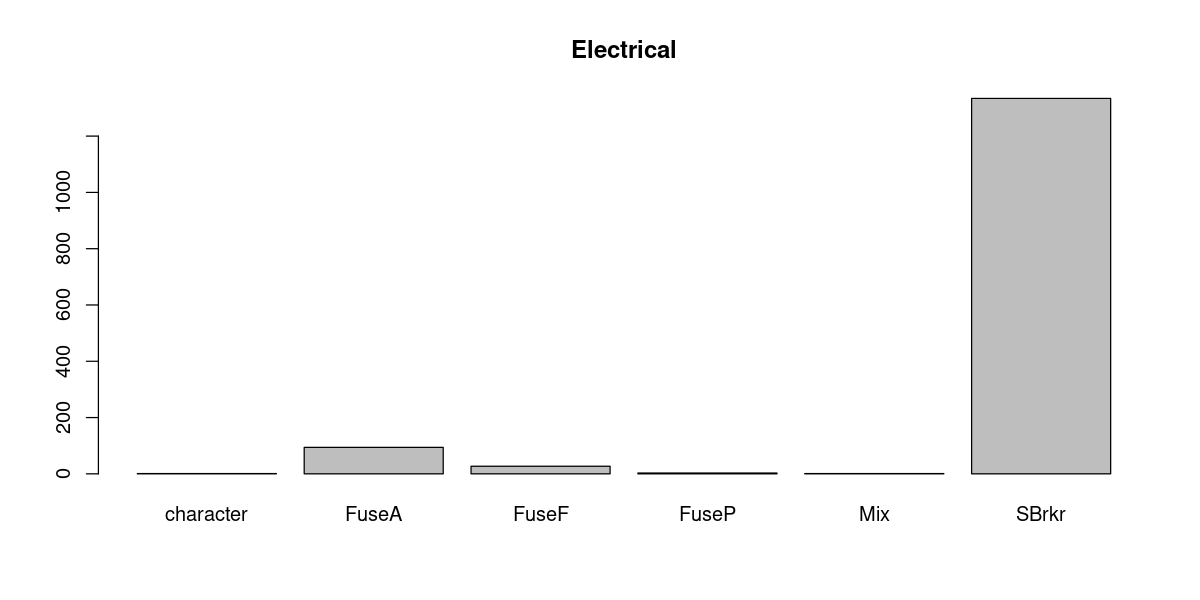

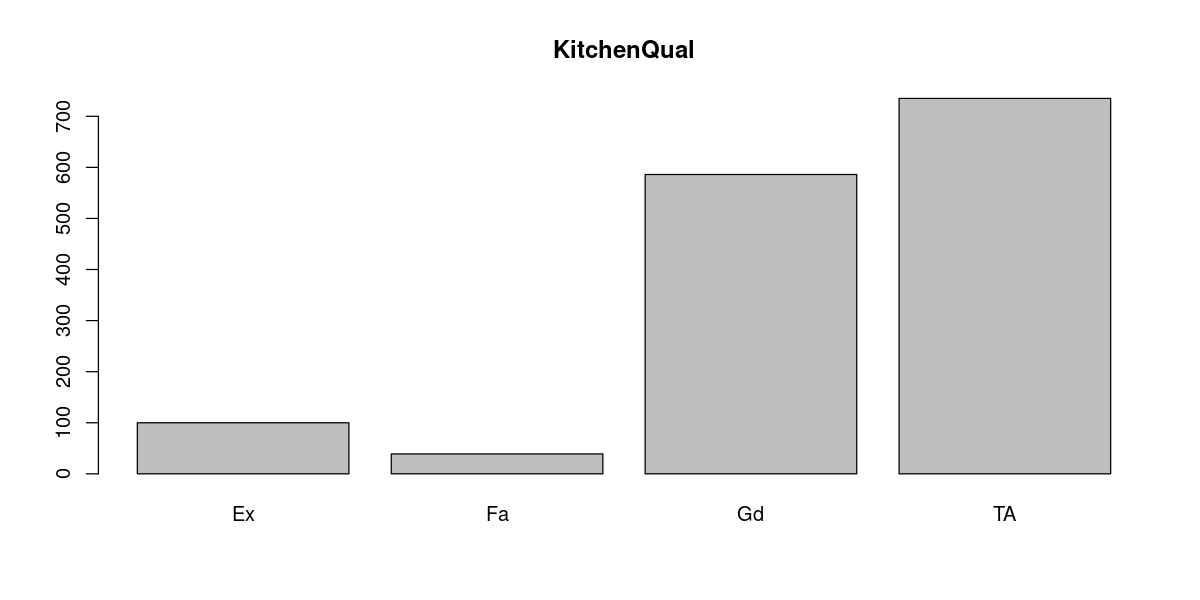

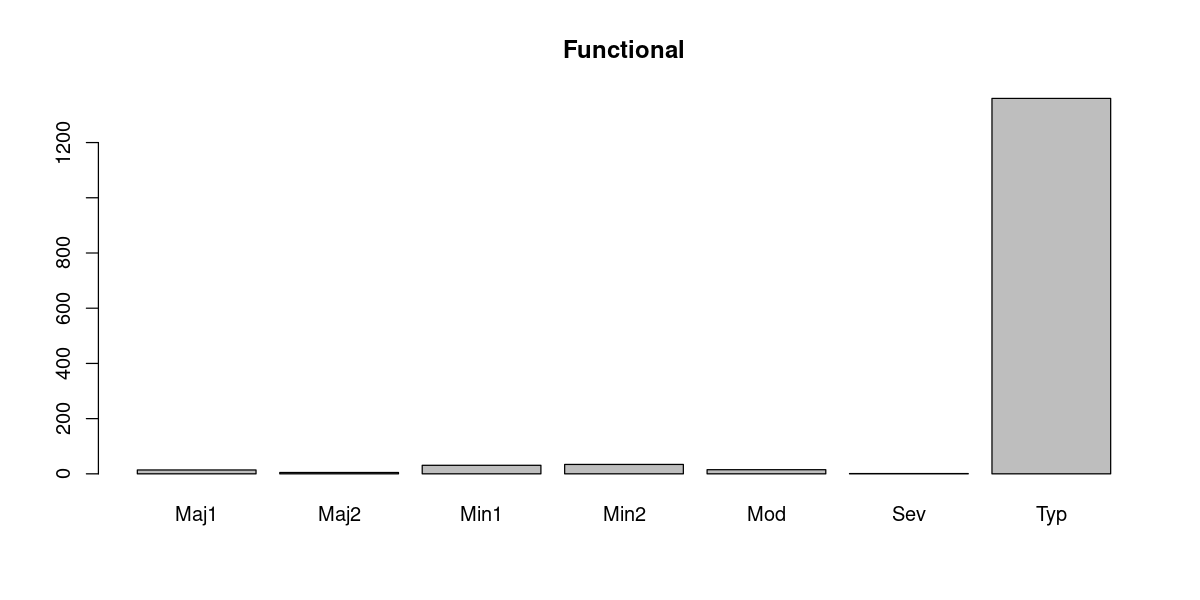

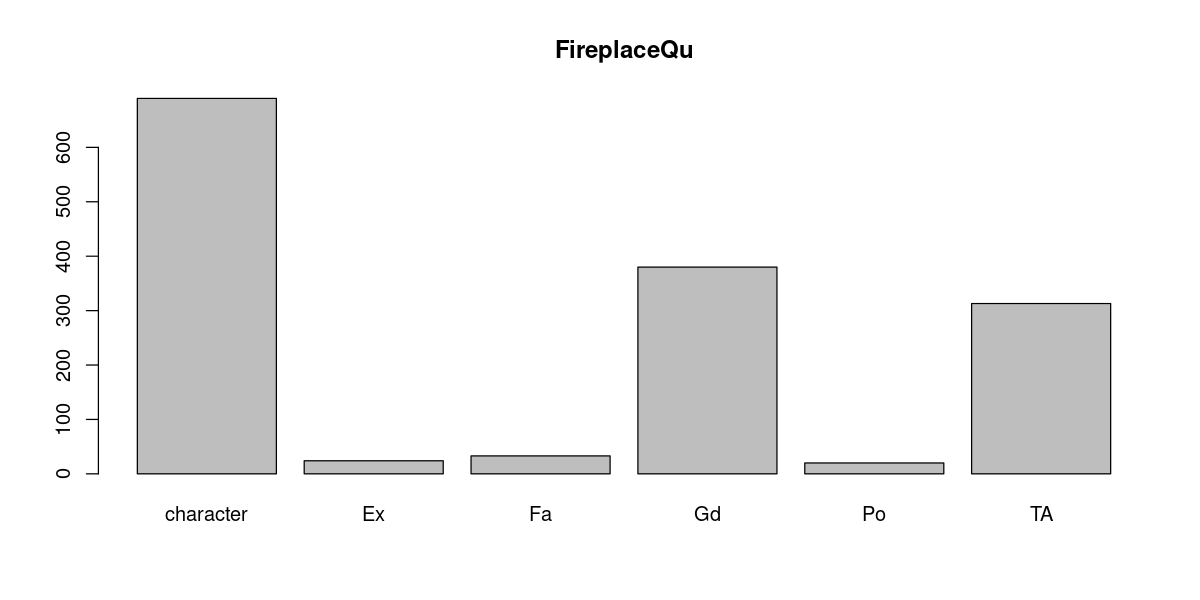

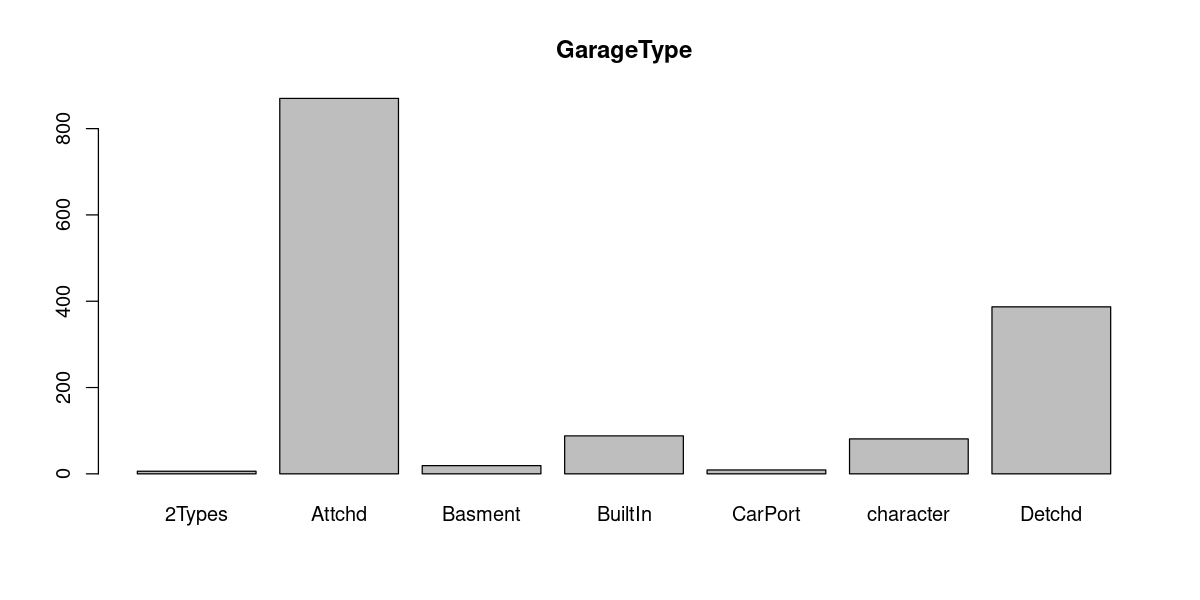

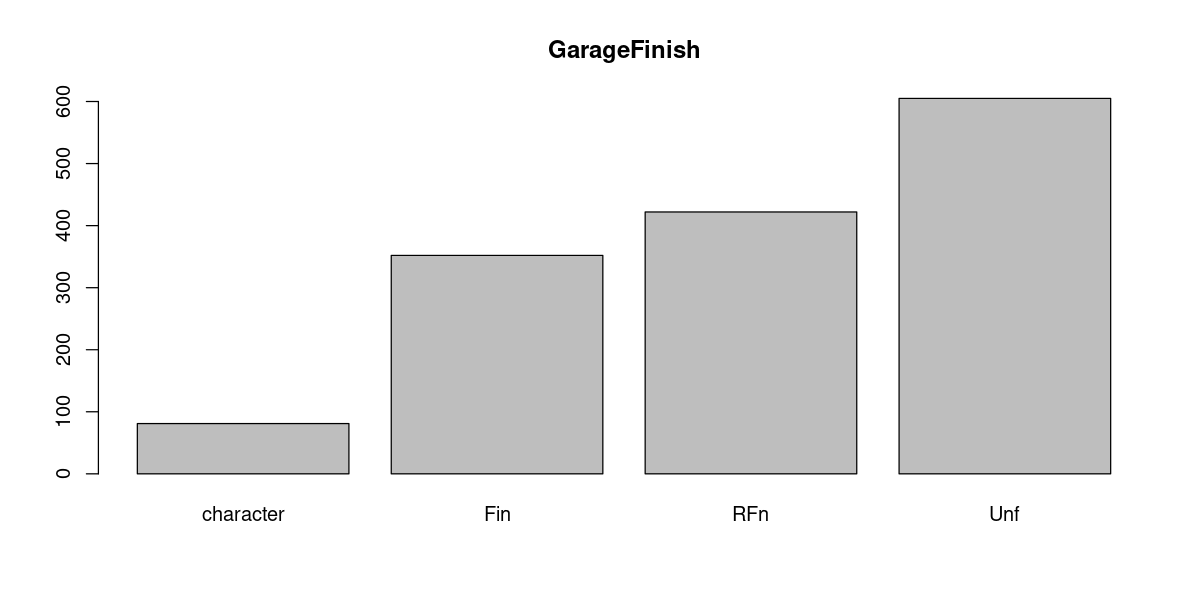

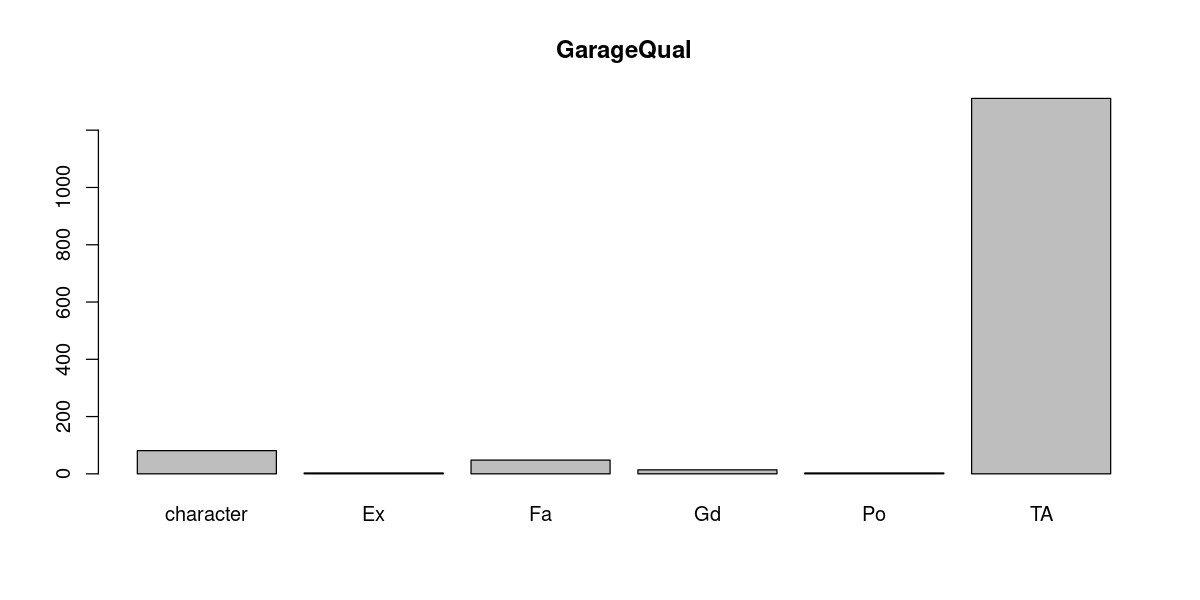

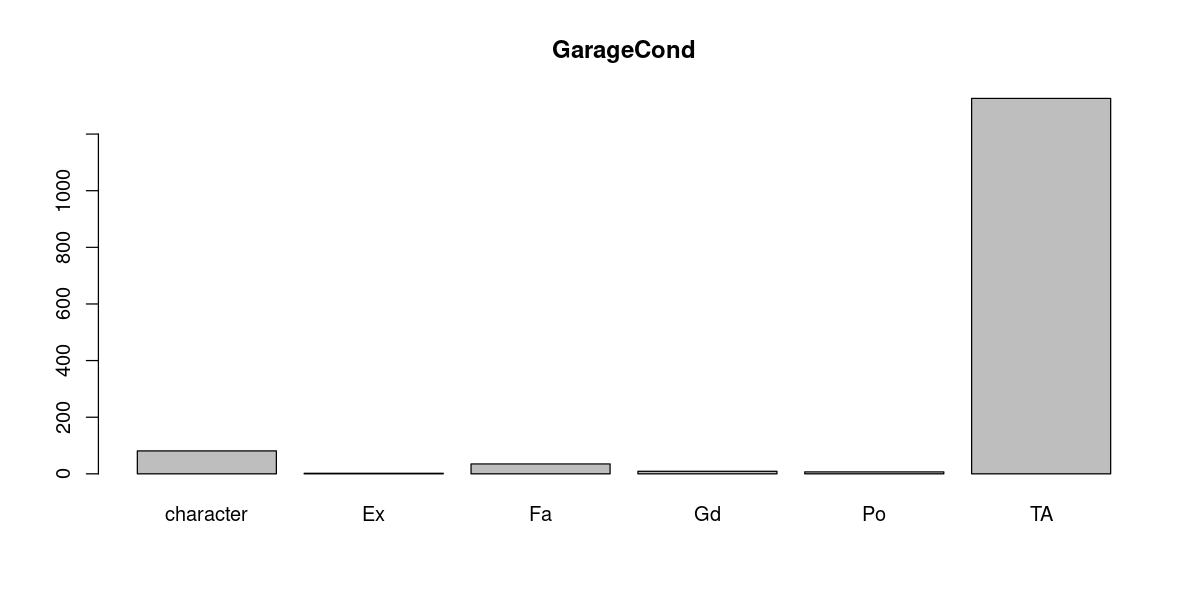

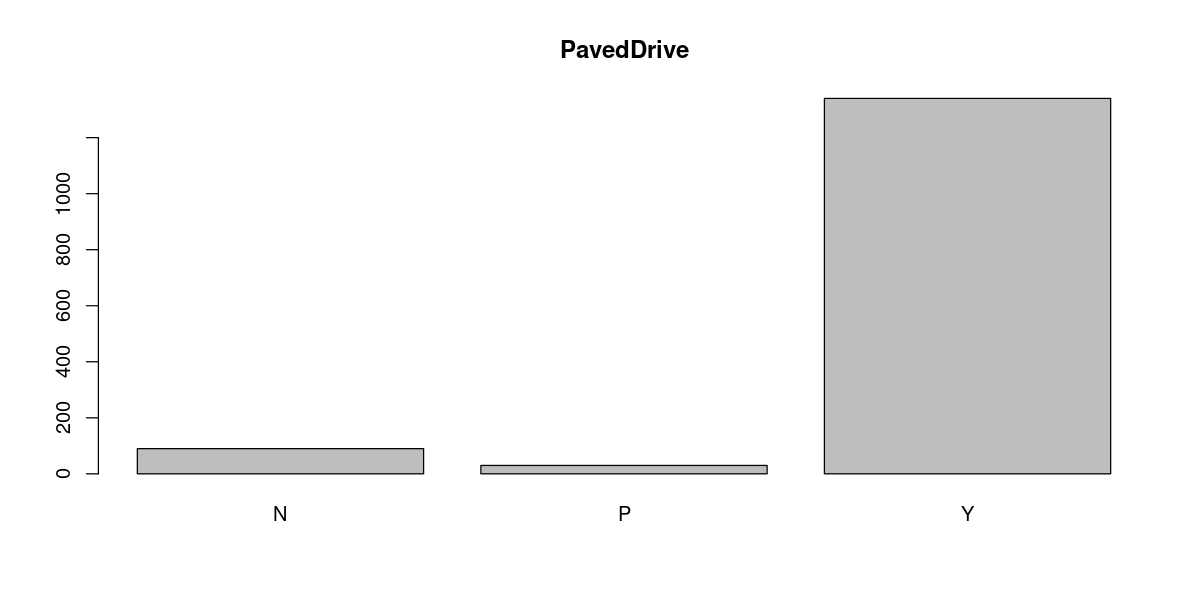

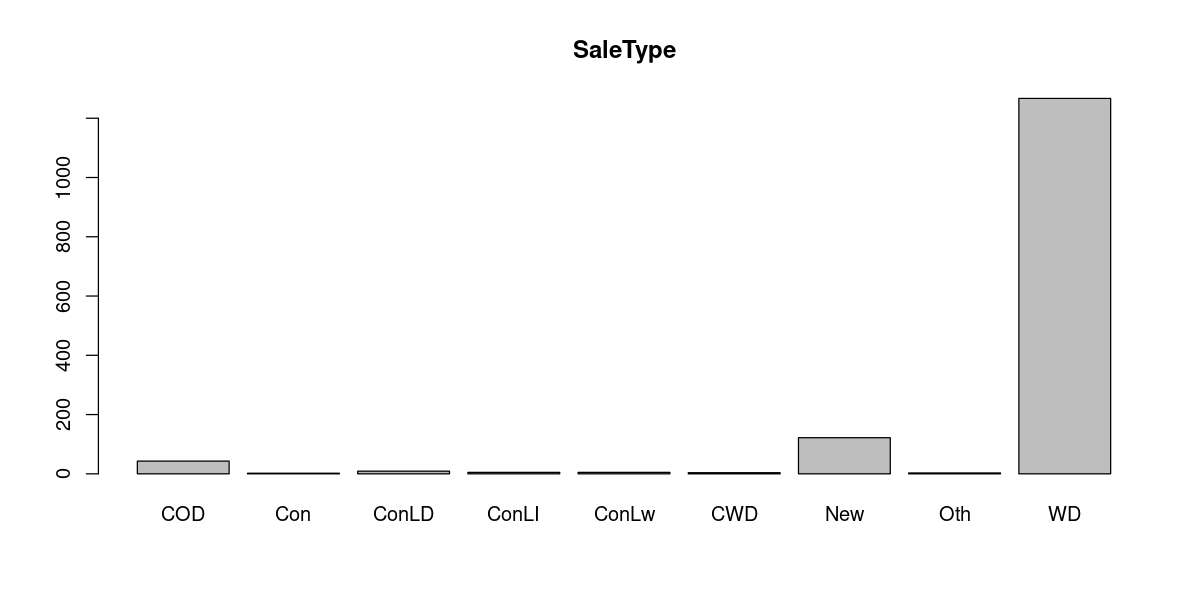

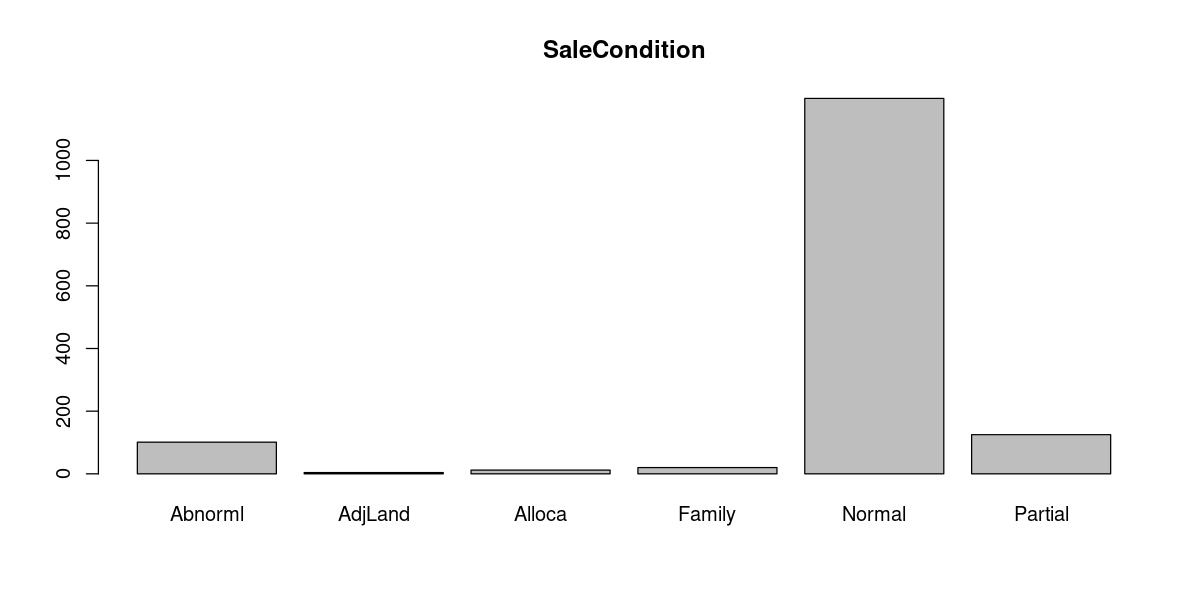

In [25]:
dfcolumns <- colnames(df_train_cat)
for(i in 1:ncol(df_train_cat)){
    col <- dfcolumns[i] 
    counts <- table(df_train_cat[[col]])
    barplot(counts,main=col)
                  }  

# Clase 14

### Escalamiento para variables continuas
Las variables continuas pueden tener una escala muy diferente, lo cual puede afectar la precisión y eficacia del modelo, por lo que aplicaremos una [estandarización](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html), consistente en restar la media y dividir entre la varianza z = (x - u) / s, esto está implementado en **scale**.

In [26]:
escalamiento <- function(df){
    scaled_df = scale(df,center=TRUE,scale = TRUE)
    }

df_train_num = escalamiento(df_train_num)
df_test_num = escalamiento(df_test_num)



### Encoding para variables categóricas
Muchos modelos no admiten variables categóricas en su implementación. Por eso necesitamos una ténica de codificación. convirtiendo las variables categóricas en dummies, es decir, por cada columna se generarán nuevas columnas, una para cada categoría de la misma. Estas columnas nuevas estarán compuestas de 0 y 1. Será 1 en los índices donde la entrada coincida con la categoría que ahora da nombre a la columna. Esto lo lograremos con la función [dummy_cols](https://medium.com/@jboscomendoza/variables-dummy-one-hot-encoding-con-r-1f62b4ec8242) de la librería **fastDummys**.

In [27]:
df_train_cat = dummy_cols(df_train_cat) %>% select(-colnames(df_train_cat))
df_test_cat = dummy_cols(df_test_cat) %>% select(-colnames(df_test_cat))

Veamos cuántas columnas quedan en "train" y cuántas en "test", ya que al implementar el modelo es importante que tengan la misma cantidad de columnas. 

In [28]:
cat(ncol(df_train_cat),ncol(df_test_cat)) 

251 241

Hay más columnas en df_train_cat, esto puede deberse a que había categorías en las columnas de "df_train_cat" antes del encoding, que no existían en "df_test_cat", quizás debido a que así eran originalmente, o a resultados diferentes en el tratamiento de outliers. Estas columnas que no coinciden serán eliminadas en la siguiente celda. 

In [29]:
columns = Reduce(intersect,list(colnames(df_train_cat),colnames(df_test_cat)))
df_train_cat = df_train_cat[columns]
df_test_cat = df_test_cat[columns]

Por último, llamaremos "train" a la base de datos con todas las variables explicativas (numéricas y categóricas) juntas incluyendo a la columna con la variable objetivo. 
Seguidamente usaremos "sample.split" para dividir el total de datos en dos subconjuntos: entrenamiento y prueba, los usaremos para poder entrenar y evaluar los modelos respectivamente. 

In [30]:
df_train <- cbind(df_train_num,df_train_cat,df_train[target])
df_test <- cbind(df_test_num,df_test_cat)

df_train[is.na(df_train)] <- 0
df_test[is.na(df_test)] <- 0

split <- sample.split(df_train, SplitRatio = 0.7)

train <- subset(df_train, split == "TRUE")
test <- subset(df_train, split == "FALSE")

# Clase 15

## Modelos

### Regresión lineal

Comenzaremos con una regresión lineal, definimos el modelo, lo entrenamos con el conjunto de entrenamiento, y a continuación predecimos la variable objetivo en el subconjunto de prueba. Comparando la predicción con los valors reales de test, obtenemos con la ayuda de dos métricas diferentes la precisión del modelo. La primera métrica es R2, el modelo es más preciso mientras más cercano a uno sera R2. Además hallamos el error cuadrático  medio, el cual hemos divido entre la media de los valores reales, para convertirlo en un error relativo medio. 

In [31]:
dfcolumns = colnames(test)
# Regresión lineal
LR <- lm(SalePrice ~. , data = train)
y_pred = predict(LR, newdata = test[dfcolumns[dfcolumns!=target]])

cat("R^2 :",cor(y_pred,test$SalePrice))^2
cat('RMSE :',rmse(y_pred,test$SalePrice)/mean(test$SalePrice))

R^2 : 0.9062043

numeric(0)

RMSE : 0.1920128

### Bosques aleatorios o random forest

Intentemos un par de métodos de ensamble basados en árboles para intentar mejorar la precisión.

In [32]:
# Random Forest
set.seed(120)  # Setting seed
RF = randomForest(x = train[dfcolumns[dfcolumns!=target]],
                             y = train$SalePrice,
                             ntree = 500)
y_pred = predict(RF, newdata = test[dfcolumns[dfcolumns!=target]])

cat("R^2 :",cor(y_pred,test$SalePrice))^2
cat('RMSE :',rmse(y_pred,test$SalePrice)/mean(test$SalePrice))

R^2 : 0.9381319

numeric(0)

RMSE : 0.1624769

### Gradient Boosting

In [33]:
# Gradient Boosting

x_train <- data.matrix(train[dfcolumns[dfcolumns!=target]])
y_train <- train$SalePrice

x_test <- data.matrix(test[dfcolumns[dfcolumns!=target]])
y_test <- test$SalePrice

xgb_train <- xgb.DMatrix(data = x_train, label = y_train)
xgb_test <- xgb.DMatrix(data = x_test, label = y_test)


xgb <- xgboost(data = xgb_train, nrounds = 100, verbose = 0)
y_pred = predict(xgb, xgb_test)

cat("R^2 :",cor(y_pred,test$SalePrice))^2
cat('RMSE :',rmse(y_pred,test$SalePrice)/mean(test$SalePrice))

R^2 : 0.9332168

numeric(0)

RMSE : 0.1633323

## Predicciones

Utilizaremos los dos mejores métodos probados para predecir la variable objetivo en df_test. Para ello, volveremos a entrenar los modelos, ahora con todo el dataframe de df_train, y luego realizaremos la predicción.

In [34]:
train <- df_train
test <- df_test 

In [35]:
RF = randomForest(x = train[dfcolumns[dfcolumns!=target]],
                             y = train$SalePrice,
                             ntree = 500)
RF_pred = predict(RF, newdata = test[dfcolumns[dfcolumns!=target]])

In [36]:
x_train <- data.matrix(train[dfcolumns[dfcolumns!=target]])
y_train <- train$SalePrice

x_test <- data.matrix(test[dfcolumns[dfcolumns!=target]])

xgb_train <- xgb.DMatrix(data = x_train, label = y_train)
xgb_test <- xgb.DMatrix(data = x_test)

xgb <- xgboost(data = xgb_train, nrounds = 100, verbose = 0)
XGB_pred = predict(xgb, xgb_test)

Veamos el R^2 y el error cuadrático medio entre estas dos predicciones. Este último lo convertimos en un error relativo dividiendolo entre la media de una de las predicciones, esto da una mejor medida del error dada la escala.   

In [37]:
cat("R^2 :",cor(XGB_pred, RF_pred))^2
cat('RMSE :',rmse(XGB_pred, RF_pred)/mean(XGB_pred))

R^2 : 0.9812783

numeric(0)

RMSE : 0.08346324

Vemos que las predicciones de ambos modelos se parecen mucho. Lo cual es una muy buena señal.

# Prescripción

En esta parte de los ejemplos realizaremos una de las formas de prescripción más sencillas, veremos cómo podemos saber qué variables tienen más influencia en la variable objetivo, y en qué sentido se puede modificar para aumentar o disminuir el precio de las casas. 

### Coeficientes de regresión  

La información más útil para saber las variables que se deberán modificar para cambiar la decisión del modelo son los coeficientes de regresión. El problema es que la regresión lineal no tenía tan buena precisión entonces puede que los coeficientes no sean tan confiables, así que podemos usarlos pero los compararemos con los coeficientes de una regresión logística. 
Utilizaremos la siguiente técnica: convertir nuestra variable objetivo en binaria, siendo 1 si el precio está sobre la mediana y 0 en caso contrario. A continuación, volveremos a entrenar el modelo, pero ahora usando una **regresión logística**. Su precisión deberá ser calculada utilizando la función **accuracy**. Primero construiremos una tabla con los coeficientes de la regresión linel, entrenada ahora con todo el conjunto de df_train.

In [38]:
# Regresión lineal
LR <- lm(SalePrice ~. , data = train)

Coeficientes <- data.frame(summary(LR)$coefficient)
Coeficientes <- Coeficientes['Estimate']
colnames(Coeficientes) <- 'Regresión_Lineal'
Coeficientes <- cbind(Variable = rownames(Coeficientes), Coeficientes)
rownames(Coeficientes) <- 1:nrow(Coeficientes)
Coeficientes       

Variable              Regresión_Lineal
1   (Intercept)            40596.6129     
2   MSSubClass             -4588.2367     
3   LotFrontage              478.7743     
4   LotArea                 6274.8452     
5   OverallQual            10329.0844     
6   OverallCond             5779.5768     
7   YearBuilt               7292.9395     
8   YearRemodAdd            2035.1409     
9   MasVnrArea               680.8051     
10  BsmtFinSF1              8460.7502     
11  BsmtUnfSF                409.2053     
12  TotalBsmtSF             6691.0489     
13  X1stFlrSF              32177.6118     
14  X2ndFlrSF              42151.8224     
15  GrLivArea             -20670.5762     
16  BsmtFullBath             431.5480     
17  FullBath                2488.2341     
18  HalfBath                 526.9366     
19  BedroomAbvGr           -2370.5813     
20  TotRmsAbvGrd            2216.6295     
21  Fireplaces              3616.0086     
22  GarageYrBlt            -1117.5238     
23  GarageCars              5109.3648     
24  GarageArea              1168.8456     
25  WoodDeckSF              1318.4286     
26  OpenPorchSF              899.0925     
27  MoSold                 -1121.2463     
28  YrSold                  -972.1976     
29  `MSZoning_C (all)`    -29847.5148     
30  MSZoning_FV             9113.1346     
⋮   ⋮                     ⋮               
197 GarageType_Attchd       -5073.9961    
198 GarageType_Basment        -29.6067    
199 GarageType_BuiltIn      -2458.8014    
200 GarageType_CarPort       -947.1298    
201 GarageType_character  -100971.8800    
202 GarageFinish_Fin          374.0556    
203 GarageFinish_RFn        -1976.2416    
204 GarageQual_Fa         -113942.9698    
205 GarageQual_Gd         -105281.9540    
206 GarageQual_Po         -136419.0574    
207 GarageQual_TA         -107760.3332    
208 GarageCond_Ex         -105091.9414    
209 GarageCond_Fa             944.1338    
210 GarageCond_Gd            4339.0103    
211 GarageCond_Po           -4589.9527    
212 PavedDrive_N            -3099.9558    
213 PavedDrive_P            -4119.4009    
214 SaleType_COD             1478.6115    
215 SaleType_Con            23104.8468    
216 SaleType_ConLD          20061.5553    
217 SaleType_ConLI           2110.1161    
218 SaleType_ConLw           1262.6827    
219 SaleType_CWD            11063.0439    
220 SaleType_New            46936.4312    
221 SaleType_Oth            10220.4234    
222 SaleCondition_Abnorml   28947.6459    
223 SaleCondition_AdjLand   39516.9209    
224 SaleCondition_Alloca    40154.2703    
225 SaleCondition_Family    23989.2131    
226 SaleCondition_Normal    34902.1540

In [39]:
y <- df_train[,target]
med = median(y)
for(i in 1:length(y)){
    if(y[i] > med){
        y[i] = 1 }
    else{     
        y[i] = 0 } 
}        
df_train[,target] <- y

split <- sample.split(iris, SplitRatio = 0.7)

train <- subset(df_train, split == "TRUE")
test <- subset(df_train, split == "FALSE")

log <- glm(SalePrice ~ . , data = train, family = "binomial")

log_pred_probs = predict(log,newdata = test[dfcolumns[dfcolumns!=target]], type = "response")
log_pred <- rep(0,length(log_pred_probs))
log_pred[log_pred_probs>.5] = 1

cat("Accuracy:",accuracy(test$SalePrice, log_pred))

Accuracy: 0.8219178

 Ahora es momento de obtener los coeficientes de regresión. Los más grandes en valor absoluto, es decir las variables con más influencia positiva o negativa los graficaremos en una gráfica de barras. 

In [40]:
log <- glm(SalePrice ~ . , data = df_train, family = "binomial") # Volvemos a entrenar el modelo con todo el dataframe para obtener mejor resultado

Coeficientes['Regresión_Logística'] <- data.frame(summary(log)$coefficient)$Estimate
Coeficientes <- Coeficientes[-1,] # Eliminar el coeficiente intercept

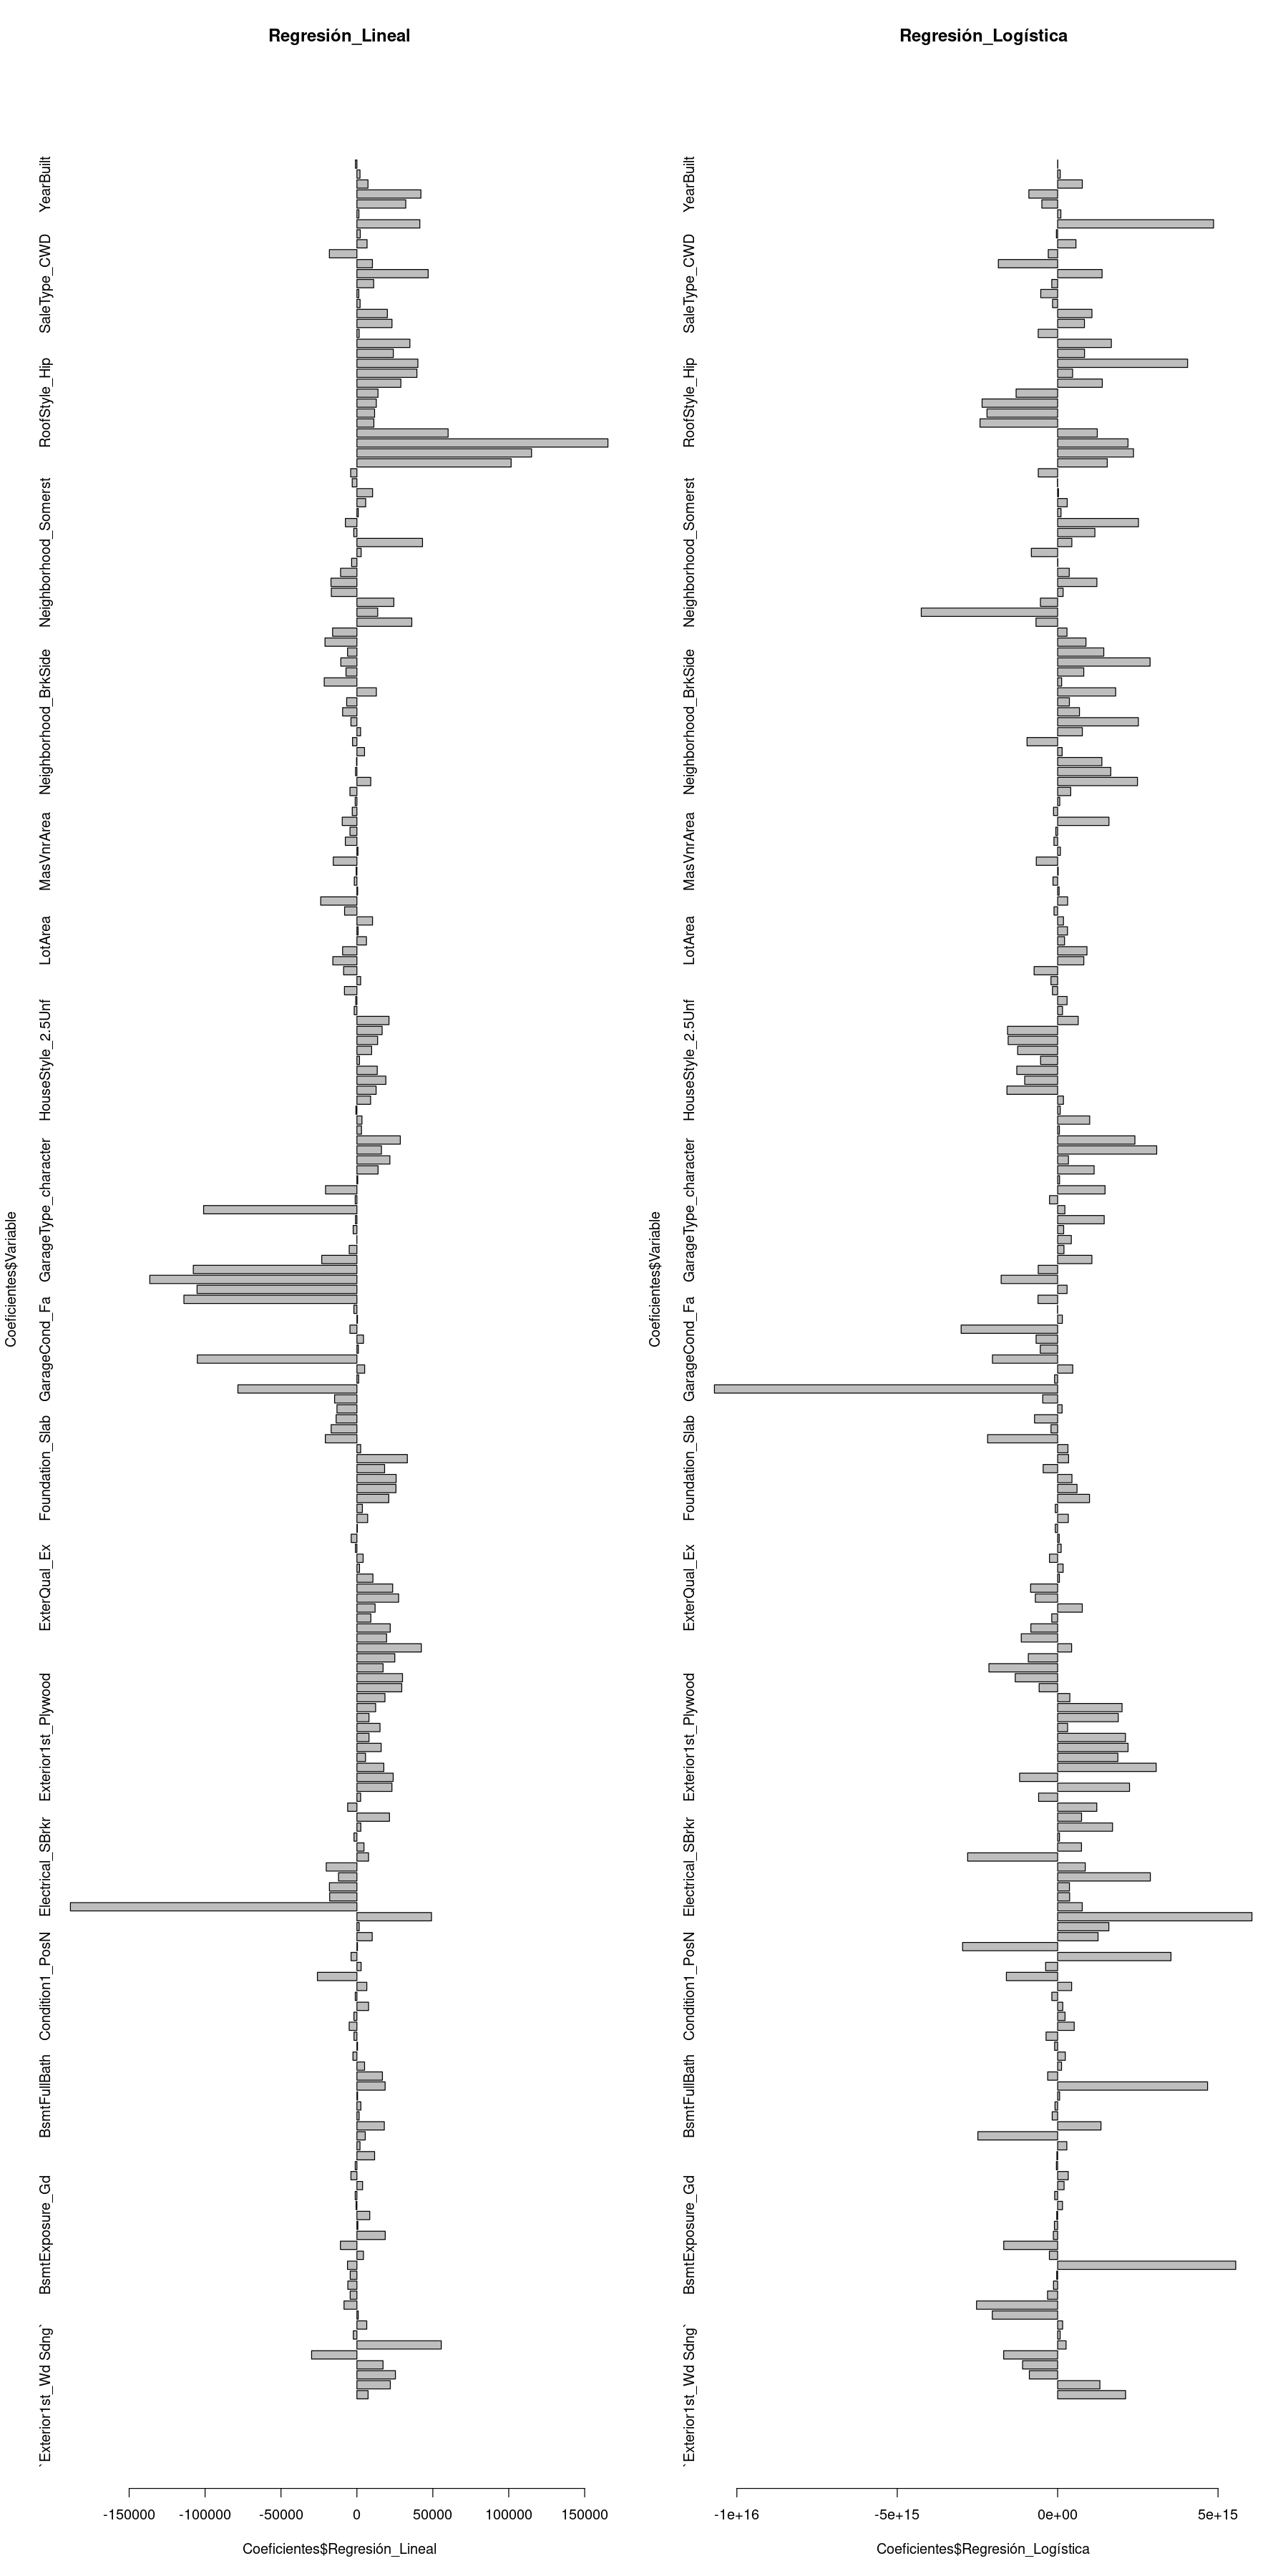

In [41]:
options(repr.plot.width=15, repr.plot.height=30)
par(mfrow=c(1,2))
barplot(Coeficientes$Regresión_Lineal ~ Coeficientes$Variable, main="Regresión_Lineal",horiz = TRUE)
barplot(Coeficientes$Regresión_Logística ~ Coeficientes$Variable, main="Regresión_Logística",horiz = TRUE)

## Conclusiones

En general analizando los coeficientes de regresión, podemos saber qué caraterísticas se pueden modificar para modificar el precio de la casa. Aunque algunos no pueden ser modificados después de construida, otros sí tienen esa posibilidad. Y aún los que no pueden ser modificados pueden constituir una guía para posibles inversores. 